# CI7520 –Assignment 1: Classical Machine Learning (Section 3)

by 

Adrian Bandy (K2132274)

Shashwat Bhardwaj (K2149137)

Royce Daran Shakespeare (K2046699)

Padmesh Upadhyay (K2136572)

Skip to section 'Part III Application: Classification' to skip data loading and preprocessing.


In [ ]:
#Importing The Required Libraries

#Data and data manipulation libraries
from sklearn import datasets
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.tree import plot_tree
from sklearn.inspection import plot_partial_dependence


#Data preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

#Models
from sklearn import cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

#Hyperparameter Tuning and processing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict

#Scoring and Performance Evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

Declared Functions

Using the DRY (Dont Repeat Yourself) method as outlined in The Pragmatic Programmer [1] we will declare functions that we use multiple times.
This has the benefit of less and cleaner code, which is far easier to update or maintain.

[1] Hunt, A., Thomas, D. and Cunningham, W., 2015. The pragmatic programmer. Boston: Addison-Wesley, Chapter 2.

In [ ]:
def clustering_performance_evaluation(X, predicted_labels, print_output = False):
  '''
  Accepts data of shape 2d and the predicted labels
  Returns a series of different clustering scores
  If print_output = True it will print the scores as well as returning them
  '''
  #silhouette is mean intra-cluster distance - nearest-cluster distance
  #divided by the maximum of these two.
  #Values between 1 and -1. 1 being best score achievable.
  sil_score = silhouette_score(X, predicted_labels)
        
  #Calinski-Harabasz score
  #Ratio of sum of the inter-cluster dispersion and intra-cluster dispersion
  #Higher values better
  cal_har_score = calinski_harabasz_score(X, predicted_labels)
    
  #David-Bouldin Score
  #Avg similarity within cluster. 
  #Similarity is ratio of intra-cluster to inter-cluster
  #Low values are better (minima is 0)
  db_score = davies_bouldin_score(X, predicted_labels)
      
  if print_output == True:
      print(f"Silhouette Score: {sil_score:.3f}\
      \nCalinski-Harabasz Score: {cal_har_score:.3f}\
      \nDavid-Bouldin Score: {db_score:.3f}")
    
  if print_output == False:
      return [sil_score, cal_har_score, db_score]

def classification_performance_evaluation(y_true, y_pred, print_output = False):
  '''
  Accepts data of the ground truth labels and the predicted labels
  Returns a series of different classification scores
  If print_output = True it will print the scores as well as returning them
  '''
  #Both homogeneity and completeness have values 0 to 1. 
  #Larger values being preferable
  #V measure is a 'harmonic' mean of homogeneity and completeness
  h,c,v = homogeneity_completeness_v_measure(y_true, y_pred)
    
  #accuracy score displays % of labels correctly labelled.
  acc_score = accuracy_score(y_true, y_pred)
    
  #balanced accuracy to adjust for inbalanced classes
  bal_acc_score = balanced_accuracy_score(y_true, y_pred)
    
  #f1_score
  #Harmonic mean of precision and recall
  #Values of 0 to 1. 1 is best.
  score_f1 = f1_score(y_true, y_pred)
    
  if print_output == True:
      print(f"Homogeneity Score: {h:.3f}\
      \nCompleteness Score: {c:.3f}\
      \nV_measure Score: {v:.3f}\
      \nAccuracy Score: {acc_score:.3f}\
      \nBalanced Accuracy Score: {bal_acc_score:.3f}\
      \nF1 Score: {score_f1:.3f}")

  if print_output == False:
      return [h, c, v, acc_score, bal_acc_score, score_f1]

def classification_using_clustering_performance_evaluation(y_true, y_pred, print_output = False, classification = True):
  '''
  Accepts data of the ground truth labels and the predicted labels
  Returns a series of different clustering and classification scores
  If print_output = True it will print the scores as well as returning them
  If classification = False will correct accuracy metrics (because clustering does not ascribe which cluster is which label)
  '''
  #Both homogeneity and completeness have values 0 to 1. 
  #Larger values being preferable
  #V measure is a 'harmonic' mean of homogeneity and completeness
  h,c,v = homogeneity_completeness_v_measure(y_true, y_pred)
    
  #accuracy score displays % of labels correctly labelled.
  acc_score = accuracy_score(y_true, y_pred)
    
  #balanced accuracy to adjust for inbalanced classes
  bal_acc_score = balanced_accuracy_score(y_true, y_pred)
    
  #f1_score
  #Harmonic mean of precision and recall
  #Values of 0 to 1. 1 is best.
  score_f1 = f1_score(y_true, y_pred)

  #Adjusted rand score
  #Similarity between clusters by counting all pairs of clusters,
  #Higher values when greater proportion is in correct cluster
  adj_rand_score = adjusted_rand_score(y_true, y_pred)
    
  #if a clustering method selected that did not have information about labels select classification as False
  if classification == False:
      #Must take maximum of 1-score and score because clustering method is only labelling two groups without
      #assigning which is which
      acc_score = max(acc_score, (1-acc_score))
      bal_acc_score = max(bal_acc_score, (1-bal_acc_score))
      score_f1 = max(score_f1, (1-score_f1))

      if print_output == True:
        print(f"Homogeneity Score: {h:.3f}\
        \nCompleteness Score: {c:.3f}\
        \nV_measure Score: {v:.3f}\
        \nAccuracy Score: {acc_score:.3f}\
        \nBalanced Accuracy Score: {bal_acc_score:.3f}\
        \nF1 Score: {score_f1:.3f}\
        \nAdjusted_rand_score : {adj_rand_score:.3f}")
      return [h, c, v, acc_score, bal_acc_score, score_f1, adj_rand_score]
  
  
  elif classification == True: 
    if print_output == True:
      print(f"Homogeneity Score: {h:.3f}\
      \nCompleteness Score: {c:.3f}\
      \nV_measure Score: {v:.3f}\
      \nAccuracy Score: {acc_score:.3f}\
      \nBalanced Accuracy Score: {bal_acc_score:.3f}\
      \nF1 Score: {score_f1:.3f}\
      \nAdjusted_rand_score : {adj_rand_score:.3f}")
    
  if print_output == False:
      return [h, c, v, acc_score, bal_acc_score, score_f1, adj_rand_score]
    
def plot_precision_recall(y_true, y_pred):
  '''
  Accepts ground truth and prediction labels
  Plots a precision recall graph
  '''
  #Plots the precision_recall_graph
  PrecisionRecallDisplay.from_predictions(y_true, y_pred)
  plt.ylim(0,1)
  plt.show()

def plot_roc_and_print_auc(y_true, y_pred):
  '''
  Accepts ground truth and prediction labels
  Plots a ROC curve with AUC calculated value
  '''
  #Plots the Receiver Operating Characteristic
  #And prints the ROC_AUC (area under curve) value
  #Values of 0 to 1. 1 is best
  false_positive_rate, true_positive_rate, threshold  =  roc_curve(y_true, y_pred)
  area_under_curve = round(roc_auc_score(y_true, y_pred), 3)
  zero_to_one_array = np.linspace(0,1,100)
    
  #plot x = y graph
  plt.plot(zero_to_one_array, zero_to_one_array, linestyle = 'dashed', c = 'k')
  plt.plot(false_positive_rate, true_positive_rate, label = (f"Area Under Curve:\n{area_under_curve}"))
  plt.legend(loc = 'lower right')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve and AUC Score')
  plt.show()
    
def plot_confusion_matrix(y_true, y_pred):    
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
  plt.show()

Loading The Data

In [ ]:
#Load data as json
bcd = datasets.load_breast_cancer()
#Load data as frames
# X, y = datasets.load_breast_cancer(return_X_y = True, as_frame = True)
#Convert frames to single dataframe
# df = pd.concat([X, y], axis =1)

In [ ]:
X = bcd.data

In [ ]:
y = bcd.target

In [ ]:
X_columns = bcd.feature_names

Feature Engineering
Many of these features relate to the same aspect of the data.

Therefore there is extra information that can be extracted.

To do this we will create retain the feaures so far and create a variety of new derived features

Coding inspired and expanded from [2]

[2] Python Feature Engineering Cookbook - Packt 2020, Chapter 9 - Applying Mathematical Computations to Features

In [ ]:
#create new 'difference' columns
original_col_length = len(X_columns)
for i in range(original_col_length - 20):
    new_col_name = str(''.join([X_columns[i+20][:5], ' - ',X_columns[i]]))
    print(new_col_name)
    X_columns = np.append(X_columns,new_col_name) 
    new_column_data = X[:,[i+20]] - X[:,[i]]
    X = np.concatenate((X, new_column_data), axis = 1)

worst - mean radius
worst - mean texture
worst - mean perimeter
worst - mean area
worst - mean smoothness
worst - mean compactness
worst - mean concavity
worst - mean concave points
worst - mean symmetry
worst - mean fractal dimension


In [ ]:
#create new 'ratio' columns
for i in range(original_col_length - 20):
    new_col_name = str(''.join(['ratio of ', X_columns[i+20][:5].strip(), ' to ',X_columns[i]]))
    print(new_col_name)
    X_columns = np.append(X_columns,new_col_name) 
    new_column_data = X[:,[i+20]] / X[:,[i]]
    X = np.concatenate((X, new_column_data), axis = 1)

ratio of worst to mean radius
ratio of worst to mean texture
ratio of worst to mean perimeter
ratio of worst to mean area
ratio of worst to mean smoothness
ratio of worst to mean compactness
ratio of worst to mean concavity
ratio of worst to mean concave points
ratio of worst to mean symmetry
ratio of worst to mean fractal dimension


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Error message given as we have generated some nan values:

We shall deal with these after the pre-processing scaling

We can also create features from distribution of each of the mean, error and worst features respectively.

In [ ]:
# Mean error and worst features are in 

# mean_features = list(X.columns[:10])
# error_features = list(X.columns[10:20])
# worst_features = list(X.columns[20:30])
   
X_columns = np.append(X_columns, ['min_of_mean_features', 'mean_of_mean_features', 'max_of_mean_features',
                                  'std_of_mean_features', 'multiple_of_mean_features', 'sum_of_mean_features',
                                  'min_of_error_features', 'mean_of_error_features', 'max_of_error_features', 
                                  'std_of_error_features', 'multiple_of_error_features', 'sum_of_error_features', 
                                  'min_of_worst_features', 'mean_of_worst_features', 'max_of_worst_features', 
                                  'std_of_worst_features', 'multiple_of_worst_features', 'sum_of_worst_features']) 

for feature_ranges_data in (X[:,0:10], X[:,10:20], X[:,20:30]):
  min_data = np.amin(feature_ranges_data, axis = 1).reshape(569,1)
  mean_data = np.mean(feature_ranges_data, axis = 1).reshape(569,1)
  max_data = np.amax(feature_ranges_data, axis = 1).reshape(569,1)
  std_data = np.std(feature_ranges_data, axis = 1).reshape(569,1)
  multiple_data = np.prod(feature_ranges_data, axis = 1).reshape(569,1)
  sum_data = np.sum(feature_ranges_data, axis = 1).reshape(569,1)
  new_data = np.concatenate((min_data, mean_data , max_data, std_data, multiple_data, sum_data), axis = 1)
  X = np.concatenate((X, new_data), axis = 1)

In [ ]:
print(f" The new number of feature columns is now {len(X_columns)}")
print(f" The shape of X data is now {X.shape[0]} rows by {X.shape[1]} columns")

 The new number of feature columns is now 68
 The shape of X data is now 569 rows by 68 columns


In [ ]:
#Combine X and y into complete 2d array for easier filtering.
data_complete = np.concatenate((X, y.reshape(569,1)), axis = 1)
print(f" The shape of the complete dataset is {data_complete.shape[0]} rows by {data_complete.shape[1]} columns")

 The shape of the complete dataset is 569 rows by 69 columns


In [ ]:
#create two sub arrays to contain the malignant and benign data
malignant = data_complete[data_complete[:,-1] == 0]
benign = data_complete[data_complete[:,-1] == 1]
print(f"The shape of the malignant dataset is {malignant.shape[0]} rows by {malignant.shape[1]} columns")
print(f"The shape of the benign dataset is {benign.shape[0]} rows by {benign.shape[1]} columns")
print(f"These match the values seen in the description:\n{(bcd.DESCR[3085:3140])}")

The shape of the malignant dataset is 212 rows by 69 columns
The shape of the benign dataset is 357 rows by 69 columns
These match the values seen in the description:
Class Distribution: 212 - Malignant, 357 - Benign

    


Feature Engineering - Standardisation

First we will split the data into a training set and testing set in an (80:20 ratio)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"The % proportions of classes in the splits are:")
print(f"Training benign: {((len(y_train[y_train == 1]) / len(y_train)) * 100):.2f}%")
print(f"Training malignant: {((len(y_train[y_train == 0]) / len(y_train)) * 100):.2f}%\n")
print(f"Testing benign: {((len(y_test[y_test == 1]) / len(y_test)) * 100):.2f}%")
print(f"Testing malignant: {((len(y_test[y_test == 0]) / len(y_test)) * 100):.2f}%")

# \ny_train :\n{round(y_train.value_counts(normalize=True)*100,2)}\n\ny_test:\n{round(y_test.value_counts(normalize=True)*100,2)}")

The % proportions of classes in the splits are:
Training benign: 62.64%
Training malignant: 37.36%

Testing benign: 63.16%
Testing malignant: 36.84%


As we can see our split is sufficiently stratified.


We must use X_train to fit a scaler. Then rescale the X_train and X_test. This is done to give each column equal importance in the modelling. 


In [ ]:
columns = X_columns
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
#Seperate scaling required for clustering as train test is meaningless here
full_scaler = StandardScaler().fit(X)
X = full_scaler.transform(X)

As discussed earlier these values are errors generated as numpy was unable to store values so small in float 64. Having standardised the data we can safely replace these with zeros.

In [ ]:
X = np.nan_to_num(X, nan = 0.0)
X_train = np.nan_to_num(X_train, nan = 0.0)
X_test = np.nan_to_num(X_test, nan = 0.0)

Feature Engineering: Dimensionallity Reduction - Using PCA

Principle Component Analysis is a technique used to transform the data and determine new features that explain variance more succinctly. 

The mathematics is complex. The aim is to be able to reduce the feature space significantly and avoid the 'curse of dimensionality'. 

In essence as the number of features increases, the amount of data required to sufficiently explain it can grow exponentially.

In [ ]:
#Instantiate the PCA and fit using the training data.
pca = PCA()
pca.fit(X_train)

#Then transform the train and test X using this fitted PCA 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
pca_var_perc = pca.explained_variance_ratio_ * 100

# PCA all data
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

Feature Engineering - Dimensionality Reduction- K-PCA

Kernel PCA is another similar technique compared to PCA but can work better on more complex relationships.

In [ ]:
#Kernel PCA, Instantiate, fit and transform data.

k_pca = KernelPCA()
k_pca.fit(X_train)
X_train_k_pca = k_pca.transform(X_train)
X_test_k_pca = k_pca.transform(X_test)

No discernable differences between PCA and k_PCA

In [ ]:
#Having completed feature engineering we can also store X as a dataframe for plotting purposes later.
X = pd.DataFrame(X, columns = X_columns)
y = pd.Series(y)

In [ ]:
#And store train test splits as dataframes for plotting purposes later.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"The % proportions of classes in the splits are:")
print(f"Training benign: {((len(y_train[y_train == 1]) / len(y_train)) * 100):.2f}%")
print(f"Training malignant: {((len(y_train[y_train == 0]) / len(y_train)) * 100):.2f}%\n")
print(f"Testing benign: {((len(y_test[y_test == 1]) / len(y_test)) * 100):.2f}%")
print(f"Testing malignant: {((len(y_test[y_test == 0]) / len(y_test)) * 100):.2f}%")

The % proportions of classes in the splits are:
Training benign: 62.64%
Training malignant: 37.36%

Testing benign: 63.16%
Testing malignant: 36.84%


In [ ]:
print(type(X))
print(type(X_pca))

print(type(X_train))
print(type(X_test))
print(type(X_pca))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [ ]:
X_all = X.to_numpy()
y_all = y.to_numpy()

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
print(type(X_all))
print(type(X_pca))

print(type(X_train_np))
print(type(X_test_np))

print(type(X_pca))
print(type(y_all))

print(type(X_train_pca))
print(type(X_test_pca))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Part III Application: Classification:

## 3.1) K-Fold vs Train Test Split
In this project we will be using two testing methods for each classifier.

The first is a train test split. Which is where the model will be trained on 80% of the data. The accuracy will then be determined on the remaining 20%.

The second testing method is called K-Fold Cross Validation. Our K-Fold is set to 10 splits. This effectively means 10 models will be trained. Each time 10% of the data will be used for testing. The crucial difference is for each of these 10 models the 10% used for testing will change (and will be unique) for each model. The advantage with this is it can reduce the effect of outliers and reduce overfitting.

In [ ]:
# Train Test Split using KFold 
#Print to show the testing splits in the data.
kf = KFold(n_splits=10, shuffle = True, random_state = 1)
for i, [train_index, test_index] in enumerate(kf.split(X_train_np,  y_train_np)):
    print(f"In the {i+1}th split the test indexes are:\n{test_index}")
    print('---')

In the 1th split the test indexes are:
[  4   5  17  31  47  62  65  66  67  92 101 102 132 139 146 162 185 187
 197 223 225 229 246 250 270 275 285 287 298 299 304 322 323 330 337 353
 361 366 372 380 405 422 426 433 435 438]
---
In the 2th split the test indexes are:
[  6  18  29  40  58  78  90 107 117 128 159 165 171 172 173 180 186 192
 218 224 232 257 260 267 272 289 291 293 306 320 325 344 349 360 363 377
 383 404 408 409 412 415 421 430 442 444]
---
In the 3th split the test indexes are:
[ 11  13  23  39  41  46  61  80  81  85  93  95 106 119 122 161 164 189
 191 201 207 221 230 247 268 274 277 283 294 296 309 311 314 318 326 327
 339 343 351 364 382 414 427 431 451 452]
---
In the 4th split the test indexes are:
[ 12  14  27  59  69  73  82  88  89  91  98 120 124 125 127 131 157 168
 174 179 204 208 213 233 244 261 286 292 295 305 307 340 342 345 350 359
 368 369 376 406 416 420 425 441 446 454]
---
In the 5th split the test indexes are:
[  0   9  16  38  42  51  70 105 111 

## 3.2) Decision Tree Classifer

The decision tree classifier is able to partition data based on simple rules. Combinations of these simple rules can easily accomodate non-linear clusters of all shapes, sizes and complex relationships.

They can however be very prone to overfitting.

First we will look at a simple view of RFECV using an unbound (no limits) tree.
This is recursive feature elimination and will iteratively repeat many trees, in each step removing the feature (column) with the least importance.

The CV part of this is cross validation to reduce overfitting, but as we have discussed above this really is only one part of a solution to this problem.

In [ ]:
print(type(X_all))
print(type(X_pca))

print(type(X_train_np))
print(type(X_test_np))

print(type(y_train_np))
print(type(y_test_np))

print(type(X_pca))
print(type(y_all))

print(type(X_train_pca))
print(type(X_test_pca))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
decision_classifier = DecisionTreeClassifier()
rfecv = RFECV(estimator = decision_classifier,
             step = 1,
             cv = 10)
rfecv.fit(X_train_np, y_train_np)

RFECV(cv=10, estimator=DecisionTreeClassifier())

In [ ]:
X_columns[rfecv.ranking_][:7]

array(['mean perimeter', 'mean texture', 'mean texture', 'mean texture',
       'mean texture', 'mean texture', 'mean texture'], dtype='<U40')

In [ ]:
rfecv.score(X_train_np, y_train_np)

1.0

In [ ]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

print(type(X_train_np))
print(type(y_train_np))
print(type(X_test_np))
print(type(y_test_np))

print(type(X_train_pca))
print(type(X_test_pca))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


A perfect score of 1 was achieved on prediciting the training data. Now compare this to the predictive power on the test set.

In [ ]:
rfecv_decision_tree_predictions = rfecv.predict(X_test_np)
accuracy_score(y_test_np, rfecv_decision_tree_predictions)

0.9210526315789473

A high score indeed but a higher training than test score is a clear sign of overfitting. But first let us compare to feature importances calculated by the Decision Trees Classifier without RFECV

Decision Trees Classifier also has a function to determine most important features 

In [ ]:
#Create a dataframe for storing scores and k-fold parameters used.
decision_classifier_results = pd.DataFrame({'K_fold': [],
                                            'Homogeneity Score': [],
                                            'Completeness Score': [],
                                            'V_measure Score': [],
                                            'Accuracy Score': [],
                                            'Balanced Accuracy Score': [],
                                            'F1 Score': []})

In [ ]:
#Transformed X data will be required for CV data 
#pca_X = pca.transform(X)

In [ ]:
#Will need this in dataframe format for looping & plotting later
pca_X_df = pd.DataFrame(X_pca)

In [ ]:
#Will need X, y in dataframe format for looping & plotting later
X = pd.DataFrame(X, columns = X_columns)
y = pd.Series(y)

In [ ]:
model_feature_importances = []
prediction_scores = []

training_scores = []
testing_scores = []
decision_tree_non_pca_acc_scores = []
decision_tree_non_pca_bal_acc_scores = []
decision_tree_non_pca_bal_f1_scores = []

for i, [train_index, test_index] in enumerate(kf.split(X, y)):

  decision_classifier = DecisionTreeClassifier()
  decision_classifier.fit(X.iloc[train_index],y.iloc[train_index])
  model_feature_importances.append(decision_classifier.feature_importances_)
  predictions = decision_classifier.predict(X.iloc[test_index])

  [h,c,v,a,b,f1] = classification_performance_evaluation(y.iloc[test_index], predictions)
  decision_classifier_results = decision_classifier_results.append({'K_fold': i,
                                                                    'Homogeneity Score': h,
                                                                    'Completeness Score': c,
                                                                    'V_measure Score': v,
                                                                    'Accuracy Score': a,
                                                                    'Balanced Accuracy Score': b,
                                                                    'F1 Score': f1}, ignore_index = True)
  decision_tree_non_pca_acc_scores.append(a)
  decision_tree_non_pca_bal_acc_scores.append(b)
  decision_tree_non_pca_bal_f1_scores.append(f1)
  train_predictions = decision_classifier.predict(X.iloc[train_index])
  test_predictions = decision_classifier.predict(X.iloc[test_index])
  training_scores.append(accuracy_score(y.iloc[train_index], train_predictions))
  testing_scores.append(accuracy_score(y.iloc[test_index], test_predictions))

training_score = np.mean(training_scores)
testing_score = np.mean(testing_scores)
print(f"Average Training score is {training_score}")
print(f"Average Testing score is {testing_score}")

Average Training score is 1.0
Average Testing score is 0.9279448621553886


In [ ]:
decision_tree_feature_importance_df = pd.DataFrame({'importance':np.mean( model_feature_importances, axis = 0)}).sort_values(by = 'importance', ascending = False)

print(f"The top 7 most important features and their importances are: \n")
for i, column in enumerate(X.columns[decision_tree_feature_importance_df[:7].index]):
    print(f"Column {column} has importance {decision_tree_feature_importance_df.iloc[i].values[0]:.4f} \n")

The top 7 most important features and their importances are: 

Column multiple_of_worst_features has importance 0.7548 

Column mean_of_worst_features has importance 0.0443 

Column mean concave points has importance 0.0443 

Column worst - mean area has importance 0.0256 

Column sum_of_worst_features has importance 0.0188 

Column worst - mean radius has importance 0.0112 

Column worst area has importance 0.0096 



In [ ]:
top_decision_tree_importances = []
for column_index in decision_tree_feature_importance_df[:7].index:
  top_decision_tree_importances.append([X_train.columns[column_index]][0])

In [ ]:
#Create a dataframe for storing scores and k-fold parameters used.
pca_decision_classifier_results = pd.DataFrame({'K_fold': [],
                                            'Homogeneity Score': [],
                                            'Completeness Score': [],
                                            'V_measure Score': [],
                                            'Accuracy Score': [],
                                            'Balanced Accuracy Score': [],
                                            'F1 Score': []})

pca_training_scores = []
pca_testing_scores = []

decision_tree_pca_acc_scores = []
decision_tree_pca_bal_acc_scores = []
decision_tree_pca_bal_f1_scores = []

pca_model_feature_importances = []
pca_prediction_scores = []
for i, [train_index, test_index] in enumerate(kf.split(X_pca, y)):
  pca_decision_classifier = DecisionTreeClassifier()
  pca_decision_classifier.fit(X.iloc[train_index],y.iloc[train_index])
  pca_model_feature_importances.append(pca_decision_classifier.feature_importances_)
  predictions = pca_decision_classifier.predict(X.iloc[test_index])
  [h,c,v,a,b,f1] = classification_performance_evaluation(y.iloc[test_index], predictions)
  pca_decision_classifier_results = pca_decision_classifier_results.append({'K_fold': i,
                                                                            'Homogeneity Score': h,
                                                                            'Completeness Score': c,
                                                                            'V_measure Score': v,
                                                                            'Accuracy Score': a,
                                                                            'Balanced Accuracy Score': b,
                                                                            'F1 Score': f1}, ignore_index = True)
  
  decision_tree_pca_acc_scores.append(a)
  decision_tree_pca_bal_acc_scores.append(b)
  decision_tree_pca_bal_f1_scores.append(f1)
  pca_train_predictions = pca_decision_classifier.predict(X.iloc[train_index])
  pca_test_predictions = pca_decision_classifier.predict(X.iloc[test_index])
  pca_training_scores.append(accuracy_score(y.iloc[train_index], pca_train_predictions))
  pca_testing_scores.append(accuracy_score(y.iloc[test_index], pca_test_predictions))

training_score = np.mean(training_scores)
testing_score = np.mean(testing_scores)
print(f"Average Training score is {training_score}")
print(f"Average Testing score is {testing_score}")

Average Training score is 1.0
Average Testing score is 0.9279448621553886


Same scores are achieved with or without PCA.

In [ ]:
pca_decision_tree_feature_importance_df = pd.DataFrame({'importance':np.mean( pca_model_feature_importances, axis = 0)}).sort_values(by = 'importance', ascending = False)

pca_X_df = pd.DataFrame(X_pca)
print(f"The top 7 most important features and their importances are: \n")
for i, column in enumerate(pca_decision_tree_feature_importance_df[:7].index):
  print(f"Column {column} has importance {pca_decision_tree_feature_importance_df.iloc[i].values[0]:.4f} \n")

The top 7 most important features and their importances are: 

Column 66 has importance 0.7578 

Column 63 has importance 0.0411 

Column 7 has importance 0.0409 

Column 67 has importance 0.0285 

Column 33 has importance 0.0233 

Column 30 has importance 0.0134 

Column 1 has importance 0.0091 



PCA importances are similarly scaled as compared to their non PCA forms

In [ ]:
decision_feature_importance = pd.DataFrame({'RFECV_Importances': X.columns[rfecv.ranking_][:7], 
                                            "Decision_Tree_Importances": top_decision_tree_importances})
decision_feature_importance

,RFECV_Importances,Decision_Tree_Importances
0,mean perimeter,multiple_of_worst_features
1,mean texture,mean_of_worst_features
2,mean texture,mean concave points
3,mean texture,worst - mean area
4,mean texture,sum_of_worst_features
5,mean texture,worst - mean radius
6,mean texture,worst area


In [ ]:
df = pd.concat([X,y], axis = 1)
df.columns = np.append(X_columns,'target')
df.corr()['target'].abs().sort_values(ascending = False)[:8].drop('target')

worst concave points      0.793566
worst perimeter           0.782914
mean concave points       0.776614
worst radius              0.776454
min_of_mean_features      0.761568
mean perimeter            0.742636
mean_of_worst_features    0.740038
Name: target, dtype: float64

In [ ]:
print(f"The features seen in the top 7 linear correlation and in the top 7 RFECV importances are: {set(df.corr()['target'].sort_values()[:7].index).intersection(set(decision_feature_importance['RFECV_Importances']))}")

The features seen in the top 7 linear correlation and in the top 7 RFECV importances are: {'mean perimeter'}


In [ ]:
print(f"The features seen in the top 7 linear correlation and in the top 7 Decision Tree importances are: {set(df.corr()['target'].sort_values()[:7].index).intersection(set(decision_feature_importance['Decision_Tree_Importances']))}")

The features seen in the top 7 linear correlation and in the top 7 Decision Tree importances are: {'mean concave points', 'mean_of_worst_features'}


In [ ]:
print(f"The features seen in the top 7 RFECV importances correlation and in the top 7 Decision Tree importances are: {set(set(decision_feature_importance['RFECV_Importances'])).intersection(set(decision_feature_importance['Decision_Tree_Importances']))}")

The features seen in the top 7 RFECV importances correlation and in the top 7 Decision Tree importances are: set()


Very interesting to see very little overlap between these 3 methods of determining importance

Clearly in multiple dimensions (combined with decision trees unique splitting methods), the strongest linearly sepearable variables are less significant.

In [ ]:
pd.DataFrame({"Decision Tree CV Average Results" : decision_classifier_results.mean().drop('K_fold').apply(lambda x: f"{x:.4f}"),
              "PCA Decision Tree CV Average Results" : pca_decision_classifier_results.mean().drop('K_fold').apply(lambda x: f"{x:.4f}")})

,Decision Tree CV Average Results,PCA Decision Tree CV Average Results
Homogeneity Score,0.6484,0.6830
Completeness Score,0.6440,0.6868
V_measure Score,0.6460,0.6847
Accuracy Score,0.9279,0.9350
Balanced Accuracy Score,0.9273,0.9313
F1 Score,0.9414,0.9467


non-PCA scores are outperforming PCA

### 3.2a) Decision Tree Classifer - Hyperparameter Tuning

In [ ]:
#The code below takes significant runtime ~15minutes. Will be saved to a csv on github and loaded from there to minimise ipynb runtime 
"""
#Create a dataframe for storing scores and parameters used.
decision_tree_hyperparameter_tuning_df = pd.DataFrame({'criterion': [],
                                                       'splitter': [],
                                                       'max_depth': [],
                                                       'min_samples_split' : [],
                                                       'min_samples_leaf' : [],
                                                       'max_leaf_nodes' : [],
                                                       'training_prediction_score' : [],
                                                       'Homogeneity Score': [],
                                                       'Completeness Score': [],
                                                       'V_measure Score': [],
                                                       'Accuracy Score': [],
                                                       'Balanced Accuracy Score': [],
                                                       'F1 Score': [],
                                                       })
for criterion in ['gini', 'entropy']:
  for splitter in ['best', 'random']:
    for max_depth in [1,2,3,4,5,6,7,8]:
      for min_samples_split in np.arange(2,501,50):
        for min_samples_leaf in np.arange(1,250,50):
          for max_leaf_nodes in np.arange(2,20):
            decision_tree = DecisionTreeClassifier(criterion = criterion,
                                                   splitter= splitter,
                                                   max_depth = max_depth,
                                                   min_samples_split = min_samples_split,
                                                   min_samples_leaf = min_samples_leaf,
                                                   max_leaf_nodes = max_leaf_nodes)
            
            decision_tree.fit(X_train, y_train)
            predictions = decision_tree.predict(X_test)
            training_predictions = decision_tree.predict(X_train)
            training_prediction_score = accuracy_score(y_train, training_predictions)
            h, c, v, acc_score, bal_acc_score, score_f1 = classification_performance_evaluation(y_test, predictions, print_output = False)
            decision_tree_hyperparameter_tuning_df = decision_tree_hyperparameter_tuning_df.append({'criterion': criterion,
                                                       'splitter': splitter,
                                                       'max_depth': max_depth,
                                                       'min_samples_split' : min_samples_split,
                                                       'min_samples_leaf' : min_samples_leaf,
                                                       'max_leaf_nodes' : max_leaf_nodes,
                                                       'training_prediction_score' : training_prediction_score,
                                                       'Homogeneity Score': h,
                                                       'Completeness Score': c,
                                                       'V_measure Score': v,
                                                       'Accuracy Score': acc_score,
                                                       'Balanced Accuracy Score': bal_acc_score,
                                                       'F1 Score': score_f1,
                                                       }, ignore_index = True) 
"""  
#Note the code above takes significant run time.
#For simplicity it was saved as below to github page 
#and will be loaded from there            

"\n#Create a dataframe for storing scores and parameters used.\ndecision_tree_hyperparameter_tuning_df = pd.DataFrame({'criterion': [],\n                                                       'splitter': [],\n                                                       'max_depth': [],\n                                                       'min_samples_split' : [],\n                                                       'min_samples_leaf' : [],\n                                                       'max_leaf_nodes' : [],\n                                                       'training_prediction_score' : [],\n                                                       'Homogeneity Score': [],\n                                                       'Completeness Score': [],\n                                                       'V_measure Score': [],\n                                                       'Accuracy Score': [],\n                                                       'Balanced A

In [ ]:
#saved to csv
'''
top_30_decision_tree = decision_tree_hyperparameter_tuning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)
top_30_decision_tree.to_csv('top_30_decision_tree.csv')
'''

"\ntop_30_decision_tree = decision_tree_hyperparameter_tuning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)\ntop_30_decision_tree.to_csv('top_30_decision_tree.csv')\n"

In [ ]:
#load from csv
top_30_decision_tree = pd.read_csv('https://raw.githubusercontent.com/adbandy/data_files/main/top_30_decision_tree%20(1).csv', index_col = 0)
top_30_decision_tree

,criterion,splitter,max_depth,min_samples_split,min_samples_leaf,max_leaf_nodes,training_prediction_score,Homogeneity Score,Completeness Score,V_measure Score,Accuracy Score,Balanced Accuracy Score,F1 Score
0,entropy,random,6.0,2.0,1.0,9.0,0.964835,0.832111,0.852431,0.842148,0.973684,0.964286,0.979592
1,gini,random,6.0,2.0,1.0,10.0,0.982418,0.832111,0.852431,0.842148,0.973684,0.964286,0.979592
2,entropy,random,3.0,2.0,1.0,18.0,0.962637,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
3,gini,best,4.0,2.0,1.0,12.0,0.995604,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
4,entropy,best,5.0,2.0,1.0,19.0,1.000000,0.770329,0.782362,0.776299,0.964912,0.957341,0.972603
5,gini,random,3.0,52.0,1.0,12.0,0.962637,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
6,entropy,random,6.0,2.0,1.0,16.0,0.989011,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
7,entropy,random,7.0,102.0,1.0,13.0,0.958242,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
8,entropy,random,7.0,2.0,1.0,11.0,0.978022,0.771013,0.771013,0.771013,0.964912,0.962302,0.972222
9,entropy,random,3.0,52.0,1.0,11.0,0.951648,0.770329,0.782362,0.776299,0.964912,0.957341,0.972603


In [ ]:
print(f"The top parameters for accuracy score in Decision Tree Classifier are:\n\n{top_30_decision_tree.iloc[0,:6]}")

The top parameters for accuracy score in Decision Tree Classifier are:

criterion            entropy
splitter              random
max_depth                6.0
min_samples_split        2.0
min_samples_leaf         1.0
max_leaf_nodes           9.0
Name: 0, dtype: object


In [ ]:
top_parameter_decision_tree = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 6, min_samples_split = 2, min_samples_leaf= 1, max_leaf_nodes = 9)
top_parameter_decision_tree.fit(X_train, y_train)
top_parameter_decision_tree_predictions = top_parameter_decision_tree.predict(X_test)


Now lets plot some metric graphics. Note these graphs assume 1 is a positive label. Our data actually shows 1 is a negative label (for benign) first need to transform the data to reflect this.

In [ ]:
#change ones to zeros and zeros to ones so one will represent Malignant.
y_test_inverted = 1 - y_test_np
top_parameter_decision_tree_predictions_inverted = 1 - top_parameter_decision_tree_predictions

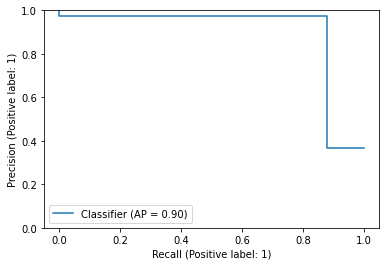

In [ ]:
plot_precision_recall(y_test_inverted, top_parameter_decision_tree_predictions_inverted)

A perfect graph here would be a horizontal line at 1 and vertical line at 1. 

Precision measures the true positives divided by (true positive + false positives)

Recall measures the true positives divided by (true positive + false negative)

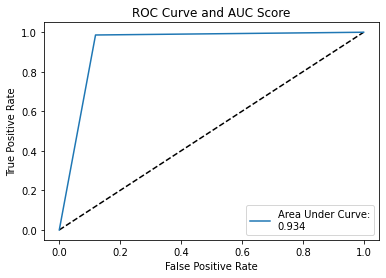

In [ ]:
plot_roc_and_print_auc(y_test_np, top_parameter_decision_tree_predictions)

True positive rate is true positive divided by (true positives + false positives)

False positive rate is false positive divided by (true negatives + false negatives)

ROC curve then plots these two rates against each other.

A perfect curve is actually a vertical line at zero and horizontal line at 1.

The area under this perfect curve is then (1x1) = 1. 

ROC score here is very high

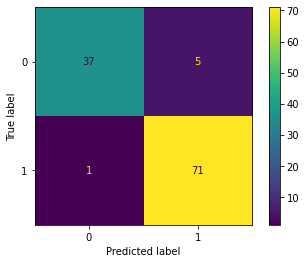

In [ ]:
plot_confusion_matrix(y_test_np, top_parameter_decision_tree_predictions)

The confusion matrix then gives an overview of how many values were in each of 4 categories and coordinates [predicted, true] of:

False Negative = [0,1]

True Negative = [1,1]

True Positive = [1,0]

False Positive = [0,1]

The best results are when the False positive and False negatives are relatively very small (or ideally zero). 

Predicting malignant cancer is very good (Predicting label 0)

We are predicting benign values very well (Predicting label 1).

However predicting malignant cancer is clearly more important as if we get this wrong it could easily mean death.



Now lets use these parameters to perform the cross validation on these parameters.

In [ ]:
improved_decision_classifier_cv_models = []

for i, [train_index, test_index] in enumerate(kf.split(X_all, y_all)):
  improved_decision_classifier = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 6, min_samples_split = 2, min_samples_leaf= 1, max_leaf_nodes = 9)
  improved_decision_classifier.fit(X.iloc[train_index],y.iloc[train_index])
  improved_decision_classifier_cv_models.append(improved_decision_classifier)  

In [ ]:
improved_decision_classifier_cv_predictions = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',
                                                                                       splitter = 'random',
                                                                                       max_depth = 6,
                                                                                       min_samples_split = 2,
                                                                                       min_samples_leaf= 1,
                                                                                       max_leaf_nodes = 9),
                                                                                       X,
                                                                                       y,
                                                                                       cv = 10)

In [ ]:
#change ones to zeros and zeros to ones so one will represent Malignant.
y_inverted = 1 - y_all
improved_decision_classifier_cv_predictions_inverted = 1 - improved_decision_classifier_cv_predictions

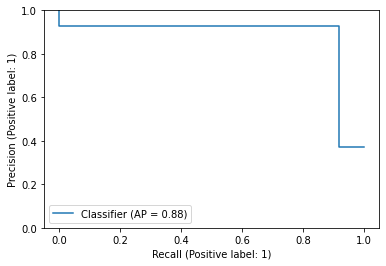

In [ ]:
plot_precision_recall(y_inverted, improved_decision_classifier_cv_predictions_inverted)

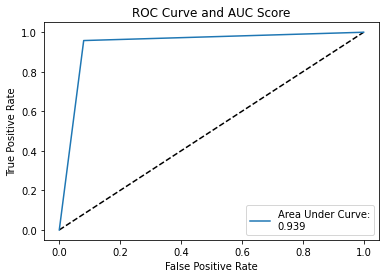

In [ ]:
plot_roc_and_print_auc(y_all, improved_decision_classifier_cv_predictions)

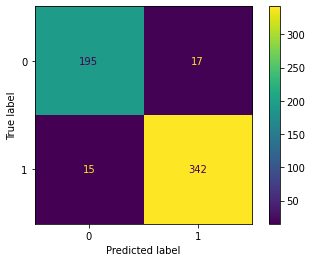

In [ ]:

plot_confusion_matrix(y_all, improved_decision_classifier_cv_predictions)

In [ ]:
print(f"Pre Cross Validation Ratios:\nTrue Positive / False Positive = {71/6:.2f}\
\nTrue Negative / False Negative = {36/1:.2f}\
\n\nPost Cross Validation Ratios:\nTrue Positive / False Positive = {336/19:.2f}\
\nTrue Negative / False Negative = {193/17:.2f}")

Pre Cross Validation Ratios:
True Positive / False Positive = 11.83
True Negative / False Negative = 36.00

Post Cross Validation Ratios:
True Positive / False Positive = 17.68
True Negative / False Negative = 11.35


In all three graphs we can see the scores in general have improved as CV has reduced the overfitting.

And we can see our ratio of correctly detecting malignant (true negative) has increased by ~30% increase

Next we will compare this with the PCA data

In [ ]:
#Create a dataframe for storing scores and parameters used.
pca_decision_tree_hyperparameter_tuning_df = pd.DataFrame({'criterion': [],
                                                       'splitter': [],
                                                       'max_depth': [],
                                                       'min_samples_split' : [],
                                                       'min_samples_leaf' : [],
                                                       'max_leaf_nodes' : [],
                                                       'training_prediction_score' : [],
                                                       'Homogeneity Score': [],
                                                       'Completeness Score': [],
                                                       'V_measure Score': [],
                                                       'Accuracy Score': [],
                                                       'Balanced Accuracy Score': [],
                                                       'F1 Score': [],
                                                       })
for criterion in ['entropy']:
  for splitter in ['random']:
    for max_depth in [1,2,3,4,5,6,7,8]:
      for min_samples_split in [2]:
        for min_samples_leaf in [1]:
          for max_leaf_nodes in np.arange(2,20):
            decision_tree = DecisionTreeClassifier(criterion = criterion,
                                                   splitter= splitter,
                                                   max_depth = max_depth,
                                                   min_samples_split = min_samples_split,
                                                   min_samples_leaf = min_samples_leaf,
                                                   max_leaf_nodes = max_leaf_nodes)
            
            decision_tree.fit(X_train_pca, y_train)
            predictions = decision_tree.predict(X_test_pca)
            training_predictions = decision_tree.predict(X_train_pca)
            training_prediction_score = accuracy_score(y_train, training_predictions)
            h, c, v, acc_score, bal_acc_score, score_f1 = classification_performance_evaluation(y_test, predictions, print_output = False)
            pca_decision_tree_hyperparameter_tuning_df = pca_decision_tree_hyperparameter_tuning_df.append({'criterion': criterion,
                                                       'splitter': splitter,
                                                       'max_depth': max_depth,
                                                       'min_samples_split' : min_samples_split,
                                                       'min_samples_leaf' : min_samples_leaf,
                                                       'max_leaf_nodes' : max_leaf_nodes,
                                                       'training_prediction_score' : training_prediction_score,
                                                       'Homogeneity Score': h,
                                                       'Completeness Score': c,
                                                       'V_measure Score': v,
                                                       'Accuracy Score': acc_score,
                                                       'Balanced Accuracy Score': bal_acc_score,
                                                       'F1 Score': score_f1,
                                                       }, ignore_index = True) 

In [ ]:
top_30_decision_tree_pca = pca_decision_tree_hyperparameter_tuning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)
top_30_decision_tree_pca.head(10)

,criterion,splitter,max_depth,min_samples_split,min_samples_leaf,max_leaf_nodes,training_prediction_score,Homogeneity Score,Completeness Score,V_measure Score,Accuracy Score,Balanced Accuracy Score,F1 Score
0,entropy,random,6.0,2.0,1.0,18.0,0.964835,0.770329,0.782362,0.776299,0.964912,0.957341,0.972603
1,entropy,random,6.0,2.0,1.0,17.0,0.971429,0.770329,0.782362,0.776299,0.964912,0.957341,0.972603
2,entropy,random,8.0,2.0,1.0,19.0,0.986813,0.689726,0.689726,0.689726,0.947368,0.943452,0.958333
3,entropy,random,6.0,2.0,1.0,13.0,0.971429,0.692599,0.716098,0.704153,0.947368,0.933532,0.959459
4,entropy,random,4.0,2.0,1.0,19.0,0.969231,0.692599,0.716098,0.704153,0.947368,0.933532,0.959459
5,entropy,random,8.0,2.0,1.0,10.0,0.964835,0.686748,0.697476,0.692070,0.947368,0.938492,0.958904
6,entropy,random,7.0,2.0,1.0,9.0,0.956044,0.692599,0.716098,0.704153,0.947368,0.933532,0.959459
7,entropy,random,8.0,2.0,1.0,17.0,0.973626,0.686748,0.697476,0.692070,0.947368,0.938492,0.958904
8,entropy,random,7.0,2.0,1.0,13.0,0.969231,0.650003,0.665876,0.657843,0.938596,0.926587,0.952381
9,entropy,random,4.0,2.0,1.0,16.0,0.956044,0.657852,0.686922,0.672073,0.938596,0.921627,0.953020


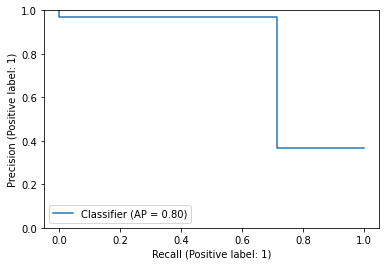

In [ ]:
pca_decision_tree = DecisionTreeClassifier(criterion = 'entropy',
                                           splitter= 'random',
                                           max_depth = 5,
                                           min_samples_split = 2,
                                           min_samples_leaf = 1,
                                           max_leaf_nodes = 17)
pca_decision_tree.fit(X_train_pca[:,:7], y_train_np)
improved_pca_decision_tree_predictions = pca_decision_tree.predict(X_test_pca[:,:7])
y_test_inverted = 1- y_test_np
improved_pca_decision_tree_predictions_inverted = 1 - improved_pca_decision_tree_predictions
plot_precision_recall(y_test_inverted, improved_pca_decision_tree_predictions_inverted)

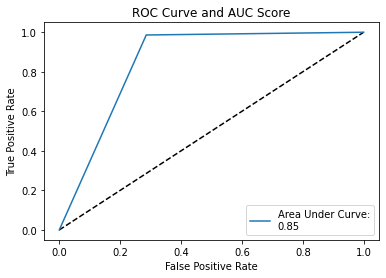

In [ ]:
plot_roc_and_print_auc(y_test_np, improved_pca_decision_tree_predictions)

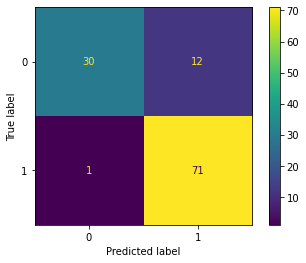

In [ ]:
plot_confusion_matrix(y_test_np, improved_pca_decision_tree_predictions)

Some fairly average looking scores. 

Lets proceed to the cross validation.

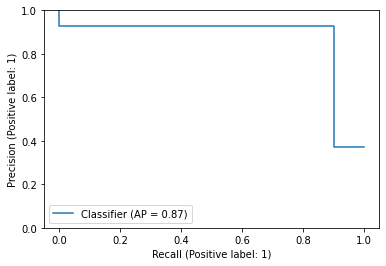

In [ ]:
pca_improved_decision_classifier_cv_predictions = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',
                                                                                       splitter = 'random',
                                                                                       max_depth = 5,
                                                                                       min_samples_split = 2,
                                                                                       min_samples_leaf= 1,
                                                                                       max_leaf_nodes = 17),
                                                                                       X_pca,
                                                                                       y_all,
                                                                                       cv = 10)
#invert values as malignant should be 1 for precision recall graph
y_inverted = 1 - y_all
pca_improved_decision_classifier_cv_predictions_inverted = 1 - pca_improved_decision_classifier_cv_predictions
plot_precision_recall(y_inverted, pca_improved_decision_classifier_cv_predictions_inverted)

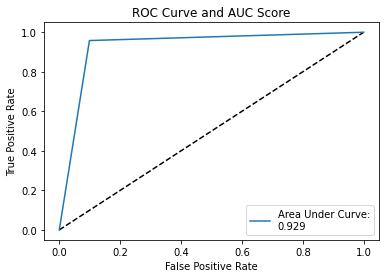

In [ ]:
plot_roc_and_print_auc(y_all, pca_improved_decision_classifier_cv_predictions)

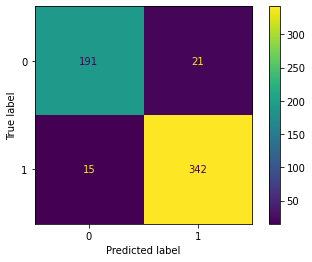

In [ ]:
plot_confusion_matrix(y_all, pca_improved_decision_classifier_cv_predictions)

CV scores are generally better.

Before we raised the question of improving the accuracy of determining malignant cancer at the expense of incorrectly determining benign cancer.

That is to say we could weight false negative (malignant reported as benign) as more important that false positive (benign reported as malignant).

This can be done with using the class weight parameter.

Class Weighting is Benign 1 : Malignant 1


<Figure size 720x720 with 0 Axes>

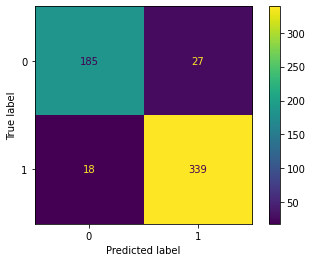

Class Weighting is Benign 2 : Malignant 1


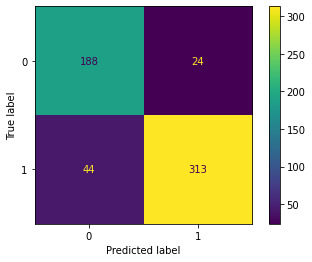

Class Weighting is Benign 3 : Malignant 1


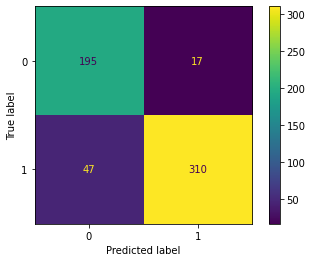

Class Weighting is Benign 4 : Malignant 1


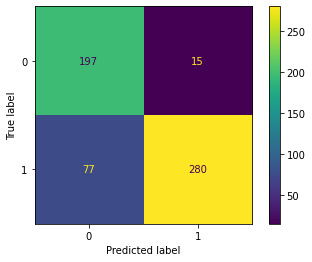

Class Weighting is Benign 5 : Malignant 1


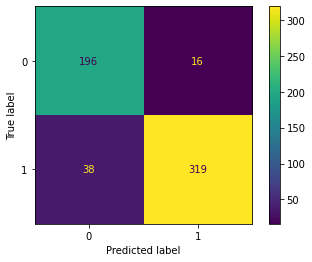

Class Weighting is Benign 6 : Malignant 1


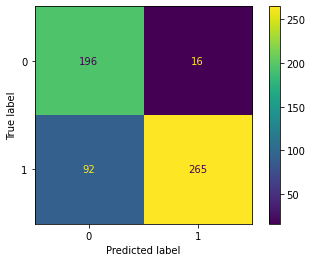

Class Weighting is Benign 7 : Malignant 1


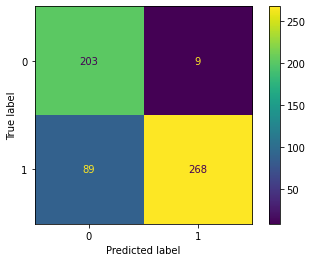

Class Weighting is Benign 8 : Malignant 1


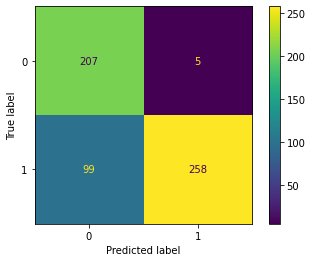

Class Weighting is Benign 9 : Malignant 1


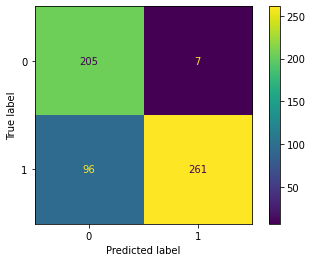

Class Weighting is Benign 10 : Malignant 1


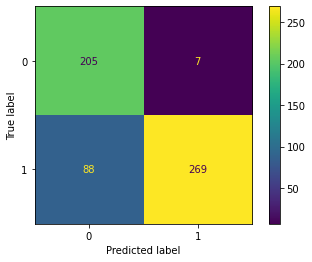

Class Weighting is Benign 11 : Malignant 1


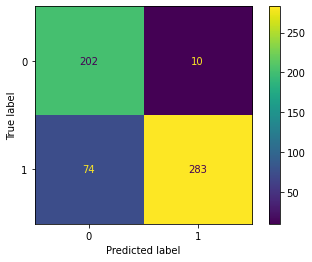

Class Weighting is Benign 12 : Malignant 1


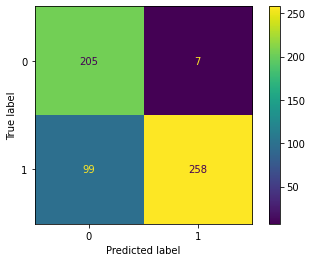

Class Weighting is Benign 13 : Malignant 1


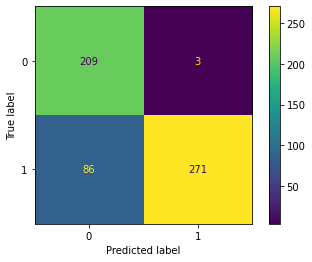

Class Weighting is Benign 14 : Malignant 1


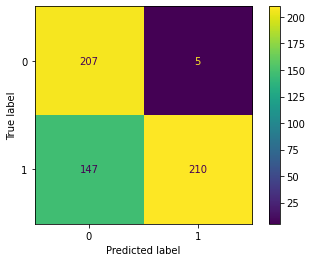

Class Weighting is Benign 15 : Malignant 1


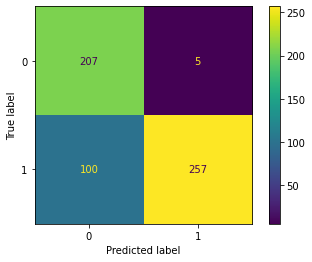

Class Weighting is Benign 16 : Malignant 1


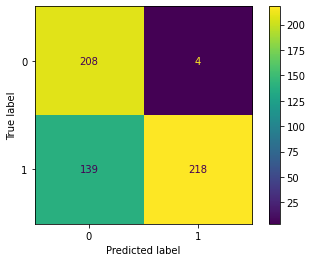

Class Weighting is Benign 17 : Malignant 1


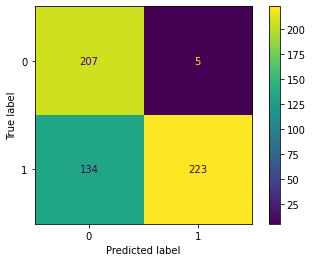

Class Weighting is Benign 18 : Malignant 1


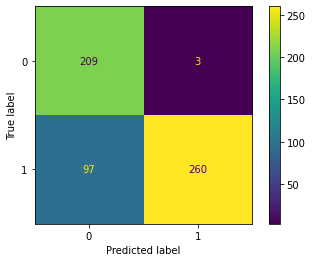

Class Weighting is Benign 19 : Malignant 1


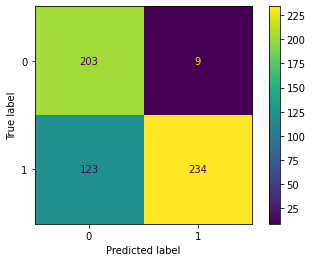

In [ ]:
fig = plt.figure(figsize = (10,10))
for i in range(1,20,1):
  class_weight = {0:i}
  pca_improved_decision_classifier_cv_predictions = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',
                                                                                             splitter = 'random',
                                                                                             max_depth = 6,
                                                                                             min_samples_split = 2,
                                                                                             min_samples_leaf= 1,
                                                                                             max_leaf_nodes = 9,
                                                                                             class_weight = class_weight),
                                                                      X_pca,
                                                                      y_all,
                                                                      cv = 10)
  y_inverted = 1 - y_all
  pca_improved_decision_classifier_cv_predictions_inverted = 1 - pca_improved_decision_classifier_cv_predictions
  # fig.add_subplot(2,5, i+1)
  print(f"Class Weighting is Benign {i} : Malignant 1")
  plot_confusion_matrix(y_all, pca_improved_decision_classifier_cv_predictions)
  


In [ ]:
print("Potentially best trade off at weighting of 11:1 (benign : malignant)\n")
print(f"Post Cross Validation Ratios:\nTrue Positive / False Positive = {339/18:.2f}\
\nTrue Negative / False Negative = {192/20:.2f}\
\n\nBest (Post Weighting) Cross Validation Ratios:\nTrue Positive / False Positive = {301/6:.2f}\
\nTrue Negative / False Negative = {206/56:.2f}")

Potentially best trade off at weighting of 11:1 (benign : malignant)

Post Cross Validation Ratios:
True Positive / False Positive = 18.83
True Negative / False Negative = 9.60

Best (Post Weighting) Cross Validation Ratios:
True Positive / False Positive = 50.17
True Negative / False Negative = 3.68


So what does this mean. It now means an improvemnent of correctly predicting malignant cancer from 95.0% to 98.4%. 

Correctly predicting a benign cancer has reduced from 90.6% to 78.6%.

It is thought that this rebalancing is significant but obviously would be for medical professional to decide acceptable levels of risk.


A doctor will not only want results but also explainable results so let us plot the decision tree to show what this process looks like.


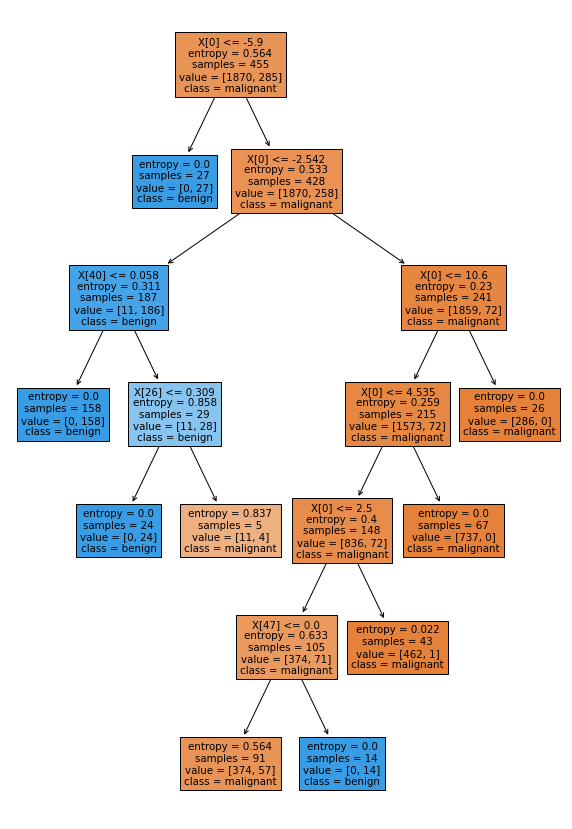

In [ ]:
weight_11_decision_tree = DecisionTreeClassifier(criterion = 'entropy',
                                                 splitter = 'random',
                                                 max_depth = 6,
                                                 min_samples_split = 2,
                                                 min_samples_leaf= 1,
                                                 max_leaf_nodes = 9,
                                                 random_state = 1,
                                                 class_weight = {0:11})
weight_11_decision_tree.fit(X_train_pca, y_train_np)
plt.figure(figsize = (10,15))
plot_tree(weight_11_decision_tree, class_names = ['malignant', 'benign'], filled = True)
plt.show()

In [ ]:
X_train_pca[:,0].min()

-8.41761324391402

In [ ]:
print("How does this tree work in practice?\n\nFor the first row we have:")
print(f"Value in column 0 is {X_train_pca[0,0]:.3f}\n")
print(f"So we from the top we ask is this value <= to -5.897? The answer is yes (i.e True.)")
print(f"So we take the RIGHT branch (as right branches are all True here)")
print(f"Next is this value <= -2.552? Again the answer is yes. So take right branch")
print(f"Next is this value <= 10.599? The answer is no. So take  LEFT branch")
print(f"Next is this value <= 4.535? The answer is no. So take  LEFT branch")
print(f"Next is this value <= 2.496? The answer is yes. So take  RIGHT branch")
print(f"This ends up in the box with entropy = 0.022, class = malignant")
print(f"This first row of data therefore is predicted to be malignant\n")
print(f"The actual class is {y_train.iloc[0]}, which is malignant and so correct!")

How does this tree work in practice?

For the first row we have:
Value in column 0 is 3.955

So we from the top we ask is this value <= to -5.897? The answer is yes (i.e True.)
So we take the RIGHT branch (as right branches are all True here)
Next is this value <= -2.552? Again the answer is yes. So take right branch
Next is this value <= 10.599? The answer is no. So take  LEFT branch
Next is this value <= 4.535? The answer is no. So take  LEFT branch
Next is this value <= 2.496? The answer is yes. So take  RIGHT branch
This ends up in the box with entropy = 0.022, class = malignant
This first row of data therefore is predicted to be malignant

The actual class is 0, which is malignant and so correct!


## 3.3) Random Forests Classifier

Random forests is an ensemble method, it uses multiple decision trees. Each decision tree has different parameters.

The purpose of ensembles like random forest is by combination of many different models they can greatly reduce training overfitting. Each model will select different data by randomly sampling with replacement. 

In [ ]:
#Random forests take significant run time (), commented out and hardcoded printouts to reduce runtime
'''
rfecv_random_forest = RFECV(estimator = RandomForestClassifier(),
                            step = 1,
                            cv = 10)
rfecv_random_forest.fit(X_train_np, y_train_np)
print(f"Top 7 ranked columns are: {X.columns[rfecv.ranking_][:7]}")
print(f"The training score was {rfecv_random_forest.score(X_train, y_train)}")
rfecv_random_forest_test_score = accuracy_score(y_test, rfecv_random_forest.predict(X_test))
print(f"The test score was {rfecv_random_forest_test_score:.4f}")
print(f"For decision tree this test score was {accuracy_score(y_test, rfecv_decision_tree_predictions):.4f}")

'''
print(f"Top 7 ranked columns are: ['radius error', 'mean fractal dimension', 'mean symmetry', 'mean concave points', 'mean concavity', 'mean compactness','mean smoothness']")
print(f"The training score was 1.0")
print(f"The test score was 0.9561")
print(f"For decision tree this test score was 0.9298")


Top 7 ranked columns are: ['radius error', 'mean fractal dimension', 'mean symmetry', 'mean concave points', 'mean concavity', 'mean compactness','mean smoothness']
The training score was 1.0
The test score was 0.9561
For decision tree this test score was 0.9298


Already we can see the power of random forests. The training score is obviously overfitting but despite this the test score is 3.5% higher in random forests.

In [ ]:
#Create a dataframe for storing scores and k-fold parameters used.
forest_classifier_results = pd.DataFrame({'K_fold': [],
                                            'Homogeneity Score': [],
                                            'Completeness Score': [],
                                            'V_measure Score': [],
                                            'Accuracy Score': [],
                                            'Balanced Accuracy Score': [],
                                            'F1 Score': []})
forest_model_feature_importances = []
forest_prediction_scores = []

random_forest_non_pca_acc_scores = []
random_forest_non_pca_bal_acc_scores = []
random_forest_non_pca_bal_f1_scores = []

forest_training_scores = []
forest_testing_scores = []
for i, [train_index, test_index] in enumerate(kf.split(X_all, y_all)):
  forest_decision_classifier = RandomForestClassifier()

  forest_decision_classifier.fit(X.iloc[train_index],y.iloc[train_index])
  forest_model_feature_importances.append(forest_decision_classifier.feature_importances_)
  predictions = forest_decision_classifier.predict(X.iloc[test_index])
  [h,c,v,a,b,f1] = classification_performance_evaluation(y.iloc[test_index], predictions)
  forest_classifier_results = forest_classifier_results.append({'K_fold': i,
                                                                    'Homogeneity Score': h,
                                                                    'Completeness Score': c,
                                                                    'V_measure Score': v,
                                                                    'Accuracy Score': a,
                                                                    'Balanced Accuracy Score': b,
                                                                    'F1 Score': f1}, ignore_index = True)
  
  random_forest_non_pca_acc_scores.append(a)
  random_forest_non_pca_bal_acc_scores.append(b)
  random_forest_non_pca_bal_f1_scores.append(f1)
  forest_train_predictions = forest_decision_classifier.predict(X.iloc[train_index])
  forest_test_predictions = forest_decision_classifier.predict(X.iloc[test_index])
  forest_training_scores.append(accuracy_score(y.iloc[train_index], forest_train_predictions))
  forest_testing_scores.append(accuracy_score(y.iloc[test_index], forest_test_predictions))

forest_training_score = np.mean(forest_training_scores)
forest_testing_score = np.mean(forest_testing_scores)
print(f"Average Training score is {forest_training_score}")
print(f"Average Testing score is {forest_testing_score}")

Average Training score is 1.0
Average Testing score is 0.9665726817042606


In [ ]:
forest_feature_importance_df = pd.DataFrame({'importance':np.mean( forest_model_feature_importances, axis = 0)}).sort_values(by = 'importance', ascending = False)

print(f"The top 7 most important features and their importances are: \n")
for i, column in enumerate(X.columns[forest_feature_importance_df[:7].index]):
    print(f"Column {column} has importance {forest_feature_importance_df.iloc[i].values[0]:.4f} \n")

top_forest_importances = []
for column_index in forest_feature_importance_df[:7].index:
  top_forest_importances.append([X_train.columns[column_index]][0])

The top 7 most important features and their importances are: 

Column multiple_of_worst_features has importance 0.0992 

Column worst - mean area has importance 0.0681 

Column multiple_of_mean_features has importance 0.0676 

Column worst perimeter has importance 0.0600 

Column sum_of_worst_features has importance 0.0556 

Column mean_of_worst_features has importance 0.0512 

Column worst area has importance 0.0466 



This is very interesting compared to the decision tree. In decision tree multiple_of_worst_features had importance 0.6851 (nearly 7 times the value).

Next lets look at the results using PCA

In [ ]:
#Create a dataframe for storing scores and k-fold parameters used.
pca_forest_classifier_results = pd.DataFrame({'K_fold': [],
                                            'Homogeneity Score': [],
                                            'Completeness Score': [],
                                            'V_measure Score': [],
                                            'Accuracy Score': [],
                                            'Balanced Accuracy Score': [],
                                            'F1 Score': []})

pca_forest_training_scores = []
pca_forest_testing_scores = []


random_forest_pca_acc_scores = []
random_forest_pca_bal_acc_scores = []
random_forest_pca_bal_f1_scores = []

pca_forest_model_feature_importances = []
pca_forest_prediction_scores = []
for i, [train_index, test_index] in enumerate(kf.split(X_pca, y_all)):
  pca_forest_decision_classifier = RandomForestClassifier()
  pca_forest_decision_classifier.fit(X.iloc[train_index],y.iloc[train_index])

  pca_forest_model_feature_importances.append(pca_forest_decision_classifier.feature_importances_)
  predictions = pca_forest_decision_classifier.predict(X.iloc[test_index])
  [h,c,v,a,b,f1] = classification_performance_evaluation(y.iloc[test_index], predictions)
  pca_forest_classifier_results = pca_forest_classifier_results.append({'K_fold': i,
                                                                            'Homogeneity Score': h,
                                                                            'Completeness Score': c,
                                                                            'V_measure Score': v,
                                                                            'Accuracy Score': a,
                                                                            'Balanced Accuracy Score': b,
                                                                            'F1 Score': f1}, ignore_index = True)
  random_forest_pca_acc_scores.append(a)
  random_forest_pca_bal_acc_scores.append(b)
  random_forest_pca_bal_f1_scores.append(f1)
  pca_train_predictions = pca_forest_decision_classifier.predict(X.iloc[train_index])
  pca_test_predictions = pca_forest_decision_classifier.predict(X.iloc[test_index])
  pca_forest_training_scores.append(accuracy_score(y.iloc[train_index], pca_train_predictions))
  pca_forest_testing_scores.append(accuracy_score(y.iloc[test_index], pca_test_predictions))

pca_forest_training_score = np.mean(pca_forest_training_scores)
pca_forest_testing_score = np.mean(pca_forest_testing_scores)
print(f"Average Training score is {pca_forest_training_score}")
print(f"Average Testing score is {pca_forest_testing_score}")

Average Training score is 1.0
Average Testing score is 0.9683583959899748


Interestingly a slightly higher score using PCA

In [ ]:
pca_forest_feature_importance_df = pd.DataFrame({'importance':np.mean(pca_forest_model_feature_importances, axis = 0)}).sort_values(by = 'importance', ascending = False)

pca_X_df = pd.DataFrame(X_pca)
print(f"The top 7 most important features and their importances are: \n")
for i, column in enumerate(pca_forest_feature_importance_df[:7].index):
    print(f"Column {column} has importance {pca_forest_feature_importance_df.iloc[i].values[0]:.4f} \n")

The top 7 most important features and their importances are: 

Column 66 has importance 0.0994 

Column 54 has importance 0.0797 

Column 22 has importance 0.0665 

Column 33 has importance 0.0595 

Column 63 has importance 0.0561 

Column 67 has importance 0.0547 

Column 32 has importance 0.0453 



Feature importance for column 66 is 7 times lower than seen in decision tree (at 0.6862 importance)

In [ ]:
#RFECV importances hard coded as runtime to generate them was significant
forest_feature_importance = pd.DataFrame({'RFECV_Forest_Importances': ['radius error',
                                                                  'mean fractal dimension',
                                                                  'mean symmetry',
                                                                  'mean concave points',
                                                                  'mean concavity',
                                                                  'mean compactness',
                                                                  'mean smoothness'],
                                          'RFECV_Tree_Importances': X.columns[rfecv.ranking_][:7],
                                          "Random_Forest_Tree_Importances": top_forest_importances,
                                          "Decision_Tree_Importances": top_decision_tree_importances})
forest_feature_importance

,RFECV_Forest_Importances,RFECV_Tree_Importances,Random_Forest_Tree_Importances,Decision_Tree_Importances
0,radius error,mean perimeter,multiple_of_worst_features,multiple_of_worst_features
1,mean fractal dimension,mean texture,worst - mean area,mean_of_worst_features
2,mean symmetry,mean texture,multiple_of_mean_features,mean concave points
3,mean concave points,mean texture,worst perimeter,worst - mean area
4,mean concavity,mean texture,sum_of_worst_features,sum_of_worst_features
5,mean compactness,mean texture,mean_of_worst_features,worst - mean radius
6,mean smoothness,mean texture,worst area,worst area


In [ ]:
print(f"Random Forest Importances include {set(top_forest_importances).difference(set(top_decision_tree_importances))} not seen in the decision tree importances")
print(f"Decision Tree Importances include {set(top_decision_tree_importances).difference(set(top_forest_importances))} not seen in the random forest importances")

Random Forest Importances include {'multiple_of_mean_features', 'worst perimeter'} not seen in the decision tree importances
Decision Tree Importances include {'mean concave points', 'worst - mean radius'} not seen in the random forest importances


Same exact output seen in RFECV compared to decision tree.

For Random Forest vs Decision Tree we see 6 different features in each are listed as important and the order is very different.

In [ ]:
pd.DataFrame({"Random Forest CV Average Results" : forest_classifier_results.mean().drop('K_fold').apply(lambda x: f"{x:.4f}"),
              "PCA Random Forest CV Average Results" : pca_forest_classifier_results.mean().drop('K_fold').apply(lambda x: f"{x:.4f}")})

,Random Forest CV Average Results,PCA Random Forest CV Average Results
Homogeneity Score,0.8109,0.8203
Completeness Score,0.8174,0.8238
V_measure Score,0.8140,0.8219
Accuracy Score,0.9666,0.9684
Balanced Accuracy Score,0.9617,0.9649
F1 Score,0.9737,0.9751


PCA scores are outperforming non-PCA

### 3.3b) Random Forest Classifier - Hyperparameter Tuning

In [ ]:
#The code below takes significant runtime ~3hours. Will be saved to a csv on github and loaded from there to minimise ipynb runtime 
'''
#Create a dataframe for storing scores and parameters used.

forest_hyperparameter_tuning_df = pd.DataFrame({'criterion': [],
                                                       'max_features': [],
                                                       'max_depth': [],
                                                       'min_samples_split' : [],
                                                       'min_samples_leaf' : [],
                                                       'max_leaf_nodes' : [],
                                                       'training_prediction_score' : [],
                                                       'Homogeneity Score': [],
                                                       'Completeness Score': [],
                                                       'V_measure Score': [],
                                                       'Accuracy Score': [],
                                                       'Balanced Accuracy Score': [],
                                                       'F1 Score': [],
                                                       })
for criterion in ['gini', 'entropy']:
  for max_features in ['auto', 'sqrt', 'log2']:
    for max_depth in [1,2,3,4,5,6,7,8]:
      for min_samples_split in np.arange(2,501,50):
        for min_samples_leaf in np.arange(1,250,50):
          for max_leaf_nodes in np.arange(2,20):
            forest_decision_tree = RandomForestClassifier(criterion = criterion,
                                                   max_features= max_features,
                                                   max_depth = max_depth,
                                                   min_samples_split = min_samples_split,
                                                   min_samples_leaf = min_samples_leaf,
                                                   max_leaf_nodes = max_leaf_nodes)
            
            forest_decision_tree.fit(X_train, y_train)
            forest_predictions = forest_decision_tree.predict(X_test)
            forest_training_predictions = forest_decision_tree.predict(X_train)
            forest_training_prediction_score = accuracy_score(y_train, forest_training_predictions)
            h, c, v, acc_score, bal_acc_score, score_f1 = classification_performance_evaluation(y_test, forest_predictions, print_output = False)
            forest_hyperparameter_tuning_df = forest_hyperparameter_tuning_df.append({'criterion': criterion,
                                                       'max_features': max_features,
                                                       'max_depth': max_depth,
                                                       'min_samples_split' : min_samples_split,
                                                       'min_samples_leaf' : min_samples_leaf,
                                                       'max_leaf_nodes' : max_leaf_nodes,
                                                       'training_prediction_score' : forest_training_prediction_score,
                                                       'Homogeneity Score': h,
                                                       'Completeness Score': c,
                                                       'V_measure Score': v,
                                                       'Accuracy Score': acc_score,
                                                       'Balanced Accuracy Score': bal_acc_score,
                                                       'F1 Score': score_f1,
                                                       }, ignore_index = True) 
'''
#Note the code above takes significant run time.
#For simplicity it was saved as below to github page 
#and will be loaded from there        
'''
top_30_forest = forest_hyperparameter_tuning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)
top_30_forest.to_csv('top_30_forest.csv') 
'''  

"\ntop_30_forest = forest_hyperparameter_tuning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)\ntop_30_forest.to_csv('top_30_forest.csv') \n"

In [ ]:
top_30_forest = pd.read_csv('https://raw.githubusercontent.com/adbandy/data_files/main/top_30_forest.csv', index_col = 0)
top_30_forest

,criterion,max_features,max_depth,min_samples_split,min_samples_leaf,max_leaf_nodes,training_prediction_score,Homogeneity Score,Completeness Score,V_measure Score,Accuracy Score,Balanced Accuracy Score,F1 Score
0,gini,log2,7.0,52.0,51.0,3.0,0.971429,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
1,gini,log2,8.0,102.0,51.0,4.0,0.962637,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
2,gini,log2,4.0,2.0,51.0,5.0,0.962637,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
3,gini,sqrt,2.0,152.0,51.0,16.0,0.969231,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
4,gini,sqrt,4.0,102.0,51.0,7.0,0.969231,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
5,gini,auto,4.0,102.0,51.0,6.0,0.967033,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
6,gini,log2,2.0,52.0,1.0,4.0,0.982418,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
7,gini,sqrt,6.0,152.0,51.0,8.0,0.967033,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
8,gini,log2,4.0,52.0,51.0,4.0,0.969231,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
9,gini,auto,8.0,102.0,1.0,11.0,0.978022,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973


In [ ]:
print(f"The top parameters for accuracy score in Random Forest Classifier are:\n\n{top_30_forest.iloc[0,:6]}")

The top parameters for accuracy score in Random Forest Classifier are:

criterion            gini
max_features         log2
max_depth             7.0
min_samples_split    52.0
min_samples_leaf     51.0
max_leaf_nodes        3.0
Name: 0, dtype: object


In [ ]:
random_forest_train_test_split = RandomForestClassifier(criterion = 'gini',
                                                        max_features = 'log2',
                                                        min_samples_split = 52,
                                                        max_depth = 7,
                                                        min_samples_leaf= 51,
                                                        max_leaf_nodes = 3)
random_forest_train_test_split.fit(X_train_np, y_train_np)
random_forest_train_test_split_predictions = random_forest_train_test_split.predict(X_test_np)

<Figure size 2160x720 with 0 Axes>

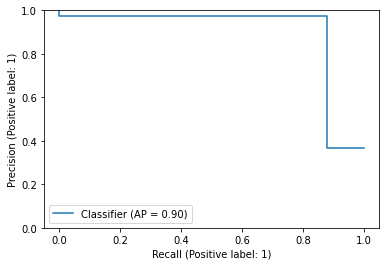

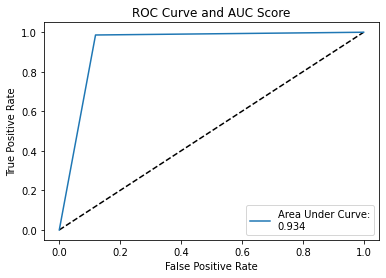

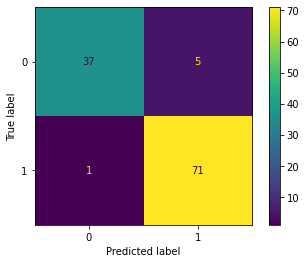

In [ ]:
plt.figure(figsize = (30,10))

plot_precision_recall(1-y_test_np, 1-random_forest_train_test_split_predictions)

plot_roc_and_print_auc(y_test_np, random_forest_train_test_split_predictions)

plot_confusion_matrix(y_test_np, random_forest_train_test_split_predictions)

In [ ]:
improved_forest_predictions = cross_val_predict(RandomForestClassifier(criterion = 'gini',
                                                                       max_features = 'log2',
                                                                       min_samples_split = 52,
                                                                       max_depth = 7,
                                                                       min_samples_leaf= 51,
                                                                       max_leaf_nodes = 3),
                                                X_all,
                                                y_all,
                                                cv =10)

<Figure size 2160x720 with 0 Axes>

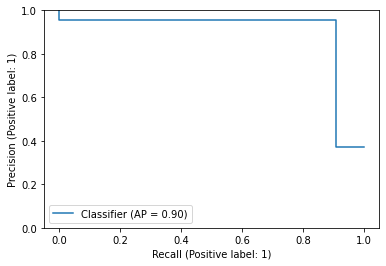

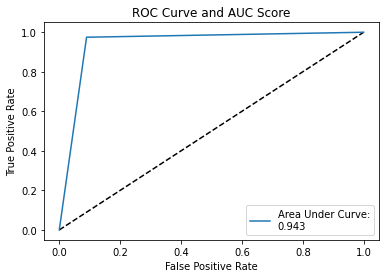

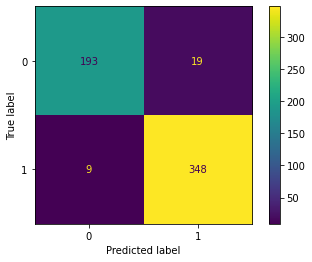

In [ ]:
plt.figure(figsize = (30,10))

plot_precision_recall(1-y_all, 1-improved_forest_predictions)

plot_roc_and_print_auc(y_all, improved_forest_predictions)

plot_confusion_matrix(y_all, improved_forest_predictions)

Results are better in all aspects with random forest compared to decision tree

And compare this with the PCA random forest results:

In [ ]:
#Create a dataframe for storing scores and parameters used.

forest_hyperparameter_tuning_df_pca = pd.DataFrame({'criterion': [],
                                                       'max_features': [],
                                                       'max_depth': [],
                                                       'min_samples_split' : [],
                                                       'min_samples_leaf' : [],
                                                       'max_leaf_nodes' : [],
                                                       'training_prediction_score' : [],
                                                       'Homogeneity Score': [],
                                                       'Completeness Score': [],
                                                       'V_measure Score': [],
                                                       'Accuracy Score': [],
                                                       'Balanced Accuracy Score': [],
                                                       'F1 Score': [],
                                                       })
for criterion in ['gini']:
  for max_features in ['log2']:
    for max_depth in [4,5,6,7,8]:
      for min_samples_split in np.arange(2,153,50):
        for min_samples_leaf in [51]:
          for max_leaf_nodes in np.arange(2,10):
            forest_decision_tree_pca = RandomForestClassifier(criterion = criterion,
                                                   max_features= max_features,
                                                   max_depth = max_depth,
                                                   min_samples_split = min_samples_split,
                                                   min_samples_leaf = min_samples_leaf,
                                                   max_leaf_nodes = max_leaf_nodes)
            
            forest_decision_tree_pca.fit(X_train_np, y_train_np)
            forest_predictions = forest_decision_tree_pca.predict(X_test_np)
            forest_training_predictions = forest_decision_tree_pca.predict(X_train_np)
            forest_training_prediction_score = accuracy_score(y_train_np, forest_training_predictions)
            h, c, v, acc_score, bal_acc_score, score_f1 = classification_performance_evaluation(y_test_np, forest_predictions, print_output = False)
            forest_hyperparameter_tuning_df_pca = forest_hyperparameter_tuning_df_pca.append({'criterion': criterion,
                                                                                              'max_features': max_features,
                                                                                              'max_depth': max_depth,
                                                                                              'min_samples_split' : min_samples_split,
                                                                                              'min_samples_leaf' : min_samples_leaf,
                                                                                              'max_leaf_nodes' : max_leaf_nodes,
                                                                                              'training_prediction_score' : forest_training_prediction_score,
                                                                                              'Homogeneity Score': h,
                                                                                              'Completeness Score': c,
                                                                                              'V_measure Score': v,
                                                                                              'Accuracy Score': acc_score,
                                                                                              'Balanced Accuracy Score': bal_acc_score,
                                                                                              'F1 Score': score_f1,
                                                                                              }, ignore_index = True) 

In [ ]:
forest_hyperparameter_tuning_df_pca.sort_values(by = 'Accuracy Score', ascending = False)

,criterion,max_features,max_depth,min_samples_split,min_samples_leaf,max_leaf_nodes,training_prediction_score,Homogeneity Score,Completeness Score,V_measure Score,Accuracy Score,Balanced Accuracy Score,F1 Score
115,gini,log2,7.0,102.0,51.0,5.0,0.967033,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
146,gini,log2,8.0,102.0,51.0,4.0,0.967033,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
100,gini,log2,7.0,2.0,51.0,6.0,0.969231,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
42,gini,log2,5.0,52.0,51.0,4.0,0.958242,0.791127,0.817969,0.804324,0.964912,0.952381,0.972973
67,gini,log2,6.0,2.0,51.0,5.0,0.971429,0.753336,0.786624,0.769620,0.956140,0.940476,0.966443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,gini,log2,4.0,102.0,51.0,2.0,0.947253,0.594730,0.659347,0.625374,0.912281,0.880952,0.935065
8,gini,log2,4.0,52.0,51.0,2.0,0.945055,0.594730,0.659347,0.625374,0.912281,0.880952,0.935065
3,gini,log2,4.0,2.0,51.0,5.0,0.942857,0.564831,0.610008,0.586551,0.912281,0.885913,0.934211
63,gini,log2,5.0,152.0,51.0,9.0,0.947253,0.524385,0.559602,0.541421,0.903509,0.878968,0.927152


In [ ]:
improved_forest_pca = RandomForestClassifier(criterion = 'gini',
                                             max_features = 'log2',
                                             min_samples_split = 2,
                                             max_depth = 6,
                                             min_samples_leaf= 51,
                                             max_leaf_nodes = 8)
improved_forest_pca.fit(X_train_pca[:,:7], y_train_np)
improved_forest_pca_predictions = improved_forest_pca.predict(X_test_pca[:,:7])


<Figure size 2160x720 with 0 Axes>

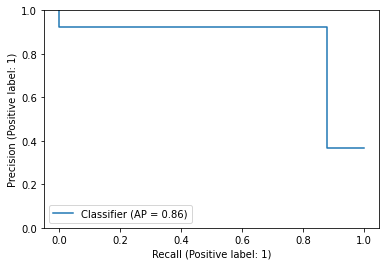

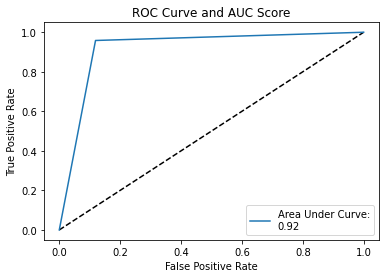

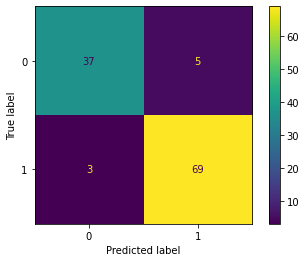

In [ ]:
plt.figure(figsize = (30,10))

plot_precision_recall(1-y_test_np, 1-improved_forest_pca_predictions)

plot_roc_and_print_auc(y_test_np, improved_forest_pca_predictions)

plot_confusion_matrix(y_test_np, improved_forest_pca_predictions)

In [ ]:
improved_forest_pca_predictions_cv = cross_val_predict(RandomForestClassifier(criterion = 'gini',
                                                                       max_features = 'log2',
                                                                       min_samples_split = 2,
                                                                       max_depth = 6,
                                                                       min_samples_leaf= 51,
                                                                       max_leaf_nodes = 8),
                                                X_pca[:,:7],
                                                y_all,
                                                cv =10)

<Figure size 2160x720 with 0 Axes>

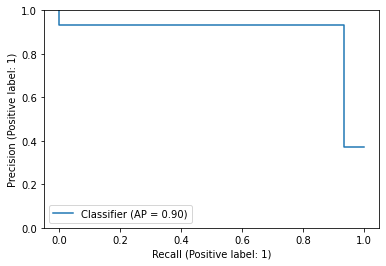

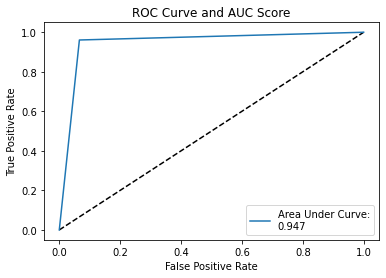

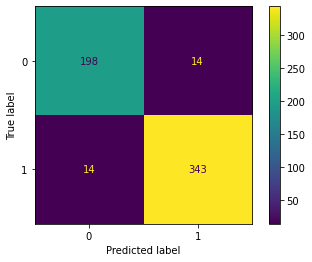

In [ ]:
plt.figure(figsize = (30,10))

plot_precision_recall(1-y_all, 1-improved_forest_pca_predictions_cv)

plot_roc_and_print_auc(y_all, improved_forest_pca_predictions_cv)

plot_confusion_matrix(y_all, improved_forest_pca_predictions_cv)

PCA random forest with CV has even better results.

We cannot simply plot the random forest tree because there is not one tree to plot but 100.

## 3.4) K Nearest Neighbours Classifier 

KNN is in regression and classification problems. Classification is done by majority vote to its neighbors and the data is assigned to its nearest neighbor. KNN can also be used in multiclass problems.

First testing an unbound and untuned model with train test splits

In [ ]:
print(type(X_all))
print(type(X_pca))

print(type(X_train_np))
print(type(X_test_np))

print(type(y_train_np))
print(type(y_test_np))

print(type(X_pca))
print(type(y_all))

print(type(X_train_pca))
print(type(X_test_pca))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Fit Train data in KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, p =2)

knn.fit(X_train_np, y_train_np)

KNeighborsClassifier()

In [ ]:
#Predicting Test data using KNN model
knn_pred = knn.predict(X_test_np)
knn_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [ ]:
#Accuracy of model
knn.score(X_test_np, y_test_np)

0.9473684210526315

Testing a CV unbound untuned model

In [ ]:
#Using K-fold Cross validation on model (k=10)
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X_all, y_all, cv=10, scoring='accuracy').mean())

0.963095238095238


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


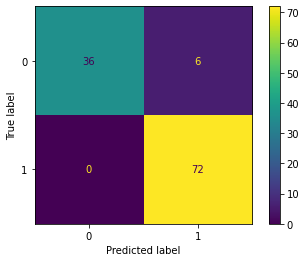

In [ ]:
#Plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix as cm

cm(knn, X_test_np, y_test_np)

### 3.4b) K Nearest Neighbours Classifier - Hyperparameter Tuning

In [ ]:
#Hyperparameter tunning - KNN

#Creating dataframe to store score and parameters used

knn_hyperparameter_tunning_df = pd.DataFrame({'n_neighbors': [],
                                             'weights': [],
                                             'algorithm': [],
                                             'Homogeneity Score': [],
                                             'Completeness Score': [],
                                             'V_measure Score': [],
                                             'Accuracy Score': [],
                                             'Balanced Accuracy Score': [],
                                             'F1 Score': [],
                                             })


In [ ]:
for n_neighbors in [5]:
  for weights in ['uniform', 'distance']:
    for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
      knn_h = KNeighborsClassifier(n_neighbors= n_neighbors,
                                                   weights= weights,
                                                   algorithm= algorithm, p =2)
            
      knn_h.fit(X_train_np, y_train_np)
      predictions = knn_h.predict(X_test_np)
      training_predictions = knn_h.predict(X_train_np)
      training_prediction_score = accuracy_score(y_train_np, training_predictions)
      h, c, v, acc_score, bal_acc_score, score_f1 = classification_performance_evaluation(y_test_np, predictions, print_output = False)
      knn_hyperparameter_tunning_df = knn_hyperparameter_tunning_df.append({'n_neighbors': n_neighbors,
                                                       'weights': weights,
                                                       'algorithm': algorithm,
                                                       'training_prediction_score' : training_prediction_score,
                                                       'Homogeneity Score': h,
                                                       'Completeness Score': c,
                                                       'V_measure Score': v,
                                                       'Accuracy Score': acc_score,
                                                       'Balanced Accuracy Score': bal_acc_score,
                                                       'F1 Score': score_f1,
                                                       }, ignore_index = True)
            

In [ ]:
knn_hyperparameter_tunning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)

,n_neighbors,weights,algorithm,Homogeneity Score,Completeness Score,V_measure Score,Accuracy Score,Balanced Accuracy Score,F1 Score,training_prediction_score
0,5.0,uniform,auto,0.718055,0.757726,0.737357,0.947368,0.928571,0.96,0.98022
1,5.0,uniform,ball_tree,0.718055,0.757726,0.737357,0.947368,0.928571,0.96,0.98022
2,5.0,uniform,kd_tree,0.718055,0.757726,0.737357,0.947368,0.928571,0.96,0.98022
3,5.0,uniform,brute,0.718055,0.757726,0.737357,0.947368,0.928571,0.96,0.98022
4,5.0,distance,auto,0.718055,0.757726,0.737357,0.947368,0.928571,0.96,1.00000
5,5.0,distance,ball_tree,0.718055,0.757726,0.737357,0.947368,0.928571,0.96,1.00000
6,5.0,distance,kd_tree,0.718055,0.757726,0.737357,0.947368,0.928571,0.96,1.00000
7,5.0,distance,brute,0.718055,0.757726,0.737357,0.947368,0.928571,0.96,1.00000


In [ ]:
knn_parameter = knn_hyperparameter_tunning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)

In [ ]:
knn_parameter.iloc[0,:3]

n_neighbors        5.0
weights        uniform
algorithm         auto
Name: 0, dtype: object

In [ ]:
#Using hyperparameter to model the KNN Classifier
top_parameter_knn = KNeighborsClassifier(n_neighbors=5, p=2, weights= 'uniform', algorithm='auto')
top_parameter_knn.fit(X_train_np, y_train_np)

top_parameter_knn_pred = top_parameter_knn.predict(X_test_np)

In [ ]:
top_parameter_knn.score(X_test_np, y_test_np)

0.9473684210526315

Testing CV on tuned KNN Model

In [ ]:
#Using K-fold Cross validation on model (k=10)
from sklearn.model_selection import cross_val_score
print(cross_val_score(top_parameter_knn, X_all, y_all, cv=10, scoring='accuracy').mean())

0.963095238095238


In [ ]:
#Change ones to zeros and zeros to ones, so one will represent Malignant

y_test_inv = 1 - y_test_np
top_parameter_knn_pred_inv = 1- top_parameter_knn_pred

<Figure size 2160x720 with 0 Axes>

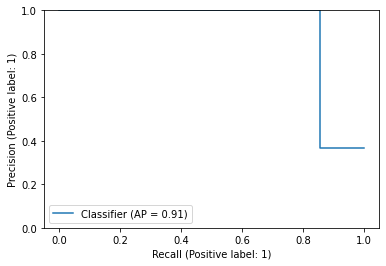

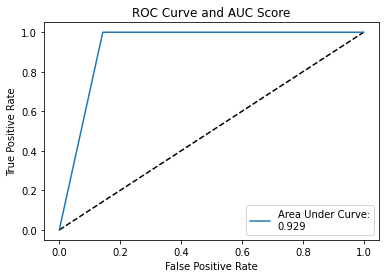

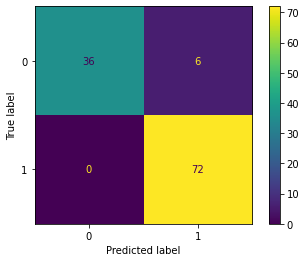

In [ ]:
plt.figure(figsize = (30,10))
#Plot precision recall graph
plot_precision_recall(y_test_inv, top_parameter_knn_pred_inv)
#Plot ROC and AUC Curve
plot_roc_and_print_auc(y_test_np, top_parameter_knn_pred)
#Plot confusion matrix
plot_confusion_matrix(y_test_np, top_parameter_knn_pred)

Using the hyper parameters perform cross validation

In [ ]:
improved_knn_predictions = cross_val_predict(KNeighborsClassifier(n_neighbors=5, p=2, 
                                                                     weights= 'uniform', 
                                                                     algorithm='auto'),
                                                                     X_all,
                                                                     y_all)


In [ ]:
improved_knn_cv_predictions = cross_val_predict(KNeighborsClassifier(n_neighbors=5, p=2, 
                                                                     weights= 'uniform', 
                                                                     algorithm='auto'),
                                                                     X_all,
                                                                     y_all,
                                                                     cv = 10)


###  3.4c)Performing the same untuned modelling with PCA

In [ ]:
pca = PCA()
pca.fit(X_train_np)

#Transforming both X_train and X_test with PCA
X_P_train = pca.transform(X_train_np)
X_P_test = pca.transform(X_test_np)

knn_p = KNeighborsClassifier(n_neighbors=5, p=2)
knn_p.fit(X_P_train, y_train_np)

knn_p.predict(X_P_test)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1])

In [ ]:
print(type(X_all))
print(type(X_pca))

print(type(X_train_np))
print(type(X_test_np))

print(type(y_train_np))
print(type(y_test_np))

print(type(X_pca))
print(type(y_all))

print(type(X_train_pca))
print(type(X_test_pca))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
knn_p.score(X_test_pca, y_test_np)

0.9210526315789473

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


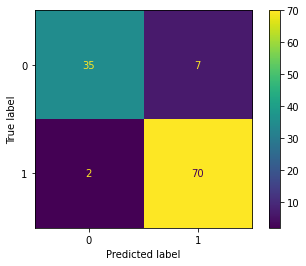

In [ ]:
cm(knn_p, X_test_pca, y_test_np)

###  3.4d)Performing the same untuned modelling with PCA - Hyperparameter Tuning

In [ ]:
#Hyperparameter tuning for KNN model with PCA

#Creating dataframe to stire score and parameter used

knn_pca_hyperparameter_tunning_df = pd.DataFrame({'n_neighbors' : [],
                                                  'weights': [],
                                                  'algorithm': [],
                                                  'Homogeneity Score': [],
                                                  'Completeness Score': [],
                                                  'V_measure Score':[],
                                                  'Accuracy Score' : [],
                                                  'Balanced Accuracy Score': [],
                                                  'F1 Score': [],
                                                  })

In [ ]:
for n_neigbors in [5]:
  for weights in ['uniform', 'distance']:
    for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
      knn_pca_h = KNeighborsClassifier(n_neighbors= n_neigbors,
                                       weights = weights,
                                       algorithm = algorithm, p =2)
      knn_pca_h.fit(X_train_pca, y_train_np)
      predictions = knn_pca_h.predict(X_test_pca)
      training_predictions = knn_pca_h.predict(X_train_pca)
      training_prediction_score = accuracy_score(y_train_np, training_predictions)
      h, c, v, acc_score, bal_acc_score, score_f1 = classification_performance_evaluation(y_test, predictions, print_output = False)
      knn_pca_hyperparameter_tunning_df = knn_pca_hyperparameter_tunning_df.append({'n_neighbors': n_neighbors,
                                                       'weights': weights,
                                                       'algorithm': algorithm,
                                                       'training_prediction_score' : training_prediction_score,
                                                       'Homogeneity Score': h,
                                                       'Completeness Score': c,
                                                       'V_measure Score': v,
                                                       'Accuracy Score': acc_score,
                                                       'Balanced Accuracy Score': bal_acc_score,
                                                       'F1 Score': score_f1,
                                                       }, ignore_index = True)
      

In [ ]:
knn_pca_parameter = knn_pca_hyperparameter_tunning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)

In [ ]:
knn_pca_parameter.iloc[0,:3]

n_neighbors        5.0
weights        uniform
algorithm         auto
Name: 0, dtype: object

In [ ]:
#Using hyperparameter to model the KNN Classifier
top_parameter_knn_pca = KNeighborsClassifier(n_neighbors=5, p=2, weights= 'uniform', algorithm='auto')
top_parameter_knn_pca.fit(X_train_pca, y_train_np)

top_parameter_knn_pca_pred = top_parameter_knn.predict(X_test_pca)

In [ ]:
top_parameter_knn_pca.score(X_test_pca, y_test_np)

0.9473684210526315

In [ ]:
#Using K-fold Cross validation on model (k=10)
from sklearn.model_selection import cross_val_score
print(cross_val_score(top_parameter_knn_pca, X_all, y_all, cv=10, scoring='accuracy').mean())

0.963095238095238


In [ ]:
#Change ones to zeros and zeros to ones, so one will represent Malignant

y_test_inv = 1- y_test_np
top_parameter_knn_pca_pred_inv = 1- top_parameter_knn_pca_pred

<Figure size 2160x720 with 0 Axes>

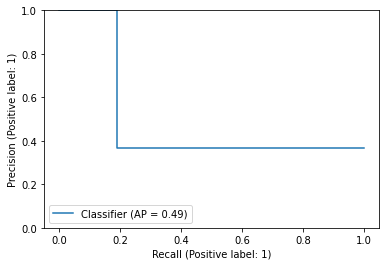

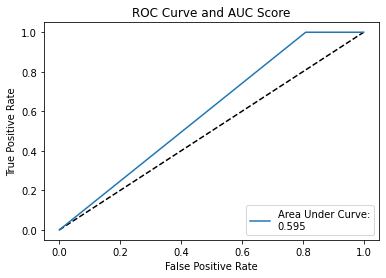

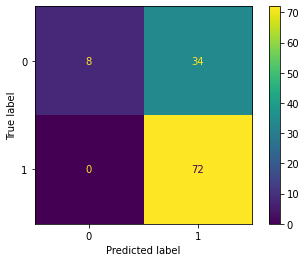

In [ ]:
plt.figure(figsize = (30,10))
#Plot precision recall graph
plot_precision_recall(y_test_inv, top_parameter_knn_pca_pred_inv)
#Plot ROC and AUC Curve
plot_roc_and_print_auc(y_test_np, top_parameter_knn_pca_pred)
#Plot confusion matrix
plot_confusion_matrix(y_test_np, top_parameter_knn_pca_pred)

In [ ]:
improved_knn_cv_pca_predictions = cross_val_predict(KNeighborsClassifier(n_neighbors=5, p=2, 
                                                                     weights= 'uniform', 
                                                                     algorithm='auto'),
                                                                     X_all,
                                                                     y_all,
                                                                     cv = 10)


## 3.5) Naive Bayes

A Naive Bayes classifier is a probablistic model that is used in classification problems. The crux of the classifier is based on the Bayes Theorem.


In [ ]:
scale = StandardScaler()
scale.fit(X_train_np)

#Tranforming Both X_test and X_train
X_train = scale.transform(X_train_np)
X_test = scale.transform(X_test_np)

### 3.5.1) Modeling using Scaled Daata (Without PCA)

In [ ]:
clf = GaussianNB()
clf.fit(X_train_np, y_train_np)
clf.score(X_train_np, y_train_np)

0.9582417582417583

In [ ]:
gnb_pred = clf.predict(X_test_np)
gnb_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1])

In [ ]:
pred_prob = clf.predict_proba(X_test_np)
pred_prob[0]

array([9.99999978e-01, 2.22472021e-08])

In [ ]:
accuracy_score(y_test_np, gnb_pred) # No Overfitting since test score is slightly higher than training score

0.9473684210526315

In [ ]:
#Using K-fold Cross validation on model (k=10)
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X_all, y_all, cv=10, scoring='accuracy').mean())

0.9507832080200501


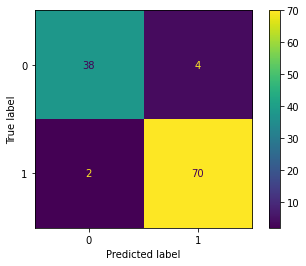

In [ ]:
plot_confusion_matrix(y_test_np, gnb_pred)

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_np, y_train_np)
print(nbModel_grid.best_estimator_)
y_pred = nbModel_grid.predict(X_test_np)
print(y_pred)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0001873817422860383)
[0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1]


In [ ]:
y_pred = nbModel_grid.predict(X_test_np)
print(y_pred)

[0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1]


In [ ]:
print(confusion_matrix(y_test_np, y_pred), ": is the confusion matrix")
print(accuracy_score(y_test_np, y_pred), ": is the accuracy score")
print(precision_score(y_test_np, y_pred), ": is the precision score")
print(recall_score(y_test_np, y_pred), ": is the recall score")
print(f1_score(y_test_np, y_pred), ": is the f1 score")

[[38  4]
 [ 2 70]] : is the confusion matrix
0.9473684210526315 : is the accuracy score
0.9459459459459459 : is the precision score
0.9722222222222222 : is the recall score
0.9589041095890412 : is the f1 score


In [ ]:
pred_df = pd.DataFrame(gnb_pred, columns=['target'])
type(y_train_np)
y_train_df = pd.DataFrame(y_train, columns=['target'])
#y_train_df = y_train.to_frame()
type(y_train_df)

pandas.core.frame.DataFrame

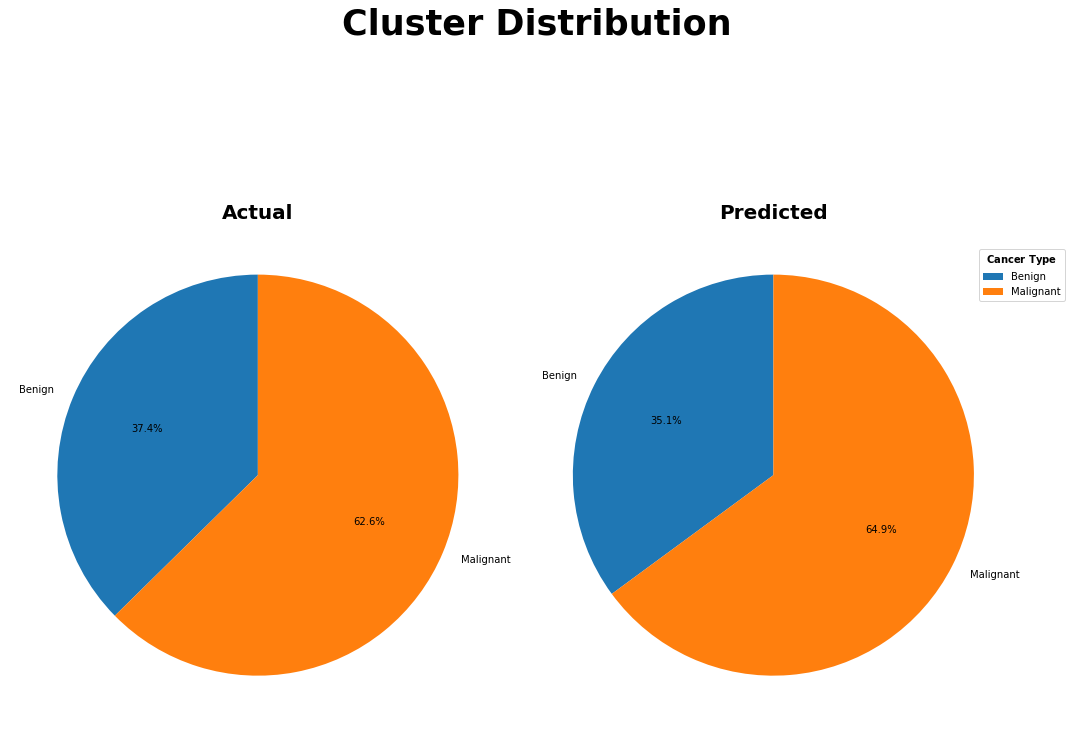

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(15,10))
fig.suptitle("Cluster Distribution", fontsize=35, fontweight='bold', y=1.15) # y value to place sup title slightly outside the figure.

ax1.pie(y_train_df.groupby(['target']).size(), labels=['Benign','Malignant'], autopct='%1.1f%%', startangle=90)
ax1.set_title("Actual", fontsize=20, fontweight='bold')

ax2.pie(pred_df.groupby(['target']).size(), labels=['Benign','Malignant'], autopct='%1.1f%%', startangle=90)
ax2.set_title("Predicted", fontsize=20, fontweight='bold')
ax2.legend(loc='center left', bbox_to_anchor=(0.9, 0.9), title="$\\bf{Cancer \ Type}$")

fig.show()

#### 3.5.1.1) Hyperperameter Tuning with Scaled data

In [ ]:
# hyperparameter tuning
#Create a dataframe for storing scores and parameters for Gaussian Mixture Model (https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
gaussian_nb_classification_hyperparameter_tuning_df = pd.DataFrame({'var_smoothing': [],
                                                             'Homogeneity Score': [],
                                                             'Completeness Score': [],
                                                             'V_measure Score': [],
                                                             'Accuracy Score': [],
                                                             'Balanced Accuracy Score': [],
                                                             'F1 Score': [],
                                                             'Adjusted_rand_score': [],
                                                             'Silhouette Score': [],
                                                             'Calinski-Harabasz Score': [],
                                                             'David-Bouldin Score': []})

In [ ]:
for var_smoothing in np.logspace(0,-9, num=100):
  model = GaussianNB(var_smoothing = var_smoothing)
  model.fit(X_train_np, y_train_np)
  test_pred = model.predict(X_test_np)
  #train_pred = model.predict(X_train_np)
  training_prediction_score = accuracy_score(y_test_np, test_pred)
  h, c, v, acc_score, bal_acc_score, score_f1 = classification_performance_evaluation(y_test, test_pred, print_output = False)
  gaussian_nb_classification_hyperparameter_tuning_df = \
      gaussian_nb_classification_hyperparameter_tuning_df.append({'var_smoothing': var_smoothing,
                                                              'Homogeneity Score': h,
                                                              'Completeness Score': c,
                                                              'V_measure Score': v,
                                                              'Accuracy Score': acc_score,
                                                              'Balanced Accuracy Score': bal_acc_score,
                                                              'F1 Score': f1
                                                              }, ignore_index = True)

In [ ]:
gaussian_nb_classification_hyperparameter_tuning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)

,var_smoothing,Homogeneity Score,Completeness Score,V_measure Score,Accuracy Score,Balanced Accuracy Score,F1 Score,Adjusted_rand_score,Silhouette Score,Calinski-Harabasz Score,David-Bouldin Score
0,1.519911e-01,0.791127,0.817969,0.804324,0.964912,0.952381,0.971429,NaN,NaN,NaN,NaN
1,3.511192e-02,0.729865,0.747688,0.738669,0.956140,0.945437,0.971429,NaN,NaN,NaN,NaN
2,1.000000e-01,0.729865,0.747688,0.738669,0.956140,0.945437,0.971429,NaN,NaN,NaN,NaN
3,1.873817e-02,0.729865,0.747688,0.738669,0.956140,0.945437,0.971429,NaN,NaN,NaN,NaN
4,2.310130e-02,0.729865,0.747688,0.738669,0.956140,0.945437,0.971429,NaN,NaN,NaN,NaN
5,2.848036e-02,0.729865,0.747688,0.738669,0.956140,0.945437,0.971429,NaN,NaN,NaN,NaN
6,4.328761e-02,0.729865,0.747688,0.738669,0.956140,0.945437,0.971429,NaN,NaN,NaN,NaN
7,5.336699e-02,0.729865,0.747688,0.738669,0.956140,0.945437,0.971429,NaN,NaN,NaN,NaN
8,6.579332e-02,0.729865,0.747688,0.738669,0.956140,0.945437,0.971429,NaN,NaN,NaN,NaN
9,8.111308e-02,0.729865,0.747688,0.738669,0.956140,0.945437,0.971429,NaN,NaN,NaN,NaN


In [ ]:
gaussian_nb_parameter = gaussian_nb_classification_hyperparameter_tuning_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)

In [ ]:
gaussian_nb_parameter.iloc[0,:1]

var_smoothing    0.151991
Name: 0, dtype: float64

In [ ]:
hyper_model_gaussian_nb = GaussianNB(var_smoothing=0.035112)
hyper_model_gaussian_nb.fit(X_train_np, y_train_np)
top_param_gaussian_nb_pred = hyper_model_gaussian_nb.predict(X_test_np)

In [ ]:
hyper_model_gaussian_nb.score(X_test_np, y_test_np)

0.956140350877193

In [ ]:
print(cross_val_score(hyper_model_gaussian_nb, X_all, y_all, cv=10, scoring='accuracy').mean())

0.950814536340852


In [ ]:
y_test_inv = 1 - y_test_np
top_param_gaussian_nb_pred_inv = 1- top_param_gaussian_nb_pred

<Figure size 2160x720 with 0 Axes>

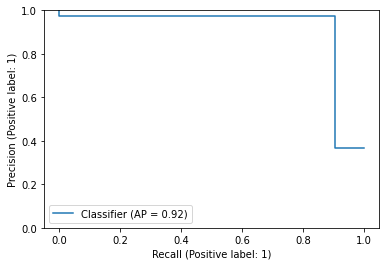

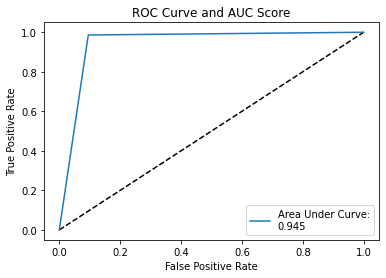

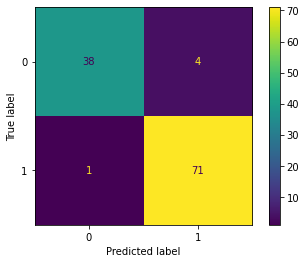

In [ ]:

fig = plt.figure(figsize = (30,10))
#Plot precision recall graph
plot_precision_recall(y_test_inv, top_param_gaussian_nb_pred_inv)
#Plot ROC and AUC Curve
plot_roc_and_print_auc(y_test_np, top_param_gaussian_nb_pred)
#Plot confusion matrix
plot_confusion_matrix(y_test_np, top_param_gaussian_nb_pred)
fig.show()

In [ ]:
improved_gnb_cv_predictions = cross_val_predict(GaussianNB(var_smoothing=0.035112),
                                                                     X_all,
                                                                     y_all,
                                                                     cv = 10)


### 3.5.2) Modeling with PCA data

In [ ]:
# Predictions with PCA data.
pca = PCA()
pca.fit(X_train_np)

#Transforming both X_train and X_test with PCA
X_pca_train = pca.transform(X_train_np)
X_pca_test = pca.transform(X_test_np)

hyper_model_gaussian_pca_nb = GaussianNB(var_smoothing=1.0)
hyper_model_gaussian_pca_nb.fit(X_pca_train, y_train_np)
top_param_gaussian_nb_pca_pred = hyper_model_gaussian_pca_nb.predict(X_pca_test)

#### 3.5.2.1) Hyperperameter Tuning with PCA data

In [ ]:
# hyperparameter tuning with PCA
gaussian_nb_classification_hyperparameter_tuning_pca_df = pd.DataFrame({'var_smoothing': [],
                                                             'Homogeneity Score': [],
                                                             'Completeness Score': [],
                                                             'V_measure Score': [],
                                                             'Accuracy Score': [],
                                                             'Balanced Accuracy Score': [],
                                                             'F1 Score': [],
                                                             'Adjusted_rand_score': [],
                                                             'Silhouette Score': [],
                                                             'Calinski-Harabasz Score': [],
                                                             'David-Bouldin Score': []})

In [ ]:
for var_smoothing in np.logspace(0,-9, num=100):
  model = GaussianNB(var_smoothing = var_smoothing)
  model.fit(X_pca_train, y_train_np)
  test_pred = model.predict(X_pca_test)
  training_prediction_score = accuracy_score(y_test_np, test_pred)
  h, c, v, acc_score, bal_acc_score, score_f1 = classification_performance_evaluation(y_test, test_pred, print_output = False)
  gaussian_nb_classification_hyperparameter_tuning_pca_df = \
      gaussian_nb_classification_hyperparameter_tuning_pca_df.append({'var_smoothing': var_smoothing,
                                                              'Homogeneity Score': h,
                                                              'Completeness Score': c,
                                                              'V_measure Score': v,
                                                              'Accuracy Score': acc_score,
                                                              'Balanced Accuracy Score': bal_acc_score,
                                                              'F1 Score': f1
                                                              }, ignore_index = True)

In [ ]:
gaussian_nb_classification_hyperparameter_tuning_pca_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)

,var_smoothing,Homogeneity Score,Completeness Score,V_measure Score,Accuracy Score,Balanced Accuracy Score,F1 Score,Adjusted_rand_score,Silhouette Score,Calinski-Harabasz Score,David-Bouldin Score
0,1.873817e-02,0.625174,0.659713,0.641979,0.929825,0.909722,0.971429,NaN,NaN,NaN,NaN
1,2.310130e-02,0.625174,0.659713,0.641979,0.929825,0.909722,0.971429,NaN,NaN,NaN,NaN
2,2.848036e-02,0.625174,0.659713,0.641979,0.929825,0.909722,0.971429,NaN,NaN,NaN,NaN
3,3.511192e-02,0.625174,0.659713,0.641979,0.929825,0.909722,0.971429,NaN,NaN,NaN,NaN
4,1.519911e-02,0.594246,0.634155,0.613552,0.921053,0.897817,0.971429,NaN,NaN,NaN,NaN
5,4.328761e-02,0.594246,0.634155,0.613552,0.921053,0.897817,0.971429,NaN,NaN,NaN,NaN
6,5.336699e-02,0.594246,0.634155,0.613552,0.921053,0.897817,0.971429,NaN,NaN,NaN,NaN
7,1.232847e-02,0.594246,0.634155,0.613552,0.921053,0.897817,0.971429,NaN,NaN,NaN,NaN
8,1.000000e-02,0.536745,0.587086,0.560788,0.903509,0.874008,0.971429,NaN,NaN,NaN,NaN
9,8.111308e-03,0.536745,0.587086,0.560788,0.903509,0.874008,0.971429,NaN,NaN,NaN,NaN


In [ ]:
gaussian_nb_pca_parameter = gaussian_nb_classification_hyperparameter_tuning_pca_df.sort_values(by = 'Accuracy Score', ascending = False)[:30].reset_index(drop=True)

In [ ]:
top_param_gnb_pca = gaussian_nb_pca_parameter.iloc[0,:1]

In [ ]:
hyper_model_gaussian_nb_pca = GaussianNB(var_smoothing=top_param_gnb_pca)
hyper_model_gaussian_nb_pca.fit(X_pca_train, y_train_np)
top_param_gaussian_nb_pca_pred = hyper_model_gaussian_nb.predict(X_pca_test)

In [ ]:
hyper_model_gaussian_nb_pca.score(X_pca_test, y_test_np)

0.9298245614035088

In [ ]:
print(cross_val_score(hyper_model_gaussian_nb_pca, X_all, y_all, cv=10, scoring='accuracy').mean())

0.9543233082706767


In [ ]:
y_pca_test_inv = 1 - y_test_np
top_param_gaussian_nb_pca_pred_inv = 1- top_param_gaussian_nb_pca_pred

<Figure size 2160x720 with 0 Axes>

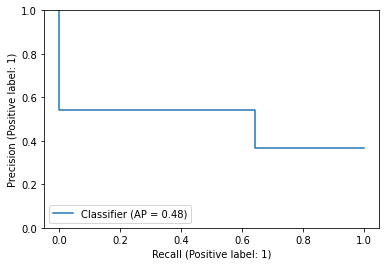

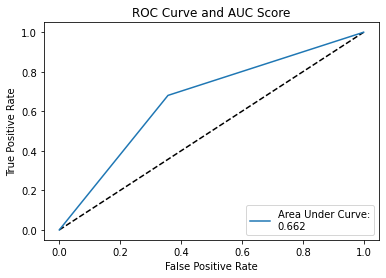

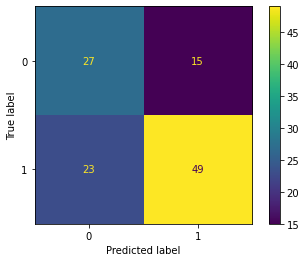

In [ ]:
fig = plt.figure(figsize = (30,10))
#Plot precision recall graph
plot_precision_recall(y_pca_test_inv, top_param_gaussian_nb_pca_pred_inv)
#Plot ROC and AUC Curve
plot_roc_and_print_auc(y_test_np, top_param_gaussian_nb_pca_pred)
#Plot confusion matrix
plot_confusion_matrix(y_test_np, top_param_gaussian_nb_pca_pred)
fig.show()

In [ ]:
improved_gnb_pca_cv_predictions = cross_val_predict(GaussianNB(var_smoothing=top_param_gnb_pca),
                                                                     X_all,
                                                                     y_all,
                                                                     cv = 10)


##3.6) Support Vector Machines (LinearSVC)

The scikitlearn library provides the support Support vector machines in different formats. LinearSVC and SVC are two versions of the same algorithm. While the SVC version accepts different kernels to be used to project data points to a higher dimension, the LinearSVC version of the algorithm only uses the linear kernel. The two models also utlize different libraries under the hood. Therefore both versions will be tested to identify the version that provides the better classification.

### 3.6.1)LinearSVC without PCA

In [ ]:
#Parameter ranges for Support Vector Machines
#Increasing gamma and c exponentially is a commonly recommended method (Hsu, Chang and Lin, 2016).
c_range = [2**-5,2**-3,2**-1,2**1,2**3,2**5,2**7,2**9,2**11]
gamma_range = [2**-15,2**-13,2**-11,2**-9,2**-7,2**-5,2**-3,2**-1,2**1,2**3]

Running LinearSVC with default parameter settings.

In [ ]:
'''
parameter dual is set to False because as per scikit documentation,
it is the preffered option if the number of samples is greater than the 
number of features.
''' 
lin_svc = LinearSVC(dual=False)
lin_svc.fit(X_train_np,y_train_np)
lin_svc_pred = lin_svc.predict(X_test_np)
print('Accuracy score- ',accuracy_score(y_test_np,lin_svc_pred))
print('balanced Accuracy score- ',balanced_accuracy_score(y_test_np,lin_svc_pred))
print('f1_score- ',f1_score(y_test_np,lin_svc_pred))
print('ROC AUC- ',roc_auc_score(y_test_np,lin_svc_pred))

Accuracy score-  0.9736842105263158
balanced Accuracy score-  0.9692460317460317
f1_score-  0.9793103448275863
ROC AUC-  0.9692460317460316


In [ ]:
default_c = lin_svc.get_params()['C']
print(f'The C value for default setting is {default_c}')

The C value for default setting is 1.0


####3.6.1.1)LinearSVC (without PCA) Hyperparameter tuning

Hyperparameter tuning is conducted for the C parameter within the range suggested by Hsu, Chang and Lin, 2016.

In [ ]:
performance_score_dict = {'c':[],'accuracy':[],'balanced_accuracy':[],'f1_score':[],'roc_auc':[],'iter':[]}

for c in c_range:
  lin_svc = LinearSVC(C=c,dual=False)
  lin_svc.fit(X_train_np,y_train_np)
  lin_svc_pred = lin_svc.predict(X_test_np)
  accuracy_score(lin_svc_pred,y_test_np)
  performance_score_dict['c'].append(c)
  performance_score_dict['accuracy'].append(accuracy_score(lin_svc_pred,y_test_np))
  performance_score_dict['balanced_accuracy'].append(balanced_accuracy_score(lin_svc_pred,y_test_np))
  performance_score_dict['f1_score'].append(f1_score(lin_svc_pred,y_test_np))
  performance_score_dict['roc_auc'].append(roc_auc_score(lin_svc_pred,y_test_np))
  performance_score_dict['iter'].append(lin_svc.n_iter_)
linsvc_results = np.concatenate((np.array(performance_score_dict['c']).reshape((-1,1)),np.array(performance_score_dict['accuracy']).reshape((-1,1)),
                     np.array(performance_score_dict['balanced_accuracy']).reshape((-1,1)),
                     np.array(performance_score_dict['f1_score']).reshape((-1,1)),
                     np.array(performance_score_dict['roc_auc']).reshape((-1,1)).reshape((-1,1)),np.array(performance_score_dict['iter']).reshape((-1,1))),axis=1)

In [ ]:
#Tabulating to visualize results
linsvc_df =pd.DataFrame(performance_score_dict)
linsvc_df

,c,accuracy,balanced_accuracy,f1_score,roc_auc,iter
0,0.03125,0.973684,0.980000,0.979592,0.980000,8
1,0.12500,0.964912,0.967230,0.972603,0.967230,9
2,0.50000,0.973684,0.974106,0.979310,0.974106,17
3,2.00000,0.973684,0.974106,0.979310,0.974106,27
4,8.00000,0.973684,0.974106,0.979310,0.974106,85
5,32.00000,0.982456,0.986486,0.986301,0.986486,289
6,128.00000,0.982456,0.986486,0.986301,0.986486,426
7,512.00000,0.982456,0.986486,0.986301,0.986486,312
8,2048.00000,0.982456,0.986486,0.986301,0.986486,466


In [ ]:
#Filtering to identify the best performance
c_arr = linsvc_results[:,0]
acc_arr = linsvc_results[:,1]
bal_acc_arr = linsvc_results[:,2]
f1_arr = linsvc_results[:,3]
roc_auc_arr = linsvc_results[:,4]
iter_arr = linsvc_results[:,5]

best_acc_score = max(linsvc_results[:,1])
best_c_for_acc = linsvc_results[np.where(linsvc_results[:,1]==best_acc_score)][0][0]

best_bal_acc_score = max(linsvc_results[:,2])
best_c_for_bal_acc = linsvc_results[np.where(linsvc_results[:,2]==best_bal_acc_score)][0][0]

best_f1_score = max(linsvc_results[:,3])
best_c_f1_score = linsvc_results[np.where(linsvc_results[:,3]==best_f1_score)][0][0]

best_roc_auc_score = max(linsvc_results[:,4])
best_c_roc_auc_score = linsvc_results[np.where(linsvc_results[:,4]==best_roc_auc_score)][0][0]

In [ ]:
print(f'the c value that gave the highest accuracy({round(best_acc_score,2)}) for linearSVC is {best_c_for_acc}')
print(f'the c value that gave the highest balanced({round(best_bal_acc_score,2)}) accuracy for linearSVC is {best_c_for_bal_acc}')
print(f'the c value that gave the highest f1 score({round(best_f1_score,2)}) for linearSVC is {best_c_f1_score}')
print(f'the c value that gave the highest ROC AUC({round(best_roc_auc_score,2)}) for linearSVC is {best_c_roc_auc_score}')

the c value that gave the highest accuracy(0.98) for linearSVC is 32.0
the c value that gave the highest balanced(0.99) accuracy for linearSVC is 32.0
the c value that gave the highest f1 score(0.99) for linearSVC is 32.0
the c value that gave the highest ROC AUC(0.99) for linearSVC is 32.0


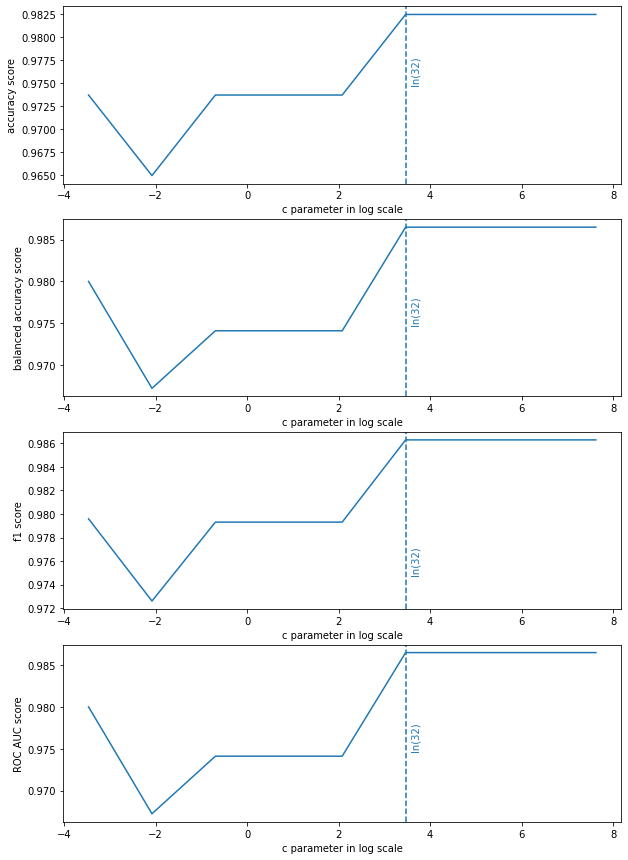

In [ ]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(10,15))
y_labels = ['accuracy score','balanced accuracy score','f1 score','ROC AUC score']


for i in range(4):
    if i ==0:
      plot_y = acc_arr
    elif i==1:
      plot_y = bal_acc_arr
    elif i==2:
      plot_y = f1_arr
    elif i ==3:
      plot_y = roc_auc_arr
    ax[i].plot(np.log(c_arr),plot_y)
    ax[i].set_xlabel('c parameter in log scale')
    ax[i].set_ylabel(y_labels[i]) 
    ax[i].axvline(np.log(32), linestyle = 'dashed')
    ax[i].text(np.log(32)+0.1, 0.975, s = f'ln(32)', rotation = 90, c = '#1f77b4' )


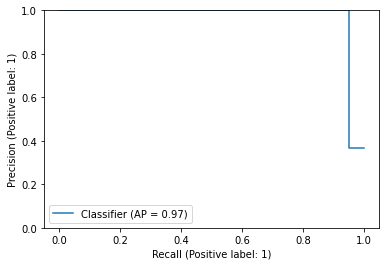

In [ ]:
#running the Tuned SVC with the best C value
lin_svc = LinearSVC(C =best_c_for_acc,dual=False)
lin_svc.fit(X_train_np,y_train_np)
lin_svc_pred = lin_svc.predict(X_test_np)

#change ones to zeros and zeros to ones so one will represent Malignant.
y_test_inverted = 1 - y_test_np
b = 1 - lin_svc_pred

plot_precision_recall(y_test_inverted, b)

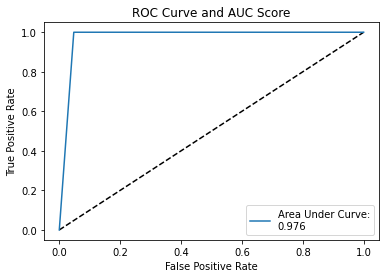

In [ ]:
plot_roc_and_print_auc(y_test_np, lin_svc_pred)

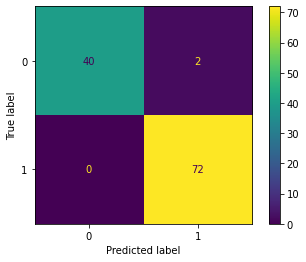

In [ ]:
plot_confusion_matrix(y_test_np, lin_svc_pred)

In [ ]:
improved_lsvc_cv_predictions = cross_val_predict(LinearSVC(C =best_c_for_acc,dual=False),
                                                                     X_all,
                                                                     y_all,
                                                                     cv = 10)


####3.6.1.2) Cross Validation

Cross validation is done over 10 folds using the C paramater value that provided the best accucary during hyper parameter tuning.

In [ ]:
kf_acc_score = []
kf_bal_acc_score = []
kf_f1_score = []
kf_roc_auc_score = []

X_svc = X.to_numpy()
y_svc = y.to_numpy()

for i, [train_ind, test_ind] in enumerate(kf.split(X_svc,y_svc)):
  train_x = X_svc[train_ind]
  test_x = X_svc[test_ind]
  train_y = y_svc[train_ind]
  test_y = y_svc[test_ind]

  kf_lin_svc = LinearSVC(C =best_c_for_acc,dual=False)
  kf_lin_svc.fit(train_x,train_y)
  kf_lin_pred = kf_lin_svc.predict(test_x)
  kf_acc_score.append(accuracy_score(test_y,kf_lin_pred))
  kf_bal_acc_score.append(balanced_accuracy_score(test_y,kf_lin_pred))
  kf_f1_score.append(f1_score(test_y,kf_lin_pred))
  kf_roc_auc_score.append(roc_auc_score(test_y,kf_lin_pred))

avg_acc = np.mean(kf_acc_score)
avg_bal_acc = np.mean(kf_bal_acc_score)
avg_f1 = np.mean(kf_f1_score)
avg_roc = np.mean(kf_roc_auc_score)

#Tabulating the Scores for Cross Validation
kf_df = pd.DataFrame([avg_acc,avg_bal_acc,avg_f1,avg_roc],index=['Accuracy score','Balanced accuracy score','F1 score','ROC AUC Score'],columns=['Scores'])
kf_df

,Scores
Accuracy score,0.949029
Balanced accuracy score,0.946898
F1 score,0.958348
ROC AUC Score,0.946898


###3.6.2)LinearSVC with PCA

In [ ]:
#running LinearSVC using its defualt setting based on data reduced by PCA
pca_lin_svc = LinearSVC(dual=False)
pca_lin_svc.fit(X_train_pca,y_train_np)
pca_lin_svc_pred = pca_lin_svc.predict(X_test_pca)
print('Accuracy score- ',accuracy_score(y_test_np,pca_lin_svc_pred))
print('balanced Accuracy score- ',balanced_accuracy_score(y_test_np,pca_lin_svc_pred))
print('f1_score- ',f1_score(y_test_np,pca_lin_svc_pred))
print('ROC AUC- ',roc_auc_score(y_test_np,pca_lin_svc_pred))

Accuracy score-  0.9736842105263158
balanced Accuracy score-  0.9692460317460317
f1_score-  0.9793103448275863
ROC AUC-  0.9692460317460316


In [ ]:
default_c = pca_lin_svc.get_params()['C']
print(f'The C value for default setting is {default_c}')

The C value for default setting is 1.0


####3.6.2.1)LinearSVC (after PCA) Hyperparameter tuning

Hyperparameter tuning is done for PCA reduced data to identify the best c parameter value.

In [ ]:
performance_score_dict = {'c':[],'accuracy':[],'balanced_accuracy':[],'f1_score':[],'roc_auc':[],'iter':[]}

for c in c_range:
  pca_lin_svc = LinearSVC(C=c,dual=False)
  pca_lin_svc.fit(X_train_pca,y_train_np)
  pca_lin_svc_pred = pca_lin_svc.predict(X_test_pca) 
  performance_score_dict['c'].append(c)
  performance_score_dict['accuracy'].append(accuracy_score(pca_lin_svc_pred,y_test_np))
  performance_score_dict['balanced_accuracy'].append(balanced_accuracy_score(pca_lin_svc_pred,y_test_np))
  performance_score_dict['f1_score'].append(f1_score(pca_lin_svc_pred,y_test_np))
  performance_score_dict['roc_auc'].append(roc_auc_score(pca_lin_svc_pred,y_test_np))
  performance_score_dict['iter'].append(pca_lin_svc.n_iter_)

In [ ]:
pca_linsvc_results = np.concatenate((np.array(performance_score_dict['c']).reshape((-1,1)),np.array(performance_score_dict['accuracy']).reshape((-1,1)),
                     np.array(performance_score_dict['balanced_accuracy']).reshape((-1,1)),
                     np.array(performance_score_dict['f1_score']).reshape((-1,1)),
                     np.array(performance_score_dict['roc_auc']).reshape((-1,1)).reshape((-1,1)),np.array(performance_score_dict['iter']).reshape((-1,1))),axis=1)

In [ ]:
#Tabulating to visualize results
pca_linsvc_df =pd.DataFrame(performance_score_dict)
pca_linsvc_df

,c,accuracy,balanced_accuracy,f1_score,roc_auc,iter
0,0.03125,0.973684,0.980000,0.979592,0.980000,8
1,0.12500,0.964912,0.967230,0.972603,0.967230,8
2,0.50000,0.973684,0.974106,0.979310,0.974106,10
3,2.00000,0.973684,0.974106,0.979310,0.974106,24
4,8.00000,0.973684,0.974106,0.979310,0.974106,55
5,32.00000,0.982456,0.986486,0.986301,0.986486,370
6,128.00000,0.982456,0.986486,0.986301,0.986486,522
7,512.00000,0.982456,0.986486,0.986301,0.986486,574
8,2048.00000,0.982456,0.986486,0.986301,0.986486,536


In [ ]:
#Filtering results to identify the best scores and parameter values.
pca_c_arr = pca_linsvc_results[:,0]
pca_acc_arr = pca_linsvc_results[:,1]
pca_bal_acc_arr = pca_linsvc_results[:,2]
pca_f1_arr = pca_linsvc_results[:,3]
pca_roc_auc_arr = pca_linsvc_results[:,4]
pca_iter_arr = pca_linsvc_results[:,5]

pca_best_acc_score = max(pca_linsvc_results[:,1])
pca_best_c_for_acc = linsvc_results[np.where(pca_linsvc_results[:,1]==pca_best_acc_score)][0][0]

pca_best_bal_acc_score = max(pca_linsvc_results[:,2])
pca_best_c_for_bal_acc = linsvc_results[np.where(pca_linsvc_results[:,2]==pca_best_bal_acc_score)][0][0]

pca_best_f1_score = max(pca_linsvc_results[:,3])
pca_best_c_f1_score = pca_linsvc_results[np.where(pca_linsvc_results[:,3]==pca_best_f1_score)][0][0]

pca_best_roc_auc_score = max(pca_linsvc_results[:,4])
pca_best_c_roc_auc_score = pca_linsvc_results[np.where(pca_linsvc_results[:,4]==pca_best_roc_auc_score)][0][0]

In [ ]:
print(f'the c value that gave the highest accuracy({round(pca_best_acc_score,2)}) for linearSVC is {pca_best_c_for_acc}')
print(f'the c value that gave the highest balanced({round(pca_best_bal_acc_score,2)}) accuracy for linearSVC is {pca_best_c_for_bal_acc}')
print(f'the c value that gave the highest f1 score({round(pca_best_f1_score,2)}) for linearSVC is {pca_best_c_f1_score}')
print(f'the c value that gave the highest ROC AUC({round(pca_best_roc_auc_score,2)}) for linearSVC is {pca_best_c_roc_auc_score}')

the c value that gave the highest accuracy(0.98) for linearSVC is 32.0
the c value that gave the highest balanced(0.99) accuracy for linearSVC is 32.0
the c value that gave the highest f1 score(0.99) for linearSVC is 32.0
the c value that gave the highest ROC AUC(0.99) for linearSVC is 32.0


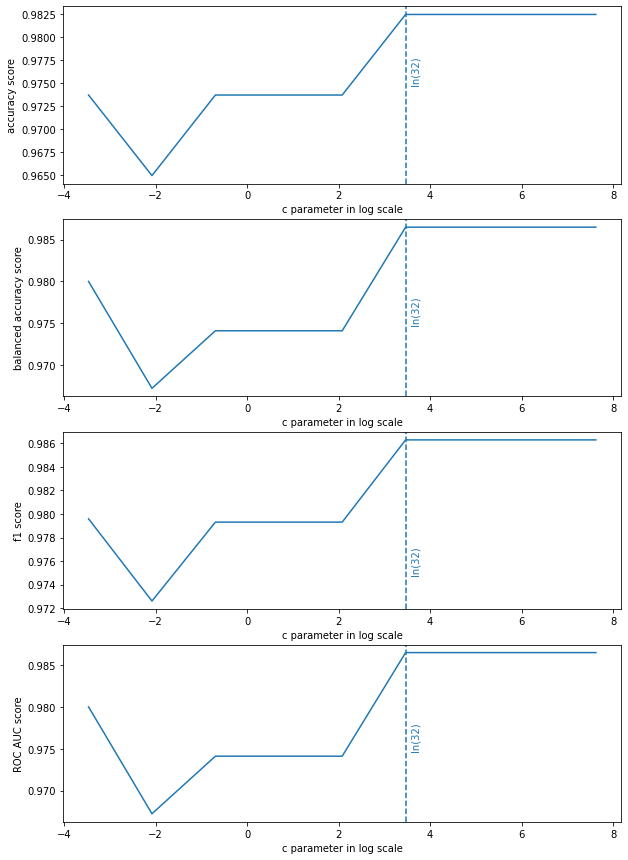

In [ ]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(10,15))
y_labels = ['accuracy score','balanced accuracy score','f1 score','ROC AUC score']


for i in range(4):
    if i ==0:
      plot_y = pca_acc_arr
    elif i==1:
      plot_y = pca_bal_acc_arr
    elif i==2:
      plot_y = pca_f1_arr
    elif i ==3:
      plot_y = pca_roc_auc_arr
    ax[i].plot(np.log(c_arr),plot_y)
    ax[i].set_xlabel('c parameter in log scale')
    ax[i].set_ylabel(y_labels[i])
    ax[i].axvline(np.log(32), linestyle = 'dashed')
    ax[i].text(np.log(32)+0.1, 0.975, s = f'ln(32)', rotation = 90, c = '#1f77b4' )


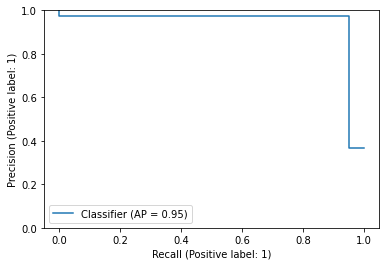

In [ ]:
#running the Tuned SVC with the best C value
pca_lin_svc = LinearSVC(C =pca_best_acc_score,dual=False)
pca_lin_svc.fit(X_train_pca,y_train_np)
pca_lin_svc_pred = pca_lin_svc.predict(X_test_pca)

#change ones to zeros and zeros to ones so one will represent Malignant.
y_test_inverted = 1 - y_test_np
b = 1 - pca_lin_svc_pred

plot_precision_recall(y_test_inverted, b)

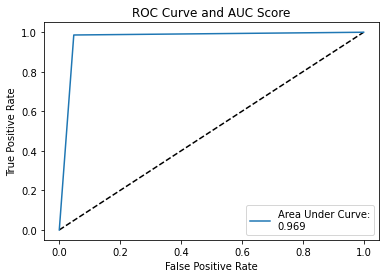

In [ ]:
plot_roc_and_print_auc(y_test_np, pca_lin_svc_pred)

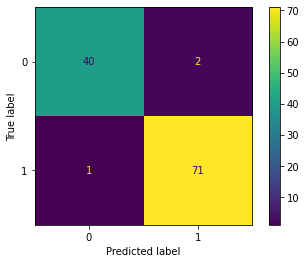

In [ ]:
plot_confusion_matrix(y_test_np, pca_lin_svc_pred)

In [ ]:
improved_lsvc_cv_pca_predictions = cross_val_predict(LinearSVC(C =pca_best_acc_score,dual=False),
                                                                     X_all,
                                                                     y_all,
                                                                     cv = 10)


#### 3.6.2.2) Cross Validation

In [ ]:
pca_kf_acc_score = []
pca_kf_bal_acc_score = []
pca_kf_f1_score = []
pca_kf_roc_auc_score = []

y_svc = y.copy().to_numpy()
X_db = X.to_numpy().copy()
db_pca = PCA()
db_x_red =db_pca.fit_transform(X_db)

for i, [train_ind, test_ind] in enumerate(kf.split(db_x_red,y_svc)):
  train_x = db_x_red[train_ind]
  test_x = db_x_red[test_ind]
  train_y = y_svc[train_ind]
  test_y = y_svc[test_ind]

  pca_kf_lin_svc = LinearSVC(C = pca_best_c_for_acc,dual=False)
  pca_kf_lin_svc.fit(train_x,train_y)
  pca_kf_lin_pred = pca_kf_lin_svc.predict(test_x)
  pca_kf_acc_score.append(accuracy_score(test_y,pca_kf_lin_pred))
  pca_kf_bal_acc_score.append(balanced_accuracy_score(test_y,pca_kf_lin_pred))
  pca_kf_f1_score.append(f1_score(test_y,pca_kf_lin_pred))
  pca_kf_roc_auc_score.append(roc_auc_score(test_y,pca_kf_lin_pred))

pca_kf_avg_acc = np.mean(kf_acc_score)
pca_kf_avg_bal_acc = np.mean(kf_bal_acc_score)
pca_kf_avg_f1 = np.mean(kf_f1_score)
pca_kf_avg_roc = np.mean(kf_roc_auc_score)

kf_df = pd.DataFrame([pca_kf_avg_acc,pca_kf_avg_bal_acc,pca_kf_avg_f1,pca_kf_avg_roc],index=['Accuracy score','Balanced accuracy score','F1 score','ROC AUC Score'],columns=['Scores'])
kf_df

,Scores
Accuracy score,0.949029
Balanced accuracy score,0.946898
F1 score,0.958348
ROC AUC Score,0.946898


In [ ]:
#Comparison with and without PCA
comparison_df = pd.DataFrame({'Linear SVC with PCA':[avg_acc,avg_bal_acc,avg_f1,avg_roc],
                              'LinearSVC without PCA':[pca_kf_avg_acc,
pca_kf_avg_bal_acc,
pca_kf_avg_f1,
pca_kf_avg_roc]},index=['Accuracy','Balanced accuracy','f1 score','roc auc score'])
comparison_df

,Linear SVC with PCA,LinearSVC without PCA
Accuracy,0.949029,0.949029
Balanced accuracy,0.946898,0.946898
f1 score,0.958348,0.958348
roc auc score,0.946898,0.946898


Results for both methodologies give similar results

##3.7) Support Vector Machines (RBF SVC)

###3.7.1) SVC without PCA

SVC algorithm is once again run with data reduced by PCA.

In [ ]:
kernels = ['linear','rbf','sigmoid']
result_dict = {'linear':[],'rbf':[],'sigmoid':[]}


In [ ]:
#Running SVC with default settings
svc = SVC()
svc.fit(X_train_np,y_train_np)
svc_pred = svc.predict(X_test_np)
print('Accuracy score- ',accuracy_score(y_test_np,svc_pred))
print('balanced Accuracy score- ',balanced_accuracy_score(y_test_np,svc_pred))
print('f1_score- ',f1_score(y_test_np,svc_pred))
print('ROC AUC- ',roc_auc_score(y_test_np,svc_pred))

Accuracy score-  0.9649122807017544
balanced Accuracy score-  0.9573412698412699
f1_score-  0.9726027397260274
ROC AUC-  0.9573412698412699


####3.7.1.1)SVC (without PCA) Hyperparameter tuning

hyperparameter tuning is conducted for different kernels to identify the optimum combinations of c parameter and gamma that provides the best classification.

In [ ]:
linear_dict = {'c':[],'gamma':[],'accuracy':[],'balanced_accuracy':[],'f1_score':[],'roc_auc':[]}
rbf_dict = {'c':[],'gamma':[],'accuracy':[],'balanced_accuracy':[],'f1_score':[],'roc_auc':[]}
sigmoid_dict = {'c':[],'gamma':[],'accuracy':[],'balanced_accuracy':[],'f1_score':[],'roc_auc':[]}
for k in kernels:
  for c in c_range:
    for g in gamma_range:
      svc = SVC(C=c,kernel=k,gamma=g)
      svc.fit(X_train_np,y_train_np)
      svc_pred = svc.predict(X_test_np)
      if k == 'linear':
        linear_dict['c'].append(c)
        linear_dict['gamma'].append(g)
        linear_dict['accuracy'].append(accuracy_score(y_test_np,svc_pred))
        linear_dict['balanced_accuracy'].append(balanced_accuracy_score(y_test_np,svc_pred))
        linear_dict['f1_score'].append(f1_score(y_test_np,svc_pred))
        linear_dict['roc_auc'].append(roc_auc_score(y_test_np,svc_pred))
      elif k =='rbf':
        rbf_dict['c'].append(c)
        rbf_dict['gamma'].append(g)
        rbf_dict['accuracy'].append(accuracy_score(y_test_np,svc_pred))
        rbf_dict['balanced_accuracy'].append(balanced_accuracy_score(y_test_np,svc_pred))
        rbf_dict['f1_score'].append(f1_score(y_test_np,svc_pred))
        rbf_dict['roc_auc'].append(roc_auc_score(y_test_np,svc_pred))
      elif k =='sigmoid':
        sigmoid_dict['c'].append(c)
        sigmoid_dict['gamma'].append(c)
        sigmoid_dict['accuracy'].append(accuracy_score(y_test_np,svc_pred))
        sigmoid_dict['balanced_accuracy'].append(balanced_accuracy_score(y_test_np,svc_pred))
        sigmoid_dict['f1_score'].append(f1_score(y_test_np,svc_pred))
        sigmoid_dict['roc_auc'].append(roc_auc_score(y_test_np,svc_pred))

linear_svc_results = np.concatenate((np.array(linear_dict['c']).reshape((-1,1)),np.array(linear_dict['gamma']).reshape((-1,1)),
                     np.array(linear_dict['accuracy']).reshape((-1,1)),
                     np.array(linear_dict['balanced_accuracy']).reshape((-1,1)),
                     np.array(linear_dict['f1_score']).reshape((-1,1)),np.array(linear_dict['roc_auc']).reshape((-1,1))),axis=1)

rbf_svc_results = np.concatenate((np.array(rbf_dict['c']).reshape((-1,1)),np.array(rbf_dict['gamma']).reshape((-1,1)),
                     np.array(rbf_dict['accuracy']).reshape((-1,1)),
                     np.array(rbf_dict['balanced_accuracy']).reshape((-1,1)),
                     np.array(rbf_dict['f1_score']).reshape((-1,1)),np.array(rbf_dict['roc_auc']).reshape((-1,1))),axis=1)

sigmoid_svc_results = np.concatenate((np.array(sigmoid_dict['c']).reshape((-1,1)),np.array(sigmoid_dict['gamma']).reshape((-1,1)),
                     np.array(sigmoid_dict['accuracy']).reshape((-1,1)),
                     np.array(sigmoid_dict['balanced_accuracy']).reshape((-1,1)),
                     np.array(sigmoid_dict['f1_score']).reshape((-1,1)),np.array(sigmoid_dict['roc_auc']).reshape((-1,1))),axis=1)

In [ ]:
#Tabulating results for linear Kernel
linear_df = pd.DataFrame(linear_dict)
linear_df

,c,gamma,accuracy,balanced_accuracy,f1_score,roc_auc
0,0.03125,0.000031,0.973684,0.964286,0.979592,0.964286
1,0.03125,0.000122,0.973684,0.964286,0.979592,0.964286
2,0.03125,0.000488,0.973684,0.964286,0.979592,0.964286
3,0.03125,0.001953,0.973684,0.964286,0.979592,0.964286
4,0.03125,0.007812,0.973684,0.964286,0.979592,0.964286
...,...,...,...,...,...,...
85,2048.00000,0.031250,0.982456,0.976190,0.986301,0.976190
86,2048.00000,0.125000,0.982456,0.976190,0.986301,0.976190
87,2048.00000,0.500000,0.982456,0.976190,0.986301,0.976190
88,2048.00000,2.000000,0.982456,0.976190,0.986301,0.976190


In [ ]:
#Filtering the best scores identified and their respective c and gamma values
c_arr = linear_svc_results[:,0]
gamma_arr = linear_svc_results[:,1]
acc_arr = linear_svc_results[:,2]
bal_acc_arr = linear_svc_results[:,3]
f1_arr = linear_svc_results[:,4]
roc_auc_arr = linear_svc_results[:,5]

best_acc_score = max(linear_svc_results[:,2])
lin_best_c_for_acc = linear_svc_results[np.where(linear_svc_results[:,2]==best_acc_score)][0][0]
lin_best_gamma_for_acc = linear_svc_results[np.where(linear_svc_results[:,2]==best_acc_score)][0][1]

best_bal_acc_score = max(linear_svc_results[:,3])
lin_best_c_for_bal_acc = linear_svc_results[np.where(linear_svc_results[:,3]==best_bal_acc_score)][0][0]
lin_best_gamma_for_bal_acc = linear_svc_results[np.where(linear_svc_results[:,3]==best_bal_acc_score)][0][1]

best_f1_score = max(linear_svc_results[:,4])
lin_best_c_f1_score = linear_svc_results[np.where(linear_svc_results[:,4]==best_f1_score)][0][0]
lin_best_gamma_f1_score = linear_svc_results[np.where(linear_svc_results[:,4]==best_f1_score)][0][1]

best_roc_auc_score = max(linear_svc_results[:,5])
lin_best_c_roc_auc_score = linear_svc_results[np.where(linear_svc_results[:,5]==best_roc_auc_score)][0][0]
lin_best_gamma_roc_auc_score = linear_svc_results[np.where(linear_svc_results[:,5]==best_roc_auc_score)][0][1]

print('Best scores and parameters combinations for Linear Kernels')
print(f'Best Accuracy score detected: {best_acc_score} params used: c - {lin_best_c_for_acc} gamma -{lin_best_gamma_for_acc}')
print(f'Best Balanced Accuracy score detected: {best_bal_acc_score} params used: c - {lin_best_c_for_bal_acc} gamma -{lin_best_gamma_for_bal_acc}')
print(f'Best f1 score detected: {best_f1_score} params used: c - {lin_best_c_f1_score} gamma -{lin_best_gamma_f1_score}')
print(f'Best roc auc score detected: {best_roc_auc_score} params used: c - {lin_best_c_roc_auc_score} gamma -{lin_best_gamma_roc_auc_score}')

Best scores and parameters combinations for Linear Kernels
Best Accuracy score detected: 0.9824561403508771 params used: c - 32.0 gamma -3.0517578125e-05
Best Balanced Accuracy score detected: 0.9761904761904762 params used: c - 32.0 gamma -3.0517578125e-05
Best f1 score detected: 0.9863013698630138 params used: c - 32.0 gamma -3.0517578125e-05
Best roc auc score detected: 0.9761904761904762 params used: c - 32.0 gamma -3.0517578125e-05


In [ ]:
#Tabulating results for rbf kernel
rbf_df = pd.DataFrame(rbf_dict)
rbf_df

,c,gamma,accuracy,balanced_accuracy,f1_score,roc_auc
0,0.03125,0.000031,0.631579,0.500000,0.774194,0.500000
1,0.03125,0.000122,0.631579,0.500000,0.774194,0.500000
2,0.03125,0.000488,0.631579,0.500000,0.774194,0.500000
3,0.03125,0.001953,0.807018,0.738095,0.867470,0.738095
4,0.03125,0.007812,0.929825,0.909722,0.946667,0.909722
...,...,...,...,...,...,...
85,2048.00000,0.031250,0.973684,0.969246,0.979310,0.969246
86,2048.00000,0.125000,0.938596,0.941468,0.950355,0.941468
87,2048.00000,0.500000,0.631579,0.500000,0.774194,0.500000
88,2048.00000,2.000000,0.631579,0.500000,0.774194,0.500000


In [ ]:
#Filtering the best scores identified and their respective c and gamma values
c_arr = rbf_svc_results[:,0]
gamma_arr = rbf_svc_results[:,1]
acc_arr = rbf_svc_results[:,2]
bal_acc_arr = rbf_svc_results[:,3]
f1_arr = rbf_svc_results[:,4]
roc_auc_arr = rbf_svc_results[:,5]

best_acc_score = max(rbf_svc_results[:,2])
rbf_best_c_for_acc = rbf_svc_results[np.where(rbf_svc_results[:,2]==best_acc_score)][0][0]
rbf_best_gamma_for_acc = rbf_svc_results[np.where(rbf_svc_results[:,2]==best_acc_score)][0][1]

best_bal_acc_score = max(rbf_svc_results[:,3])
rbf_best_c_for_bal_acc = rbf_svc_results[np.where(rbf_svc_results[:,3]==best_bal_acc_score)][0][0]
rbf_best_gamma_for_bal_acc = rbf_svc_results[np.where(rbf_svc_results[:,3]==best_bal_acc_score)][0][1]

best_f1_score = max(rbf_svc_results[:,4])
rbf_best_c_f1_score = rbf_svc_results[np.where(rbf_svc_results[:,4]==best_f1_score)][0][0]
rbf_best_gamma_f1_score = rbf_svc_results[np.where(rbf_svc_results[:,4]==best_f1_score)][0][1]

best_roc_auc_score = max(rbf_svc_results[:,5])
rbf_best_c_roc_auc_score = rbf_svc_results[np.where(rbf_svc_results[:,5]==best_roc_auc_score)][0][0]
rbf_best_gamma_roc_auc_score = rbf_svc_results[np.where(rbf_svc_results[:,5]==best_roc_auc_score)][0][1]

print('Best scores and parameters combinations for rbf Kernels')
print(f'Best Accuracy score detected: {best_acc_score} params used: c - {rbf_best_c_for_acc} gamma -{rbf_best_gamma_for_acc}')
print(f'Best Balanced Accuracy score detected: {best_bal_acc_score} params used: c - {rbf_best_c_for_bal_acc} gamma -{rbf_best_gamma_for_bal_acc}')
print(f'Best f1 score detected: {best_f1_score} params used: c - {rbf_best_c_f1_score} gamma -{rbf_best_gamma_f1_score}')
print(f'Best roc auc score detected: {best_roc_auc_score} params used: c - {rbf_best_c_roc_auc_score} gamma -{rbf_best_gamma_roc_auc_score}')

Best scores and parameters combinations for rbf Kernels
Best Accuracy score detected: 0.9824561403508771 params used: c - 128.0 gamma -0.001953125
Best Balanced Accuracy score detected: 0.9761904761904762 params used: c - 128.0 gamma -0.001953125
Best f1 score detected: 0.9863013698630138 params used: c - 128.0 gamma -0.001953125
Best roc auc score detected: 0.9761904761904762 params used: c - 128.0 gamma -0.001953125


In [ ]:
#Tabulating results for sigmoid Kernel
sigmoid_df = pd.DataFrame(sigmoid_dict)
sigmoid_df

,c,gamma,accuracy,balanced_accuracy,f1_score,roc_auc
0,0.03125,0.03125,0.631579,0.500000,0.774194,0.500000
1,0.03125,0.03125,0.631579,0.500000,0.774194,0.500000
2,0.03125,0.03125,0.631579,0.500000,0.774194,0.500000
3,0.03125,0.03125,0.666667,0.547619,0.791209,0.547619
4,0.03125,0.03125,0.929825,0.904762,0.947368,0.904762
...,...,...,...,...,...,...
85,2048.00000,2048.00000,0.912281,0.890873,0.933333,0.890873
86,2048.00000,2048.00000,0.894737,0.872024,0.920000,0.872024
87,2048.00000,2048.00000,0.868421,0.856151,0.896552,0.856151
88,2048.00000,2048.00000,0.877193,0.863095,0.904110,0.863095


In [ ]:
#Filtering the best scores identified and their respective c and gamma values
c_arr = sigmoid_svc_results[:,0]
gamma_arr = sigmoid_svc_results[:,1]
acc_arr = sigmoid_svc_results[:,2]
bal_acc_arr = sigmoid_svc_results[:,3]
f1_arr = sigmoid_svc_results[:,4]
roc_auc_arr = sigmoid_svc_results[:,5]

best_acc_score = max(sigmoid_svc_results[:,2])
sigmoid_best_c_for_acc = sigmoid_svc_results[np.where(sigmoid_svc_results[:,2]==best_acc_score)][0][0]
sigmoid_best_gamma_for_acc = sigmoid_svc_results[np.where(sigmoid_svc_results[:,2]==best_acc_score)][0][1]

best_bal_acc_score = max(sigmoid_svc_results[:,3])
sigmoid_best_c_for_bal_acc = sigmoid_svc_results[np.where(sigmoid_svc_results[:,3]==best_bal_acc_score)][0][0]
sigmoid_best_gamma_for_bal_acc = sigmoid_svc_results[np.where(sigmoid_svc_results[:,3]==best_bal_acc_score)][0][1]

best_f1_score = max(sigmoid_svc_results[:,4])
sigmoid_best_c_f1_score = sigmoid_svc_results[np.where(sigmoid_svc_results[:,4]==best_f1_score)][0][0]
sigmoid_best_gamma_f1_score = sigmoid_svc_results[np.where(sigmoid_svc_results[:,4]==best_f1_score)][0][1]

best_roc_auc_score = max(sigmoid_svc_results[:,5])
sigmoid_best_c_roc_auc_score = sigmoid_svc_results[np.where(sigmoid_svc_results[:,5]==best_roc_auc_score)][0][0]
sigmoid_best_gamma_roc_auc_score = sigmoid_svc_results[np.where(sigmoid_svc_results[:,5]==best_roc_auc_score)][0][1]

print('Best scores and parameters combinations for Sigmoid Kernels')
print(f'Best Accuracy score detected: {best_acc_score} params used: c - {sigmoid_best_c_for_acc} gamma -{sigmoid_best_gamma_for_acc}')
print(f'Best Balanced Accuracy score detected: {best_bal_acc_score} params used: c - {sigmoid_best_c_for_bal_acc} gamma -{sigmoid_best_gamma_for_bal_acc}')
print(f'Best f1 score detected: {best_f1_score} params used: c - {sigmoid_best_c_f1_score} gamma -{sigmoid_best_gamma_f1_score}')
print(f'Best roc auc score detected: {best_roc_auc_score} params used: c - {sigmoid_best_c_roc_auc_score} gamma -{sigmoid_best_gamma_roc_auc_score}')

Best scores and parameters combinations for Sigmoid Kernels
Best Accuracy score detected: 0.9736842105263158 params used: c - 8.0 gamma -8.0
Best Balanced Accuracy score detected: 0.9642857142857143 params used: c - 8.0 gamma -8.0
Best f1 score detected: 0.9795918367346939 params used: c - 8.0 gamma -8.0
Best roc auc score detected: 0.9642857142857143 params used: c - 8.0 gamma -8.0


In [ ]:
#Model with the best performance with rbf kernel
#print(f'Best Accuracy score detected: {best_acc_score} params used: c - {rbf_best_c_for_acc} gamma -{rbf_best_gamma_for_acc}')
non_pca_svc = SVC(C=rbf_best_c_for_acc,kernel='rbf',gamma=rbf_best_gamma_for_acc)
non_pca_svc.fit(X_train_np,y_train_np)
non_svc_pred = non_pca_svc.predict(X_test_np)

#### 3.7.1.2) Cross Validation

In [ ]:
lin_acc_score_dict = []
lin_bal_acc_score_dict = []
lin_f1_score_dict = []
lin_roc_auc_score_dict = []

rbf_acc_score_dict = []
rbf_bal_acc_score_dict = []
rbf_f1_score_dict = []
rbf_roc_auc_score_dict = []

sigmoid_acc_score_dict = []
sigmoid_bal_acc_score_dict = []
sigmoid_f1_score_dict = []
sigmoid_roc_auc_score_dict = []

pca_kf_bal_acc_score = []
pca_kf_f1_score = []
pca_kf_roc_auc_score = []

for i, [train_ind, test_ind] in enumerate(kf.split(X_svc,y_svc)):
  train_x = X_svc[train_ind]
  test_x = X_svc[test_ind]
  train_y = y_svc[train_ind]
  test_y = y_svc[test_ind]

  lin_svc = SVC(C=lin_best_c_for_acc,kernel='linear',gamma=lin_best_gamma_for_acc)
  lin_svc.fit(train_x,train_y)
  a = lin_svc.predict(test_x)
  lin_acc_score_dict.append(accuracy_score(test_y,a))
  lin_bal_acc_score_dict.append(balanced_accuracy_score(test_y,a))
  lin_f1_score_dict.append(f1_score(test_y,a))
  lin_roc_auc_score_dict.append(roc_auc_score(test_y,a))

  rbf_svc = SVC(C=rbf_best_c_for_acc,kernel='rbf',gamma=rbf_best_gamma_for_acc)
  rbf_svc.fit(train_x,train_y)
  a = rbf_svc.predict(test_x)
  rbf_acc_score_dict.append(accuracy_score(test_y,a))
  rbf_bal_acc_score_dict.append(balanced_accuracy_score(test_y,a))
  rbf_f1_score_dict.append(f1_score(test_y,a))
  rbf_roc_auc_score_dict.append(roc_auc_score(test_y,a))


  sig_svc = SVC(C=sigmoid_best_c_for_acc,kernel='sigmoid',gamma=sigmoid_best_gamma_for_acc)
  sig_svc.fit(train_x,train_y)
  a = sig_svc.predict(test_x)
  sigmoid_acc_score_dict.append(accuracy_score(test_y,a))
  sigmoid_bal_acc_score_dict.append(balanced_accuracy_score(test_y,a))
  sigmoid_f1_score_dict.append(f1_score(test_y,a))
  sigmoid_roc_auc_score_dict.append(roc_auc_score(test_y,a))

lin_avg_acc = np.mean(lin_acc_score_dict)
lin_avg_bal_acc = np.mean(lin_bal_acc_score_dict)
lin_avg_f1 = np.mean(lin_f1_score_dict)
lin_avg_roc = np.mean(lin_roc_auc_score_dict)


rbf_avg_acc = np.mean(rbf_acc_score_dict)
rbf_avg_bal_acc = np.mean(rbf_bal_acc_score_dict)
rbf_avg_f1 = np.mean(rbf_f1_score_dict)
rbf_avg_roc = np.mean(rbf_roc_auc_score_dict)

sigmoid_avg_acc = np.mean(sigmoid_acc_score_dict)
sigmoid_avg_bal_acc = np.mean(sigmoid_bal_acc_score_dict)
sigmoid_avg_f1 = np.mean(sigmoid_f1_score_dict)
sigmoid_avg_roc = np.mean(sigmoid_roc_auc_score_dict)

pd.DataFrame({'linear kernel':[lin_avg_acc,
lin_avg_bal_acc,
lin_avg_f1,
lin_avg_roc],'rbf kernel':[rbf_avg_acc,
rbf_avg_bal_acc,
rbf_avg_f1,
rbf_avg_roc],'sigmoid kernel':[sigmoid_avg_acc,
sigmoid_avg_bal_acc,
sigmoid_avg_f1,
sigmoid_avg_roc]},index=['Accuracy','Balanced Accuracy','F1 score','ROC AUC score'])

,linear kernel,rbf kernel,sigmoid kernel
Accuracy,0.956046,0.971867,0.873496
Balanced Accuracy,0.952056,0.970373,0.868072
F1 score,0.964682,0.977421,0.898776
ROC AUC score,0.952056,0.970373,0.868072


RBF kernel Overall performs better

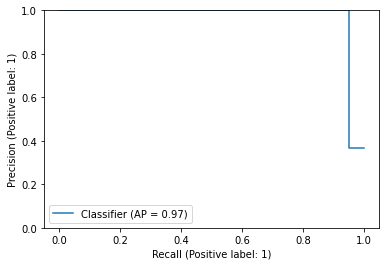

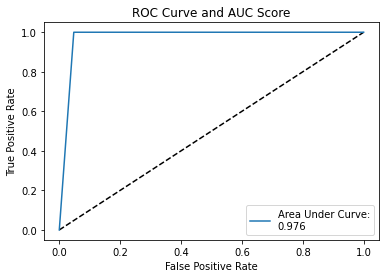

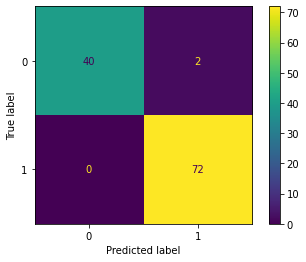

In [ ]:
#running the Tuned SVC with the best C value
svc = SVC(C =rbf_best_c_for_acc,gamma = rbf_best_gamma_for_acc,kernel='rbf')
svc.fit(X_train_np,y_train_np)
svc_pred = svc.predict(X_test_np)

#change ones to zeros and zeros to ones so one will represent Malignant.
y_test_inverted = 1 - y_test_np
b = 1 - svc_pred

plot_precision_recall(y_test_inverted, b)
plot_roc_and_print_auc(y_test_np, svc_pred)
plot_confusion_matrix(y_test_np, svc_pred)

In [ ]:
improved_rbf_non_pca_predictions = cross_val_predict(SVC(C=rbf_best_c_for_acc,gamma=rbf_best_gamma_for_acc,kernel='rbf'),
                                                                     X_all,
                                                                     y_all,
                                                                     cv = 10)

###3.7.2) SVC with PCA

In [ ]:
kernels = ['linear','rbf','sigmoid']
pca_result_dict = {'linear':[],'rbf':[],'sigmoid':[]}

In [ ]:
#Running SVC with default settings
pca_svc = SVC()
pca_svc.fit(X_train_pca,y_train_np)
pca_svc_pred = pca_svc.predict(X_test_pca)
print('Accuracy score- ',accuracy_score(y_test_np,pca_svc_pred))
print('balanced Accuracy score- ',balanced_accuracy_score(y_test_np,pca_svc_pred))
print('f1_score- ',f1_score(y_test_np,pca_svc_pred))
print('ROC AUC- ',roc_auc_score(y_test_np,pca_svc_pred))


Accuracy score-  0.9649122807017544
balanced Accuracy score-  0.9573412698412699
f1_score-  0.9726027397260274
ROC AUC-  0.9573412698412699


#### 3.7.2.1) SVC (with PCA) Hyperparameter tuning

hyperparameter tuning is conducted for different kernels to identify the optimum combinations of c parameter and gamma that provides the best classification.


In [ ]:
pca_linear_dict = {'c':[],'gamma':[],'accuracy':[],'balanced_accuracy':[],'f1_score':[],'roc_auc':[]}
pca_rbf_dict = {'c':[],'gamma':[],'accuracy':[],'balanced_accuracy':[],'f1_score':[],'roc_auc':[]}
pca_sigmoid_dict = {'c':[],'gamma':[],'accuracy':[],'balanced_accuracy':[],'f1_score':[],'roc_auc':[]}
for k in kernels:
  for c in c_range:
    for g in gamma_range:
      pca_svc = SVC(C=c,kernel=k,gamma=g)
      pca_svc.fit(X_train_pca,y_train_np)
      pca_svc_pred = pca_svc.predict(X_test_pca)
      if k == 'linear':
        pca_linear_dict['c'].append(c)
        pca_linear_dict['gamma'].append(g)
        pca_linear_dict['accuracy'].append(accuracy_score(y_test_np,pca_svc_pred))
        pca_linear_dict['balanced_accuracy'].append(balanced_accuracy_score(y_test_np,pca_svc_pred))
        pca_linear_dict['f1_score'].append(f1_score(y_test_np,pca_svc_pred))
        pca_linear_dict['roc_auc'].append(roc_auc_score(y_test_np,pca_svc_pred))
      elif k =='rbf':
        pca_rbf_dict['c'].append(c)
        pca_rbf_dict['gamma'].append(g)
        pca_rbf_dict['accuracy'].append(accuracy_score(y_test_np,pca_svc_pred))
        pca_rbf_dict['balanced_accuracy'].append(balanced_accuracy_score(y_test_np,pca_svc_pred))
        pca_rbf_dict['f1_score'].append(f1_score(y_test_np,pca_svc_pred))
        pca_rbf_dict['roc_auc'].append(roc_auc_score(y_test_np,pca_svc_pred))
      elif k =='sigmoid':
        pca_sigmoid_dict['c'].append(c)
        pca_sigmoid_dict['gamma'].append(c)
        pca_sigmoid_dict['accuracy'].append(accuracy_score(y_test_np,pca_svc_pred))
        pca_sigmoid_dict['balanced_accuracy'].append(balanced_accuracy_score(y_test_np,pca_svc_pred))
        pca_sigmoid_dict['f1_score'].append(f1_score(y_test_np,pca_svc_pred))
        pca_sigmoid_dict['roc_auc'].append(roc_auc_score(y_test_np,pca_svc_pred))

pca_linear_svc_results = np.concatenate((np.array(pca_linear_dict['c']).reshape((-1,1)),np.array(pca_linear_dict['gamma']).reshape((-1,1)),
                     np.array(pca_linear_dict['accuracy']).reshape((-1,1)),
                     np.array(pca_linear_dict['balanced_accuracy']).reshape((-1,1)),
                     np.array(pca_linear_dict['f1_score']).reshape((-1,1)),np.array(pca_linear_dict['roc_auc']).reshape((-1,1))),axis=1)

pca_rbf_svc_results = np.concatenate((np.array(pca_rbf_dict['c']).reshape((-1,1)),np.array(pca_rbf_dict['gamma']).reshape((-1,1)),
                     np.array(pca_rbf_dict['accuracy']).reshape((-1,1)),
                     np.array(pca_rbf_dict['balanced_accuracy']).reshape((-1,1)),
                     np.array(pca_rbf_dict['f1_score']).reshape((-1,1)),np.array(pca_rbf_dict['roc_auc']).reshape((-1,1))),axis=1)

pca_sigmoid_svc_results = np.concatenate((np.array(pca_sigmoid_dict['c']).reshape((-1,1)),np.array(pca_sigmoid_dict['gamma']).reshape((-1,1)),
                     np.array(pca_sigmoid_dict['accuracy']).reshape((-1,1)),
                     np.array(pca_sigmoid_dict['balanced_accuracy']).reshape((-1,1)),
                     np.array(pca_sigmoid_dict['f1_score']).reshape((-1,1)),np.array(pca_sigmoid_dict['roc_auc']).reshape((-1,1))),axis=1)

In [ ]:
#Tabulating results for linear Kernel
pca_linear_df = pd.DataFrame(linear_dict)
pca_linear_df

,c,gamma,accuracy,balanced_accuracy,f1_score,roc_auc
0,0.03125,0.000031,0.973684,0.964286,0.979592,0.964286
1,0.03125,0.000122,0.973684,0.964286,0.979592,0.964286
2,0.03125,0.000488,0.973684,0.964286,0.979592,0.964286
3,0.03125,0.001953,0.973684,0.964286,0.979592,0.964286
4,0.03125,0.007812,0.973684,0.964286,0.979592,0.964286
...,...,...,...,...,...,...
85,2048.00000,0.031250,0.982456,0.976190,0.986301,0.976190
86,2048.00000,0.125000,0.982456,0.976190,0.986301,0.976190
87,2048.00000,0.500000,0.982456,0.976190,0.986301,0.976190
88,2048.00000,2.000000,0.982456,0.976190,0.986301,0.976190


In [ ]:
#Filtering the best scores identified and their respective c and gamma values
c_arr = pca_linear_svc_results[:,0]
gamma_arr = pca_linear_svc_results[:,1]
acc_arr = pca_linear_svc_results[:,2]
bal_acc_arr = pca_linear_svc_results[:,3]
f1_arr = pca_linear_svc_results[:,4]
roc_auc_arr = pca_linear_svc_results[:,5]

best_acc_score = max(pca_linear_svc_results[:,2])
pca_lin_best_c_for_acc = pca_linear_svc_results[np.where(pca_linear_svc_results[:,2]==best_acc_score)][0][0]
pca_lin_best_gamma_for_acc = pca_linear_svc_results[np.where(pca_linear_svc_results[:,2]==best_acc_score)][0][1]

best_bal_acc_score = max(pca_linear_svc_results[:,3])
pca_lin_best_c_for_bal_acc = pca_linear_svc_results[np.where(pca_linear_svc_results[:,3]==best_bal_acc_score)][0][0]
pca_lin_best_gamma_for_bal_acc = pca_linear_svc_results[np.where(pca_linear_svc_results[:,3]==best_bal_acc_score)][0][1]

best_f1_score = max(pca_linear_svc_results[:,4])
pca_lin_best_c_f1_score = pca_linear_svc_results[np.where(pca_linear_svc_results[:,4]==best_f1_score)][0][0]
pca_lin_best_gamma_f1_score = pca_linear_svc_results[np.where(pca_linear_svc_results[:,4]==best_f1_score)][0][1]

best_roc_auc_score = max(pca_linear_svc_results[:,5])
pca_lin_best_c_roc_auc_score = pca_linear_svc_results[np.where(pca_linear_svc_results[:,5]==best_roc_auc_score)][0][0]
pca_lin_best_gamma_roc_auc_score = pca_linear_svc_results[np.where(pca_linear_svc_results[:,5]==best_roc_auc_score)][0][1]

print('Best scores and parameters combinations for Linear Kernels')
print(f'Best Accuracy score detected: {best_acc_score} params used: c - {pca_lin_best_c_for_acc} gamma -{pca_lin_best_gamma_for_acc}')
print(f'Best Balanced Accuracy score detected: {best_bal_acc_score} params used: c - {pca_lin_best_c_for_bal_acc} gamma -{pca_lin_best_gamma_for_bal_acc}')
print(f'Best f1 score detected: {best_f1_score} params used: c - {pca_lin_best_c_f1_score} gamma -{pca_lin_best_gamma_f1_score}')
print(f'Best roc auc score detected: {best_roc_auc_score} params used: c - {pca_lin_best_c_roc_auc_score} gamma -{pca_lin_best_gamma_roc_auc_score}')

Best scores and parameters combinations for Linear Kernels
Best Accuracy score detected: 0.9824561403508771 params used: c - 32.0 gamma -3.0517578125e-05
Best Balanced Accuracy score detected: 0.9761904761904762 params used: c - 32.0 gamma -3.0517578125e-05
Best f1 score detected: 0.9863013698630138 params used: c - 32.0 gamma -3.0517578125e-05
Best roc auc score detected: 0.9761904761904762 params used: c - 32.0 gamma -3.0517578125e-05


In [ ]:
#Tabulating results for rbf Kernel
pca_rbf_df = pd.DataFrame(pca_rbf_dict)
pca_rbf_df

,c,gamma,accuracy,balanced_accuracy,f1_score,roc_auc
0,0.03125,0.000031,0.631579,0.500000,0.774194,0.500000
1,0.03125,0.000122,0.631579,0.500000,0.774194,0.500000
2,0.03125,0.000488,0.631579,0.500000,0.774194,0.500000
3,0.03125,0.001953,0.798246,0.726190,0.862275,0.726190
4,0.03125,0.007812,0.921053,0.897817,0.940397,0.897817
...,...,...,...,...,...,...
85,2048.00000,0.031250,0.964912,0.962302,0.972222,0.962302
86,2048.00000,0.125000,0.929825,0.929563,0.943662,0.929563
87,2048.00000,0.500000,0.631579,0.500000,0.774194,0.500000
88,2048.00000,2.000000,0.631579,0.500000,0.774194,0.500000


In [ ]:
#Filtering the best scores identified and their respective c and gamma values
c_arr = pca_rbf_svc_results[:,0]
gamma_arr = pca_rbf_svc_results[:,1]
acc_arr = pca_rbf_svc_results[:,2]
bal_acc_arr = pca_rbf_svc_results[:,3]
f1_arr = pca_rbf_svc_results[:,4]
roc_auc_arr = pca_rbf_svc_results[:,5]

best_acc_score = max(pca_rbf_svc_results[:,2])
pca_rbf_best_c_for_acc = pca_rbf_svc_results[np.where(pca_rbf_svc_results[:,2]==best_acc_score)][0][0]
pca_rbf_best_gamma_for_acc = pca_rbf_svc_results[np.where(pca_rbf_svc_results[:,2]==best_acc_score)][0][1]

best_bal_acc_score = max(pca_rbf_svc_results[:,3])
pca_rbf_best_c_for_bal_acc = pca_rbf_svc_results[np.where(pca_rbf_svc_results[:,3]==best_bal_acc_score)][0][0]
pca_rbf_best_gamma_for_bal_acc = pca_rbf_svc_results[np.where(pca_rbf_svc_results[:,3]==best_bal_acc_score)][0][1]

best_f1_score = max(pca_rbf_svc_results[:,4])
pca_rbf_best_c_f1_score = pca_rbf_svc_results[np.where(pca_rbf_svc_results[:,4]==best_f1_score)][0][0]
pca_rbf_best_gamma_f1_score = pca_rbf_svc_results[np.where(pca_rbf_svc_results[:,4]==best_f1_score)][0][1]

best_roc_auc_score = max(pca_rbf_svc_results[:,5])
pca_rbf_best_c_roc_auc_score = pca_rbf_svc_results[np.where(pca_rbf_svc_results[:,5]==best_roc_auc_score)][0][0]
pca_rbf_best_gamma_roc_auc_score = pca_rbf_svc_results[np.where(pca_rbf_svc_results[:,5]==best_roc_auc_score)][0][1]

print('Best scores and parameters combinations for rbf Kernels')
print(f'Best Accuracy score detected: {best_acc_score} params used: c - {pca_rbf_best_c_for_acc} gamma -{pca_rbf_best_gamma_for_acc}')
print(f'Best Balanced Accuracy score detected: {best_bal_acc_score} params used: c - {pca_rbf_best_c_for_bal_acc} gamma -{pca_rbf_best_gamma_for_bal_acc}')
print(f'Best f1 score detected: {best_f1_score} params used: c - {pca_rbf_best_c_f1_score} gamma -{pca_rbf_best_gamma_f1_score}')
print(f'Best roc auc score detected: {best_roc_auc_score} params used: c - {pca_rbf_best_c_roc_auc_score} gamma -{pca_rbf_best_gamma_roc_auc_score}')

Best scores and parameters combinations for rbf Kernels
Best Accuracy score detected: 0.9824561403508771 params used: c - 128.0 gamma -0.001953125
Best Balanced Accuracy score detected: 0.9761904761904762 params used: c - 128.0 gamma -0.001953125
Best f1 score detected: 0.9863013698630138 params used: c - 128.0 gamma -0.001953125
Best roc auc score detected: 0.9761904761904762 params used: c - 128.0 gamma -0.001953125


In [ ]:
#Tabulating results for linear Kernel
pca_sigmoid_df = pd.DataFrame(pca_sigmoid_dict)
pca_sigmoid_df

,c,gamma,accuracy,balanced_accuracy,f1_score,roc_auc
0,0.03125,0.03125,0.631579,0.500000,0.774194,0.500000
1,0.03125,0.03125,0.631579,0.500000,0.774194,0.500000
2,0.03125,0.03125,0.631579,0.500000,0.774194,0.500000
3,0.03125,0.03125,0.666667,0.547619,0.791209,0.547619
4,0.03125,0.03125,0.929825,0.904762,0.947368,0.904762
...,...,...,...,...,...,...
85,2048.00000,2048.00000,0.903509,0.883929,0.926174,0.883929
86,2048.00000,2048.00000,0.885965,0.865079,0.912752,0.865079
87,2048.00000,2048.00000,0.868421,0.846230,0.899329,0.846230
88,2048.00000,2048.00000,0.877193,0.853175,0.906667,0.853175


In [ ]:
#Filtering the best scores identified and their respective c and gamma values
c_arr = pca_sigmoid_svc_results[:,0]
gamma_arr = pca_sigmoid_svc_results[:,1]
acc_arr = pca_sigmoid_svc_results[:,2]
bal_acc_arr = pca_sigmoid_svc_results[:,3]
f1_arr = pca_sigmoid_svc_results[:,4]
roc_auc_arr = pca_sigmoid_svc_results[:,5]

best_acc_score = max(pca_sigmoid_svc_results[:,2])
pca_sigmoid_best_c_for_acc = pca_sigmoid_svc_results[np.where(pca_sigmoid_svc_results[:,2]==best_acc_score)][0][0]
pca_sigmoid_best_gamma_for_acc = pca_sigmoid_svc_results[np.where(pca_sigmoid_svc_results[:,2]==best_acc_score)][0][1]

best_bal_acc_score = max(pca_sigmoid_svc_results[:,3])
pca_sigmoid_best_c_for_bal_acc = pca_sigmoid_svc_results[np.where(pca_sigmoid_svc_results[:,3]==best_bal_acc_score)][0][0]
pca_sigmoid_best_gamma_for_bal_acc = pca_sigmoid_svc_results[np.where(pca_sigmoid_svc_results[:,3]==best_bal_acc_score)][0][1]

best_f1_score = max(pca_sigmoid_svc_results[:,4])
pca_sigmoid_best_c_f1_score = pca_sigmoid_svc_results[np.where(pca_sigmoid_svc_results[:,4]==best_f1_score)][0][0]
pca_sigmoid_best_gamma_f1_score = pca_sigmoid_svc_results[np.where(pca_sigmoid_svc_results[:,4]==best_f1_score)][0][1]

best_roc_auc_score = max(pca_sigmoid_svc_results[:,5])
pca_sigmoid_best_c_roc_auc_score = pca_sigmoid_svc_results[np.where(pca_sigmoid_svc_results[:,5]==best_roc_auc_score)][0][0]
pca_sigmoid_best_gamma_roc_auc_score = pca_sigmoid_svc_results[np.where(pca_sigmoid_svc_results[:,5]==best_roc_auc_score)][0][1]

print('Best scores and parameters combinations for sigmoid Kernels')
print(f'Best Accuracy score detected: {best_acc_score} params used: c - {pca_sigmoid_best_c_for_acc} gamma -{pca_sigmoid_best_gamma_for_acc}')
print(f'Best Balanced Accuracy score detected: {best_bal_acc_score} params used: c - {pca_sigmoid_best_c_for_bal_acc} gamma -{pca_sigmoid_best_gamma_for_bal_acc}')
print(f'Best f1 score detected: {best_f1_score} params used: c - {pca_sigmoid_best_c_f1_score} gamma -{pca_sigmoid_best_gamma_f1_score}')
print(f'Best roc auc score detected: {best_roc_auc_score} params used: c - {pca_sigmoid_best_c_roc_auc_score} gamma -{pca_sigmoid_best_gamma_roc_auc_score}')

Best scores and parameters combinations for sigmoid Kernels
Best Accuracy score detected: 0.9736842105263158 params used: c - 8.0 gamma -8.0
Best Balanced Accuracy score detected: 0.9642857142857143 params used: c - 8.0 gamma -8.0
Best f1 score detected: 0.9795918367346939 params used: c - 8.0 gamma -8.0
Best roc auc score detected: 0.9642857142857143 params used: c - 8.0 gamma -8.0


In [ ]:
# RBF Model with the best parameters
improved_pca_rbf_svc = SVC(C=pca_rbf_best_c_for_acc,gamma=pca_rbf_best_gamma_for_acc,kernel='rbf')
improved_pca_rbf_svc.fit(X_train_pca,y_train_np)
improved_pca_rbf_svc_pred = pca_svc.predict(X_test_pca)

#### 3.7.2.2) Cross Validation

Results for each kernel during Cross validation is identified and tabulated below.

In [ ]:
pca_lin_acc_score_dict = []
pca_lin_bal_acc_score_dict = []
pca_lin_f1_score_dict = []
pca_lin_roc_auc_score_dict = []

pca_rbf_acc_score_dict = []
pca_rbf_bal_acc_score_dict = []
pca_rbf_f1_score_dict = []
pca_rbf_roc_auc_score_dict = []

pca_sigmoid_acc_score_dict = []
pca_sigmoid_bal_acc_score_dict = []
pca_sigmoid_f1_score_dict = []
pca_sigmoid_roc_auc_score_dict = []

pca_kf_bal_acc_score = []
pca_kf_f1_score = []
pca_kf_roc_auc_score = []

for i, [train_ind, test_ind] in enumerate(kf.split(X_svc,y_svc)):
  train_x = X_svc[train_ind]
  test_x = X_svc[test_ind]
  train_y = y_svc[train_ind]
  test_y = y_svc[test_ind]

  pca_lin_svc = SVC(C=pca_lin_best_c_for_acc,kernel='linear',gamma=pca_lin_best_gamma_for_acc)
  pca_lin_svc.fit(train_x,train_y)
  a = pca_lin_svc.predict(test_x)
  pca_lin_acc_score_dict.append(accuracy_score(test_y,a))
  pca_lin_bal_acc_score_dict.append(balanced_accuracy_score(test_y,a))
  pca_lin_f1_score_dict.append(f1_score(test_y,a))
  pca_lin_roc_auc_score_dict.append(roc_auc_score(test_y,a))

  pca_rbf_svc = SVC(C=pca_rbf_best_c_for_acc,kernel='rbf',gamma=pca_rbf_best_gamma_for_acc)
  pca_rbf_svc.fit(train_x,train_y)
  a = pca_rbf_svc.predict(test_x)
  pca_rbf_acc_score_dict.append(accuracy_score(test_y,a))
  pca_rbf_bal_acc_score_dict.append(balanced_accuracy_score(test_y,a))
  pca_rbf_f1_score_dict.append(f1_score(test_y,a))
  pca_rbf_roc_auc_score_dict.append(roc_auc_score(test_y,a))


  pca_sig_svc = SVC(C=pca_sigmoid_best_c_for_acc,kernel='sigmoid',gamma=pca_sigmoid_best_gamma_for_acc)
  pca_sig_svc.fit(train_x,train_y)
  a = pca_sig_svc.predict(test_x)
  pca_sigmoid_acc_score_dict.append(accuracy_score(test_y,a))
  pca_sigmoid_bal_acc_score_dict.append(balanced_accuracy_score(test_y,a))
  pca_sigmoid_f1_score_dict.append(f1_score(test_y,a))
  pca_sigmoid_roc_auc_score_dict.append(roc_auc_score(test_y,a))

pca_lin_avg_acc = np.mean(pca_lin_acc_score_dict)
pca_lin_avg_bal_acc = np.mean(pca_lin_bal_acc_score_dict)
pca_lin_avg_f1 = np.mean(pca_lin_f1_score_dict)
pca_lin_avg_roc = np.mean(pca_lin_roc_auc_score_dict)


pca_rbf_avg_acc = np.mean(pca_rbf_acc_score_dict)
pca_rbf_avg_bal_acc = np.mean(pca_rbf_bal_acc_score_dict)
pca_rbf_avg_f1 = np.mean(pca_rbf_f1_score_dict)
pca_rbf_avg_roc = np.mean(pca_rbf_roc_auc_score_dict)

pca_sigmoid_avg_acc = np.mean(pca_sigmoid_acc_score_dict)
pca_sigmoid_avg_bal_acc = np.mean(pca_sigmoid_bal_acc_score_dict)
pca_sigmoid_avg_f1 = np.mean(pca_sigmoid_f1_score_dict)
pca_sigmoid_avg_roc = np.mean(pca_sigmoid_roc_auc_score_dict)

pd.DataFrame({'linear kernel':[pca_lin_avg_acc,
pca_lin_avg_bal_acc,
pca_lin_avg_f1,
pca_lin_avg_roc],'rbf kernel':[pca_rbf_avg_acc,
pca_rbf_avg_bal_acc,
pca_rbf_avg_f1,
pca_rbf_avg_roc],'sigmoid kernel':[pca_sigmoid_avg_acc,
pca_sigmoid_avg_bal_acc,
pca_sigmoid_avg_f1,
pca_sigmoid_avg_roc]},index=['Accuracy','Balanced Accuracy','F1 score','ROC AUC score'])

,linear kernel,rbf kernel,sigmoid kernel
Accuracy,0.956046,0.971867,0.873496
Balanced Accuracy,0.952056,0.970373,0.868072
F1 score,0.964682,0.977421,0.898776
ROC AUC score,0.952056,0.970373,0.868072


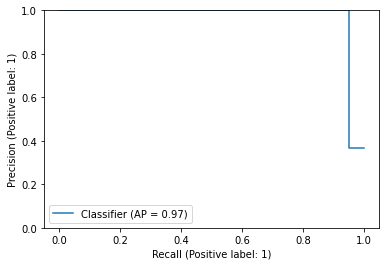

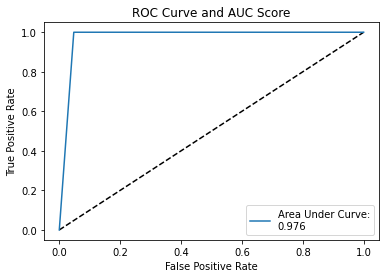

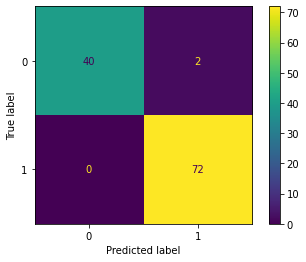

In [ ]:
#running the Tuned SVC with the best C value
svc = SVC(C =pca_rbf_best_c_for_acc,gamma = pca_rbf_best_gamma_for_acc,kernel='rbf')
svc.fit(X_train_pca,y_train_np)
svc_pred = svc.predict(X_test_pca)

#change ones to zeros and zeros to ones so one will represent Malignant.
y_test_inverted = 1 - y_test_np
b = 1 - svc_pred

plot_precision_recall(y_test_inverted, b)
plot_roc_and_print_auc(y_test_np, svc_pred)
plot_confusion_matrix(y_test_np, svc_pred)

In [ ]:
improved_rbf_pca_predictions = cross_val_predict(SVC(C=pca_rbf_best_c_for_acc,gamma=pca_rbf_best_gamma_for_acc,kernel='rbf'),
                                                                     X_all,
                                                                     y_all,
                                                                     cv = 10)



## 3.8) Ensembles:

### 3.8.1) Ada Boost Classifier

In [ ]:
#Ada Boost Classifier
#Will iteratively perform new classifiers using the error rates of the previous ones.
#Can overcome issues with difficult to predict samples.
gb_boost_CV_classifier = AdaBoostClassifier(RandomForestClassifier(criterion = 'gini',
                                                                   max_features = 'log2',
                                                                   min_samples_split = 52,
                                                                   max_depth = 7,
                                                                   min_samples_leaf= 51,
                                                                   max_leaf_nodes = 3),
                                            random_state = 1,
                                            learning_rate= 1,
                                            n_estimators = 100)


In [ ]:
gb_boost_CV_classifier.fit(X_pca_train, y_train_np).score(X_pca_test, y_test_np)

0.9473684210526315

In [ ]:
gb_boost_CV_classifier_pred = gb_boost_CV_classifier.predict(X_pca_test)

In [ ]:
print(cross_val_score(gb_boost_CV_classifier, X_all, y_all, cv=10, scoring='accuracy').mean())

0.9718671679197994


In [ ]:
gb_boost_predictions_pca = cross_val_predict(gb_boost_CV_classifier, X_pca, y_all, cv = 10)

In [ ]:
accuracy_score(y_test_np,gb_boost_CV_classifier_pred)

0.9473684210526315

<Figure size 2160x720 with 0 Axes>

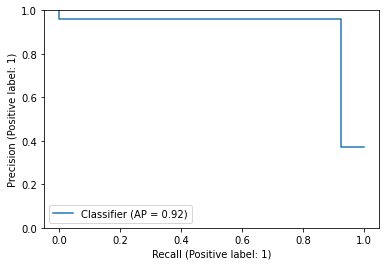

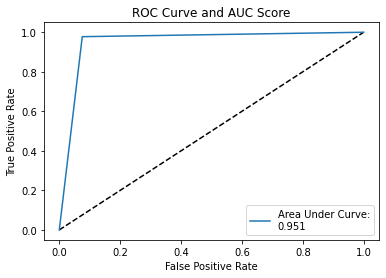

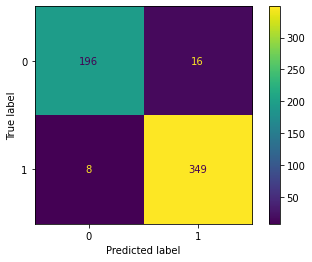

In [ ]:
plt.figure(figsize = (30,10))

plot_precision_recall(1-y_all, 1-gb_boost_predictions_pca)

plot_roc_and_print_auc(y_all, gb_boost_predictions_pca)

plot_confusion_matrix(y_all, gb_boost_predictions_pca)

### 3.8.2) Stacking Classifier
Stacking is a techinique that takes several regression or classification mdels and uses their output as the input for the final estimator.

In [ ]:
estimators = [
    ('dt',  DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 6, min_samples_split = 2, min_samples_leaf= 1, max_leaf_nodes = 9)),
    ('rf',  RandomForestClassifier(criterion = 'gini', max_features = 'log2', min_samples_split = 52, max_depth = 7, min_samples_leaf= 51, max_leaf_nodes = 3)),
    ('knn', KNeighborsClassifier(n_neighbors=5, p=2, weights= 'uniform', algorithm='auto')),
    ('nb',  GaussianNB(var_smoothing=top_param_gnb_pca)),
    ('svm', SVC(C=pca_rbf_best_c_for_acc,kernel='rbf',gamma=pca_rbf_best_gamma_for_acc))
]

In [ ]:
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
stk_clf.fit(X_pca_train, y_train_np).score(X_pca_test, y_test_np)

0.9824561403508771

In [ ]:
print(cross_val_score(stk_clf, X_all, y_all, cv=10, scoring='accuracy').mean())

0.9789160401002507


In [ ]:
stk_clf_pred = stk_clf.predict(X_pca_test)

In [ ]:
accuracy_score(y_test_np,stk_clf_pred)

0.9824561403508771

In [ ]:
stack_classifier_predictions_pca = cross_val_predict(stk_clf, X_all, y_all, cv = 10)

<Figure size 2160x720 with 0 Axes>

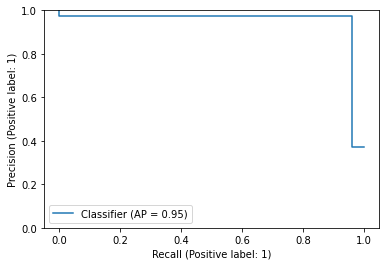

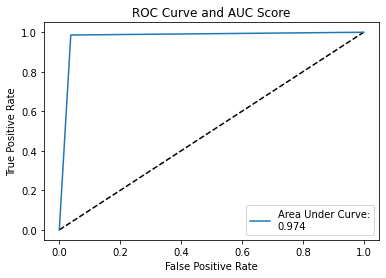

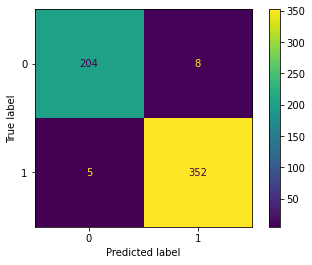

In [ ]:
plt.figure(figsize = (30,10))

plot_precision_recall(1-y_all, 1-stack_classifier_predictions_pca)

plot_roc_and_print_auc(y_all, stack_classifier_predictions_pca)

plot_confusion_matrix(y_all, stack_classifier_predictions_pca)

### 3.8.3) Hist Gradient Boosting Classifier

In [ ]:
hist_boost_clf = HistGradientBoostingClassifier().fit(X_pca_train, y_train_np)
hist_boost_clf.score(X_pca_test, y_test_np)

0.956140350877193

In [ ]:
hist_boost_clf.fit(X_pca_train, y_train_np).score(X_pca_test, y_test_np)

0.956140350877193

In [ ]:
hist_boost_clf_pred = hist_boost_clf.predict(X_pca_test)

In [ ]:
accuracy_score(y_test_np,hist_boost_clf_pred)

0.956140350877193

In [ ]:
print(cross_val_score(hist_boost_clf, X_all, y_all, cv=10, scoring='accuracy').mean())

0.9753759398496239


In [ ]:
hist_gradient_classifier_predictions_pca = cross_val_predict(hist_boost_clf, X_all, y_all, cv = 10)

<Figure size 2160x720 with 0 Axes>

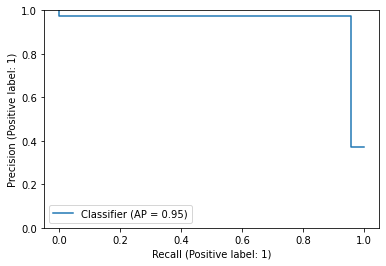

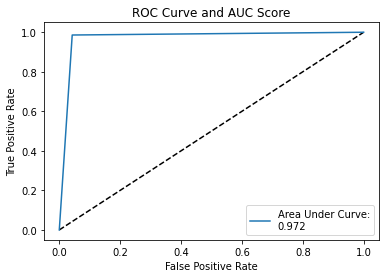

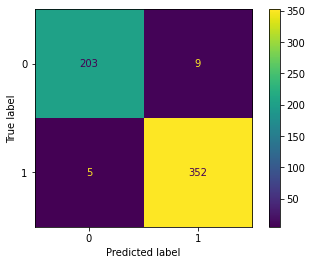

In [ ]:
plt.figure(figsize = (30,10))

plot_precision_recall(1-y_all, 1-hist_gradient_classifier_predictions_pca)

plot_roc_and_print_auc(y_all, hist_gradient_classifier_predictions_pca)

plot_confusion_matrix(y_all, hist_gradient_classifier_predictions_pca)

##3.9) Comparison of all Classification methods.
Below are comparison of all the ROC-AUC plots from each classification method

In [ ]:
classifiers = ['Decision Tree Classifier','Random Forest Classifier',
 'Linear SVM Classifier','RBF SVM Classifier' ,'Nearest Neighbours Classifier','Gaussian Naive Bayes Classifier']

#### Comparing Non-PCA Results for Train Test Split Method

ROC Curve and AUC Scores:


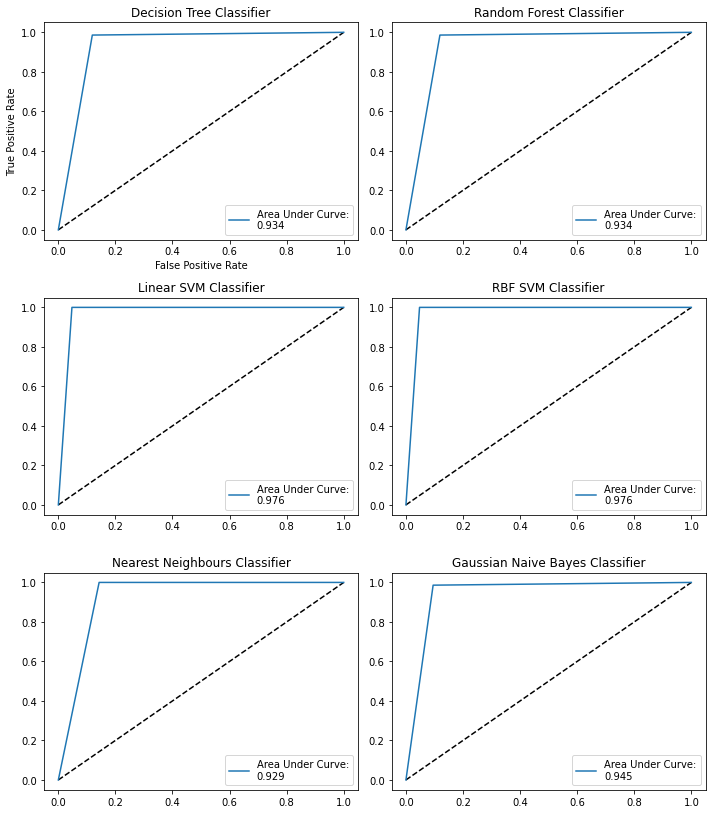

In [ ]:
#Comparing non-pca labels in train test splits. 
print("ROC Curve and AUC Scores:")
DT_labels = top_parameter_decision_tree_predictions
RF_labels = random_forest_train_test_split_predictions
L_SVM_labels = lin_svc_pred
RBF_SVM_LABELS = non_svc_pred
KNN_labels = top_parameter_knn_pred
G_NB_labels = top_param_gaussian_nb_pred

fig = plt.figure(figsize= (10,15))
for i, y_pred, model in zip(list(np.arange(6)),
              [DT_labels,RF_labels,L_SVM_labels,RBF_SVM_LABELS,KNN_labels, G_NB_labels],
              classifiers):
  ax = fig.add_subplot(4,2,i+1)
  false_positive_rate, true_positive_rate, _  =  roc_curve(y_test_np, y_pred)
  area_under_curve = round(roc_auc_score(y_test_np, y_pred), 3)
  zero_to_one_array = np.linspace(0,1,100)

  
  ax.plot(zero_to_one_array, zero_to_one_array, linestyle = 'dashed', c = 'k')
  ax.plot(false_positive_rate, true_positive_rate, label = (f"Area Under Curve:\n{area_under_curve}"))
  ax.legend(loc = 'lower right')
  if i == 0:
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
  ax.set_title(f"{classifiers[i]}")
# fig.suptitle('ROC Curve and AUC Score')

plt.tight_layout()
plt.show()

In [ ]:
def score_array(y_true,y_pred):
  return [accuracy_score(y_true, y_pred),balanced_accuracy_score(y_true, y_pred),f1_score(y_true, y_pred)]

non_pca_train_test_scores = {'Decision Tree Classifier':score_array(y_test_np,DT_labels),
                             'Random Forest Classifier':score_array(y_test_np,random_forest_train_test_split_predictions),
 'Linear SVM Classifier':score_array(y_test_np,lin_svc_pred),
 'RBF SVM Classifier':score_array(y_test_np,RBF_SVM_LABELS) ,
 'Nearest Neighbours Classifier':score_array(y_test_np,KNN_labels),
 'Gaussian Naive Bayes Classifier':score_array(y_test_np,top_param_gaussian_nb_pred)}
class_non_pca_scores = pd.DataFrame(non_pca_train_test_scores,columns=classifiers,index=['Accuracy','Balanced Accuracy','F1 score'])
class_non_pca_scores

,Decision Tree Classifier,Random Forest Classifier,Linear SVM Classifier,RBF SVM Classifier,Nearest Neighbours Classifier,Gaussian Naive Bayes Classifier
Accuracy,0.947368,0.947368,0.982456,0.982456,0.947368,0.956140
Balanced Accuracy,0.933532,0.933532,0.976190,0.976190,0.928571,0.945437
F1 score,0.959459,0.959459,0.986301,0.986301,0.960000,0.965986


#### Comparing non-PCA Results for K-Fold Methods

ROC Curve and AUC Scores:


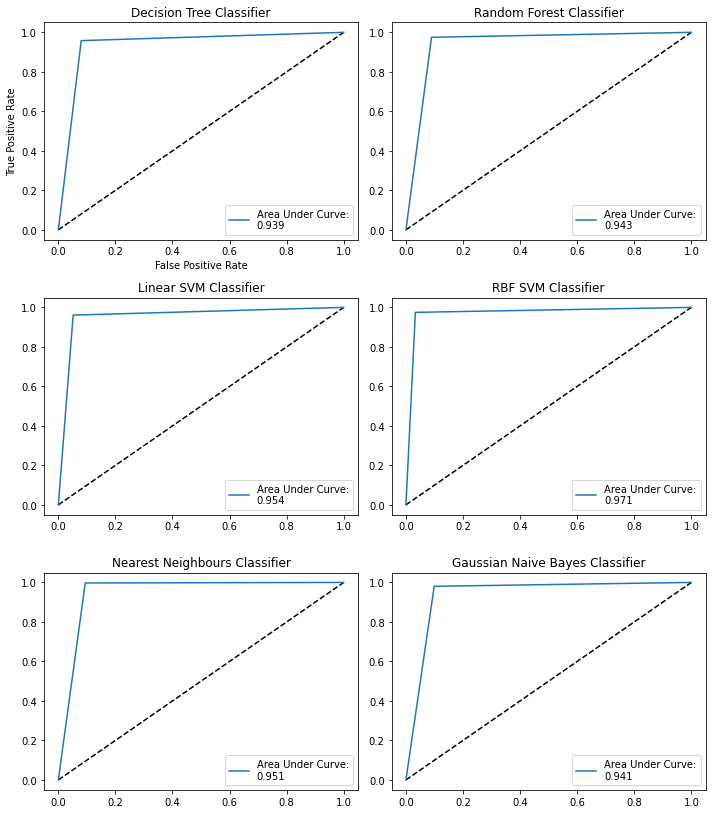

In [ ]:
#Comparing non-pca labels in k fold splits. 
print("ROC Curve and AUC Scores:")
DT_labels = improved_decision_classifier_cv_predictions
RF_labels = improved_forest_predictions
L_SVM_labels = improved_lsvc_cv_predictions
RBF_SVM_LABELS = improved_rbf_non_pca_predictions
KNN_labels = improved_knn_cv_predictions
G_NB_labels = improved_gnb_cv_predictions

fig = plt.figure(figsize= (10,15))
for i, y_pred, model in zip(list(np.arange(6)),
              [DT_labels,RF_labels,L_SVM_labels,RBF_SVM_LABELS,KNN_labels,G_NB_labels],
              classifiers):
  ax = fig.add_subplot(4,2,i+1)
  false_positive_rate, true_positive_rate, _  =  roc_curve(y_all, y_pred)
  area_under_curve = round(roc_auc_score(y_all, y_pred), 3)
  zero_to_one_array = np.linspace(0,1,100)

  
  ax.plot(zero_to_one_array, zero_to_one_array, linestyle = 'dashed', c = 'k')
  ax.plot(false_positive_rate, true_positive_rate, label = (f"Area Under Curve:\n{area_under_curve}"))
  ax.legend(loc = 'lower right')
  if i == 0:
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
  ax.set_title(f"{classifiers[i]}")
# fig.suptitle('ROC Curve and AUC Score')

plt.tight_layout()
plt.show()

In [ ]:
non_pca_kf_scores = {'Decision Tree Classifier':score_array(y_all,DT_labels),
'Random Forest Classifier':score_array(y_all,RF_labels),
 'Linear SVM Classifier':score_array(y_all,L_SVM_labels),
 'RBF SVM Classifier':score_array(y_all,RBF_SVM_LABELS) ,
 'Nearest Neighbours Classifier':score_array(y_all,KNN_labels),
 'Gaussian Naive Bayes Classifier':score_array(y_all,G_NB_labels)}
class_non_pca_kf_scores = pd.DataFrame(non_pca_kf_scores,columns=classifiers,index=['Accuracy','Balanced Accuracy','F1 score'])
class_non_pca_kf_scores

,Decision Tree Classifier,Random Forest Classifier,Linear SVM Classifier,RBF SVM Classifier,Nearest Neighbours Classifier,Gaussian Naive Bayes Classifier
Accuracy,0.943761,0.950791,0.956063,0.971880,0.963093,0.950791
Balanced Accuracy,0.938897,0.942584,0.954449,0.970886,0.951430,0.940668
F1 score,0.955307,0.961326,0.964838,0.977528,0.971351,0.961538


#### Comparing PCA Results for Train Test Split Method

ROC Curve and AUC Scores:


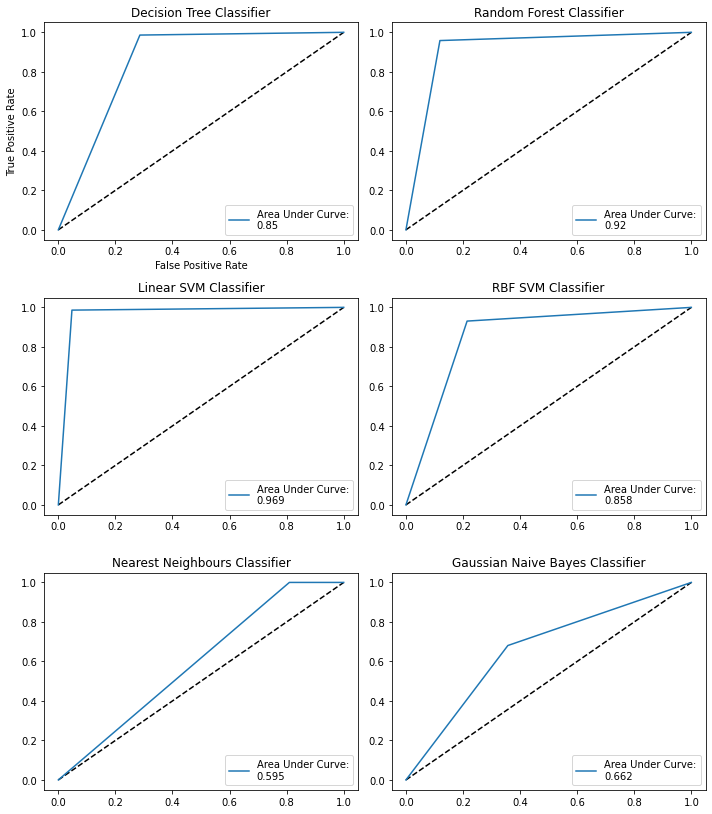

In [ ]:
#Comparing pca labels in train test splits. 
print("ROC Curve and AUC Scores:")
DT_labels = improved_pca_decision_tree_predictions
RF_labels = improved_forest_pca_predictions
L_SVM_labels = pca_lin_svc_pred 
RBF_SVM_LABELS = improved_pca_rbf_svc_pred
KNN_labels = top_parameter_knn_pca_pred
G_NB_labels = top_param_gaussian_nb_pca_pred

fig = plt.figure(figsize= (10,15))
for i, y_pred, model in zip(list(np.arange(6)),
              [DT_labels,RF_labels,L_SVM_labels,RBF_SVM_LABELS,KNN_labels,G_NB_labels],
              classifiers):
  ax = fig.add_subplot(4,2,i+1)
  false_positive_rate, true_positive_rate, _  =  roc_curve(y_test_np, y_pred)
  area_under_curve = round(roc_auc_score(y_test_np, y_pred), 3)
  zero_to_one_array = np.linspace(0,1,100)

  
  ax.plot(zero_to_one_array, zero_to_one_array, linestyle = 'dashed', c = 'k')
  ax.plot(false_positive_rate, true_positive_rate, label = (f"Area Under Curve:\n{area_under_curve}"))
  ax.legend(loc = 'lower right')
  if i == 0:
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
  ax.set_title(f"{classifiers[i]}")
# fig.suptitle('ROC Curve and AUC Score')

plt.tight_layout()
plt.show()

In [ ]:
pca_train_test_scores = {'PCA Decision Tree Classifier':score_array(y_test_np,DT_labels),
                             'PCA Random Forest Classifier':score_array(y_test_np,RF_labels),
 'PCA Linear SVM Classifier':score_array(y_test_np,L_SVM_labels),
 'PCA RBF SVM CLassifier':score_array(y_test_np,RBF_SVM_LABELS) ,
 'PCA Nearest Neighbours Classifier':score_array(y_test_np,KNN_labels),
 'PCA Gaussian Naive Bayes Classifier':score_array(y_test_np,G_NB_labels)}
class_pca_scores = pd.DataFrame(pca_train_test_scores,index=['Accuracy','Balanced Accuracy','F1 score'])
class_pca_scores

,PCA Decision Tree Classifier,PCA Random Forest Classifier,PCA Linear SVM Classifier,PCA RBF SVM CLassifier,PCA Nearest Neighbours Classifier,PCA Gaussian Naive Bayes Classifier
Accuracy,0.885965,0.929825,0.973684,0.877193,0.701754,0.666667
Balanced Accuracy,0.850198,0.919643,0.969246,0.858135,0.595238,0.661706
F1 score,0.916129,0.945205,0.979310,0.905405,0.808989,0.720588


#### Comparing PCA Results for K-Fold Methods

ROC Curve and AUC Scores:


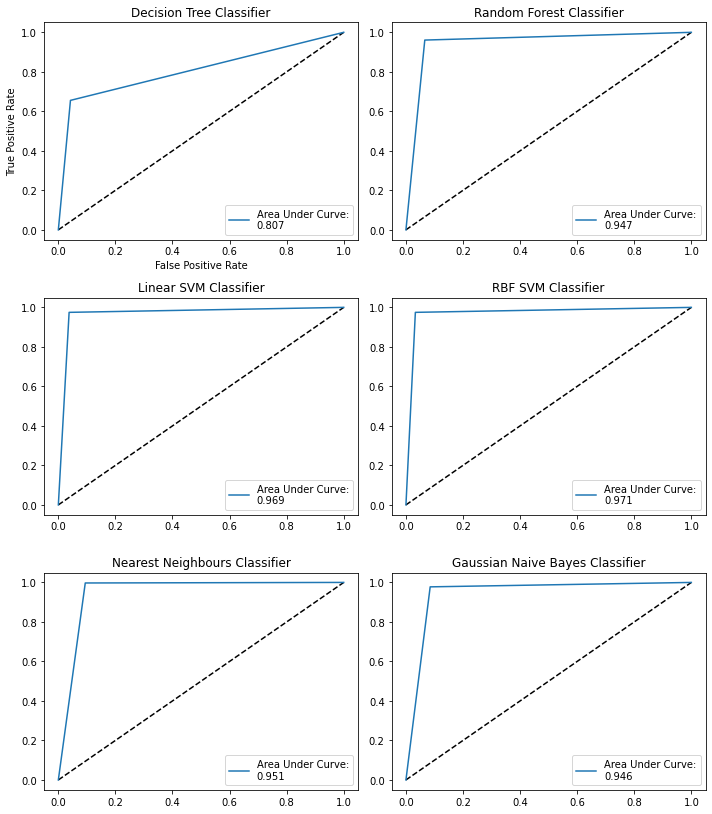

In [ ]:
#Comparing pca labels in k fold splits. 
print("ROC Curve and AUC Scores:")
DT_labels = pca_improved_decision_classifier_cv_predictions
RF_labels = improved_forest_pca_predictions_cv
L_SVM_labels = improved_lsvc_cv_pca_predictions 
RBF_SVM_LABELS = improved_rbf_pca_predictions
KNN_labels = improved_knn_cv_pca_predictions
G_NB_labels = improved_gnb_pca_cv_predictions

fig = plt.figure(figsize= (10,15))
for i, y_pred, model in zip(list(range(6)),
              [DT_labels,RF_labels,L_SVM_labels,RBF_SVM_LABELS,KNN_labels,G_NB_labels],
              classifiers):
  ax = fig.add_subplot(4,2,i+1)
  false_positive_rate, true_positive_rate, _  =  roc_curve(y_all, y_pred)
  area_under_curve = round(roc_auc_score(y_all, y_pred), 3)
  zero_to_one_array = np.linspace(0,1,100)

  
  ax.plot(zero_to_one_array, zero_to_one_array, linestyle = 'dashed', c = 'k')
  ax.plot(false_positive_rate, true_positive_rate, label = (f"Area Under Curve:\n{area_under_curve}"))
  ax.legend(loc = 'lower right')
  if i == 0:
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
  ax.set_title(f"{classifiers[i]}")
# fig.suptitle('ROC Curve and AUC Score')

plt.tight_layout()
plt.show()

In [ ]:
pca_kf_scores = {'PCA Decision Tree Classifier':score_array(y_all,DT_labels),
 'PCA Random Forest Classifier':score_array(y_all,RF_labels),
 'PCA Linear SVM Classifier':score_array(y_all,L_SVM_labels),
 'PCA RBF SVM CLassifier':score_array(y_all,RBF_SVM_LABELS) ,
 'PCA Nearest Neighbours Classifier':score_array(y_all,KNN_labels),
 'PCA Gaussian Naive Bayes Classifier':score_array(y_all,G_NB_labels)}
class_pca_kf_scores = pd.DataFrame(pca_kf_scores,index=['Accuracy','Balanced Accuracy','F1 score'])
class_pca_kf_scores

,PCA Decision Tree Classifier,PCA Random Forest Classifier,PCA Linear SVM Classifier,PCA RBF SVM CLassifier,PCA Nearest Neighbours Classifier,PCA Gaussian Naive Bayes Classifier
Accuracy,0.768014,0.950791,0.970123,0.971880,0.963093,0.954306
Balanced Accuracy,0.806505,0.947373,0.968527,0.970886,0.951430,0.946343
F1 score,0.780000,0.960784,0.976157,0.977528,0.971351,0.964088


In [ ]:
#Score comparison for Test Train method
pd.concat([class_non_pca_scores,class_pca_scores],axis=1)

,Decision Tree Classifier,Random Forest Classifier,Linear SVM Classifier,RBF SVM Classifier,Nearest Neighbours Classifier,Gaussian Naive Bayes Classifier,PCA Decision Tree Classifier,PCA Random Forest Classifier,PCA Linear SVM Classifier,PCA RBF SVM CLassifier,PCA Nearest Neighbours Classifier,PCA Gaussian Naive Bayes Classifier
Accuracy,0.947368,0.947368,0.982456,0.982456,0.947368,0.956140,0.885965,0.929825,0.973684,0.877193,0.701754,0.666667
Balanced Accuracy,0.933532,0.933532,0.976190,0.976190,0.928571,0.945437,0.850198,0.919643,0.969246,0.858135,0.595238,0.661706
F1 score,0.959459,0.959459,0.986301,0.986301,0.960000,0.965986,0.916129,0.945205,0.979310,0.905405,0.808989,0.720588


In [ ]:
#Score comparison for K-fold method
pd.concat([class_non_pca_kf_scores,class_pca_kf_scores],axis=1)

,Decision Tree Classifier,Random Forest Classifier,Linear SVM Classifier,RBF SVM Classifier,Nearest Neighbours Classifier,Gaussian Naive Bayes Classifier,PCA Decision Tree Classifier,PCA Random Forest Classifier,PCA Linear SVM Classifier,PCA RBF SVM CLassifier,PCA Nearest Neighbours Classifier,PCA Gaussian Naive Bayes Classifier
Accuracy,0.943761,0.950791,0.956063,0.971880,0.963093,0.950791,0.768014,0.950791,0.970123,0.971880,0.963093,0.954306
Balanced Accuracy,0.938897,0.942584,0.954449,0.970886,0.951430,0.940668,0.806505,0.947373,0.968527,0.970886,0.951430,0.946343
F1 score,0.955307,0.961326,0.964838,0.977528,0.971351,0.961538,0.780000,0.960784,0.976157,0.977528,0.971351,0.964088
